In [184]:
# IMPORTAÇÕES BÁSICAS
# Importação de bibliotecas essenciais para análise de dados e visualização

import sys
from pathlib import Path

# Adicionar pasta raiz ao path para importar módulos customizados
sys.path.append('../../..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px        
import plotly.graph_objects as go  
import altair as alt               
from datetime import datetime

print("✅ Bibliotecas básicas importadas!")

✅ Bibliotecas básicas importadas!


In [185]:
# IMPORTAÇÃO DOS MÓDULOS CUSTOMIZADOS
# Importa funções personalizadas do projeto

from lib.carregamento import (
    carregar_base_silver,
    carregar_base_gold_sp,
    carregar_base_agibank,
    carregar_base_setorial,
    carregar_base_filtrada,
    listar_arquivos_disponiveis,
    info_base
)

from lib.cores import (
    aplicar_tema_agibank,
    configurar_plotly,
    CORES_AGIBANK,
    PALETA_CATEGORICA,
    PALETA_AZUL,
    PALETA_VERDE,
    PLOTLY_COLORS,
    PLOTLY_PALETTE,
    PLOTLY_SCALE_AZUL,
    PLOTLY_SCALE_VERDE
)

from lib.visualizacoes import (
    grafico_barras,
    grafico_linha,
    grafico_pizza,
    grafico_boxplot,
    grafico_heatmap,
    grafico_distribuicao,
    grafico_comparativo_barras
)

print("✅ Módulos customizados importados!")

✅ Módulos customizados importados!


In [186]:
# CONFIGURAÇÕES GERAIS
# Define configurações de warnings, reprodutibilidade e exibição de dados

warnings.filterwarnings('ignore')
np.random.seed(42)

np.set_printoptions(
    precision=2,
    suppress=True,
    linewidth=120,
    edgeitems=5,
    threshold=1000
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
pd.set_option('mode.use_inf_as_na', True)

print("✅ Configurações gerais aplicadas!")

✅ Configurações gerais aplicadas!


In [187]:
# CONFIGURAÇÕES VISUAIS
# Aplica temas e configurações para gráficos

aplicar_tema_agibank('grande')
configurar_plotly()

alt.renderers.enable('default')
alt.data_transformers.disable_max_rows()

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("✅ Temas visuais aplicados!")

Tema Agibank aplicado - Tamanho: grande
Tema Agibank aplicado ao Plotly
✅ Temas visuais aplicados!


In [188]:
# DEFINIÇÃO DE CONSTANTES E CAMINHOS
# Define ano de análise, janelas temporais e caminhos do projeto

ANO_ANALISE = np.int16(2025)
JANELA_ANOS = np.array([ANO_ANALISE - 1, ANO_ANALISE], dtype=np.int16)
DATAS_REFERENCIA = np.arange(f'{ANO_ANALISE}-01', f'{ANO_ANALISE+1}-01', dtype='datetime64[M]')

RAIZ_PROJETO = Path.cwd()
CAMINHO_OUTPUT = RAIZ_PROJETO / 'output'
CAMINHO_OUTPUT.mkdir(exist_ok=True)

print(f"✅ Constantes definidas!")
print(f"Ano de análise: {ANO_ANALISE}")
print(f"Pasta de output: {CAMINHO_OUTPUT}")

✅ Constantes definidas!
Ano de análise: 2025
Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output


In [189]:
# RESUMO DO AMBIENTE
# Exibe informações sobre versões das bibliotecas e configurações aplicadas

print("=" * 80)
print("AMBIENTE CONFIGURADO COM SUCESSO")
print("=" * 80)

try:
    plotly_v = plotly.__version__
except:
    plotly_v = "Instalado"

info_libs = np.array([
    ['Pandas', pd.__version__],
    ['NumPy', np.__version__],
    ['Matplotlib', plt.matplotlib.__version__],
    ['Seaborn', sns.__version__],
    ['Plotly', plotly_v],
    ['Altair', alt.__version__],
    ['Python', sys.version.split()[0]]
])

print(f"\nVersões das bibliotecas:")
for lib, versao in info_libs:
    print(f"  {lib}: {versao}")

print(f"\nConfigurações do projeto:")
print(f"  Ano de análise: {ANO_ANALISE}")
print(f"  Pasta de output: {CAMINHO_OUTPUT}")
print(f"  Path atual: {RAIZ_PROJETO}")

paleta_mpl_np = np.array(PALETA_CATEGORICA)
paleta_plotly_np = np.array(PLOTLY_PALETTE)

print(f"\nTema visual:")
print(f"  Tema Agibank aplicado (tamanho: grande)")
print(f"  Paleta Matplotlib: {paleta_mpl_np.size} cores")
print(f"  Paleta Plotly: {paleta_plotly_np.size} cores")

print("=" * 80)

AMBIENTE CONFIGURADO COM SUCESSO

Versões das bibliotecas:
  Pandas: 2.3.3
  NumPy: 2.3.5
  Matplotlib: 3.10.7
  Seaborn: 0.13.2
  Plotly: Instalado
  Altair: 6.0.0
  Python: 3.13.5

Configurações do projeto:
  Ano de análise: 2025
  Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output
  Path atual: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver

Tema visual:
  Tema Agibank aplicado (tamanho: grande)
  Paleta Matplotlib: 6 cores
  Paleta Plotly: 6 cores


In [190]:
# CARREGAMENTO DAS BASES DE DADOS
# Carrega bases setorial e SP completo

print("=" * 80)
print("CARREGANDO BASES DE DADOS")
print("=" * 80 + "\n")

print("Carregando base setorial...")
df_setorial = carregar_base_setorial()

print("\nCarregando base SP completo...")
df_sp_completo = carregar_base_gold_sp()

print("\n✅ Bases carregadas com sucesso!")

CARREGANDO BASES DE DADOS

Carregando base setorial...
Carregando base setorial de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\gold\sp_setorial_segments_v1.csv
Base setorial carregada com sucesso!
Registros: 45
Colunas: 3

Carregando base SP completo...
Carregando SP (Gold) de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\gold\sp_consumidor_completo_v1.csv
Separador detectado: ';'
Tentativa 1...
✅ Base SP carregada com sucesso (tentativa 1)!
Registros: 649,557
Colunas: 32

✅ Bases carregadas com sucesso!


In [232]:
# ATUALIZAÇÃO DE ARRAYS E VARIÁVEIS GLOBAIS
print("=" * 80)
print("ATUALIZANDO ARRAYS E VARIÁVEIS")
print("=" * 80)

# Recria todos os arrays a partir da base filtrada
arr_cidade = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()
arr_sexo = df_sp_financeiro['sexo'].to_numpy()
arr_faixa_etaria = df_sp_financeiro['faixa_etaria'].to_numpy()
arr_instituicao = df_sp_financeiro['nome_fantasia'].to_numpy()

# Atualiza flags geográficas
eh_capital = arr_cidade == 'SÃO PAULO'
eh_interior = ~eh_capital
eh_campinas = arr_cidade == 'CAMPINAS'

df_sp_financeiro['eh_capital'] = eh_capital
df_sp_financeiro['eh_interior'] = eh_interior
df_sp_financeiro['eh_campinas'] = eh_campinas

# Atualiza variáveis globais
total_registros = len(df_sp_financeiro)
total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100
pct_campinas = (total_campinas / total_registros) * 100

print(f"\n✅ Arrays e variáveis atualizados!")
print(f"\nDISTRIBUIÇÃO ATUALIZADA:")
print(f"  Total SP: {total_registros:,}")
print(f"  Capital: {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")
print(f"  Campinas: {total_campinas:,} ({pct_campinas:.1f}%)")

# Recategoriza notas e tempo
categoria_nota = np.select(
    [arr_nota <= 2, arr_nota == 3, arr_nota >= 4],
    ['Insatisfeito (≤2)', 'Neutro (3)', 'Satisfeito (≥4)'],
    default='Sem nota'
)
df_sp_financeiro['categoria_nota'] = categoria_nota

categoria_tempo = np.select(
    [
        arr_tempo <= 1,
        (arr_tempo > 1) & (arr_tempo <= 3),
        (arr_tempo > 3) & (arr_tempo <= 7),
        (arr_tempo > 7) & (arr_tempo <= 10),
        arr_tempo > 10
    ],
    ['0-1 dia', '1-3 dias', '3-7 dias', '7-10 dias', '>10 dias'],
    default='Não informado'
)
df_sp_financeiro['categoria_tempo'] = categoria_tempo

no_prazo = arr_tempo <= 10
df_sp_financeiro['no_prazo'] = no_prazo

print(f"\n✅ Categorizações aplicadas!")

ATUALIZANDO ARRAYS E VARIÁVEIS

✅ Arrays e variáveis atualizados!

DISTRIBUIÇÃO ATUALIZADA:
  Total SP: 268,021
  Capital: 81,843 (30.5%)
  Interior: 186,178 (69.5%)
  Campinas: 7,343 (2.7%)

✅ Categorizações aplicadas!


In [192]:
# FILTRO: SETOR FINANCEIRO - PRODUTOS CORE AGIBANK
print("=" * 80)
print("APLICANDO FILTRO: SETOR FINANCEIRO - CORE AGIBANK")
print("=" * 80)

# Define segmentos financeiros relevantes
segmentos_financeiros = [
    'Bancos, Financeiras e Administradoras de Cartão',
    'Empresas de Pagamento Eletrônico',
    'Seguros, Capitalização e Previdência',
    'Administradoras de Consórcios',
    'Corretoras e Distribuidoras de Títulos e Investimentos'
]

# Aplica filtro por segmento
mask_financeiro = df_sp_completo['segmento_de_mercado'].isin(segmentos_financeiros)
df_sp_financeiro = df_sp_completo[mask_financeiro].copy()

# Define assuntos financeiros válidos (16 produtos core Agibank)
assuntos_financeiros_validos = [
    'Cartão de Crédito / Cartão de Débito / Cartão de Loja',
    'Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos)',
    'Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)',
    'Conta corrente / Salário / Poupança /Conta Aposentadoria',
    'Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)',
    'Atendimento Bancário',
    'Seguro Prestamista',
    'Investimentos / Aplicações / Câmbio / Previdência Privada',
    'Seguro de Vida',
    'Consórcios (exceto imóveis)',
    'Consórcio de Imóveis',
    'Título de Capitalização',
    'Seguro de Acidentes Pessoais',
    'Caixa Eletrônico Multibanco',
    'Consulta / Monitoramento de CPF',
    'Cadastro Positivo'
]

# Aplica segundo filtro: apenas assuntos CORE
mask_assuntos_financeiros = df_sp_financeiro['assunto'].isin(assuntos_financeiros_validos)

# Conta impacto antes de aplicar
total_antes_assunto = len(df_sp_financeiro)
total_cartao_programas = df_sp_financeiro[~mask_assuntos_financeiros].shape[0]

df_sp_financeiro = df_sp_financeiro[mask_assuntos_financeiros].copy()

# Estatísticas do filtro
total_original = len(df_sp_completo)
total_financeiro = len(df_sp_financeiro)
total_removido = total_original - total_financeiro

pct_financeiro = (total_financeiro / total_original) * 100
pct_removido = (total_removido / total_original) * 100

print(f"\nRESULTADO DO FILTRO:")
print(f"  Total original (todos os setores): {total_original:,}")
print(f"  Setor Financeiro CORE (mantido): {total_financeiro:,} ({pct_financeiro:.1f}%)")
print(f"  Removido total: {total_removido:,} ({pct_removido:.1f}%)")

print(f"\n❌ REMOVIDO NESTA ETAPA:")
print(f"  Cartão de Programas Sociais: {total_cartao_programas:,} reclamações")

print(f"\nDISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:")
print("-" * 80)

for segmento in segmentos_financeiros:
    qtd = df_sp_financeiro[df_sp_financeiro['segmento_de_mercado'] == segmento].shape[0]
    if qtd > 0:
        pct_seg = (qtd / total_financeiro) * 100
        print(f"  {segmento}: {qtd:,} ({pct_seg:.1f}%)")

print(f"\n✅ TOTAL DE ASSUNTOS VÁLIDOS: {df_sp_financeiro['assunto'].nunique()}")
print(f"✅ BASE FINAL: {len(df_sp_financeiro):,} reclamações")
print("\n✅ Filtro aplicado! Base: df_sp_financeiro (16 produtos core Agibank)")

APLICANDO FILTRO: SETOR FINANCEIRO - CORE AGIBANK

RESULTADO DO FILTRO:
  Total original (todos os setores): 649,557
  Setor Financeiro CORE (mantido): 268,021 (41.3%)
  Removido total: 381,536 (58.7%)

❌ REMOVIDO NESTA ETAPA:
  Cartão de Programas Sociais: 61,601 reclamações

DISTRIBUIÇÃO POR SEGMENTO FINANCEIRO:
--------------------------------------------------------------------------------
  Bancos, Financeiras e Administradoras de Cartão: 244,081 (91.1%)
  Empresas de Pagamento Eletrônico: 13,892 (5.2%)
  Seguros, Capitalização e Previdência: 8,071 (3.0%)
  Administradoras de Consórcios: 1,402 (0.5%)
  Corretoras e Distribuidoras de Títulos e Investimentos: 575 (0.2%)

✅ TOTAL DE ASSUNTOS VÁLIDOS: 16
✅ BASE FINAL: 268,021 reclamações

✅ Filtro aplicado! Base: df_sp_financeiro (16 produtos core Agibank)


In [193]:
# PREPARAÇÃO: ARRAYS E VARIÁVEIS GLOBAIS

print("=" * 80)
print("PREPARANDO DADOS PARA ANÁLISE")
print("=" * 80)

# Arrays principais
arr_cidade = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()
arr_sexo = df_sp_financeiro['sexo'].to_numpy()
arr_faixa_etaria = df_sp_financeiro['faixa_etaria'].to_numpy()
arr_instituicao = df_sp_financeiro['nome_fantasia'].to_numpy()

# Flags geográficas
eh_capital = arr_cidade == 'SÃO PAULO'
eh_interior = ~eh_capital
eh_campinas = arr_cidade == 'CAMPINAS'

df_sp_financeiro['eh_capital'] = eh_capital
df_sp_financeiro['eh_interior'] = eh_interior
df_sp_financeiro['eh_campinas'] = eh_campinas

# Categorização de notas
categoria_nota = np.select(
    [arr_nota <= 2, arr_nota == 3, arr_nota >= 4],
    ['Insatisfeito (≤2)', 'Neutro (3)', 'Satisfeito (≥4)'],
    default='Sem nota'
)
df_sp_financeiro['categoria_nota'] = categoria_nota

# Categorização de tempo
categoria_tempo = np.select(
    [
        arr_tempo <= 1,
        (arr_tempo > 1) & (arr_tempo <= 3),
        (arr_tempo > 3) & (arr_tempo <= 7),
        (arr_tempo > 7) & (arr_tempo <= 10),
        arr_tempo > 10
    ],
    ['0-1 dia', '1-3 dias', '3-7 dias', '7-10 dias', '>10 dias'],
    default='Não informado'
)
df_sp_financeiro['categoria_tempo'] = categoria_tempo

# Flag de resposta no prazo
no_prazo = arr_tempo <= 10
df_sp_financeiro['no_prazo'] = no_prazo

# Variáveis globais
total_registros = len(arr_cidade)
total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100
pct_campinas = (total_campinas / total_registros) * 100

print(f"\n✅ Dados preparados!")
print(f"\nDISTRIBUIÇÃO GEOGRÁFICA:")
print(f"  Total SP (setor financeiro): {total_registros:,}")
print(f"  Capital: {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")
print(f"  Campinas: {total_campinas:,} ({pct_campinas:.1f}%)")

PREPARANDO DADOS PARA ANÁLISE

✅ Dados preparados!

DISTRIBUIÇÃO GEOGRÁFICA:
  Total SP (setor financeiro): 268,021
  Capital: 81,843 (30.5%)
  Interior: 186,178 (69.5%)
  Campinas: 7,343 (2.7%)


In [194]:
# PERGUNTA 1: TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO
# Análise da evolução temporal e volumetria do setor financeiro

print("=" * 80)
print("PERGUNTA 1: TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO")
print("=" * 80)

# Agrupa reclamações por mês
meses_unicos, contagem_por_mes = np.unique(arr_mes, return_counts=True)

# Ordena cronologicamente
idx_ordenado = np.argsort(meses_unicos)
meses_ordenados = meses_unicos[idx_ordenado]
contagens_ordenadas = contagem_por_mes[idx_ordenado]

# Calcula taxa de crescimento
if len(contagens_ordenadas) > 1:
    crescimento = ((contagens_ordenadas[-1] / contagens_ordenadas[0]) - 1) * 100
else:
    crescimento = 0.0

# Estatísticas
media_mensal = np.mean(contagens_ordenadas)
mediana_mensal = np.median(contagens_ordenadas)
desvio_mensal = np.std(contagens_ordenadas)
mes_max = meses_ordenados[np.argmax(contagens_ordenadas)]
reclamacoes_max = np.max(contagens_ordenadas)
mes_min = meses_ordenados[np.argmin(contagens_ordenadas)]
reclamacoes_min = np.min(contagens_ordenadas)

print(f"\nVOLUMETRIA ESTADO DE SÃO PAULO (SETOR FINANCEIRO):")
print(f"  Total de reclamações: {total_registros:,}")
print(f"  Média mensal: {media_mensal:,.0f}")
print(f"  Mediana mensal: {mediana_mensal:,.0f}")
print(f"  Desvio padrão: {desvio_mensal:,.0f}")
print(f"\n  Mês com MAIS reclamações: {mes_max:.0f} ({reclamacoes_max:,})")
print(f"  Mês com MENOS reclamações: {mes_min:.0f} ({reclamacoes_min:,})")
print(f"  Crescimento no período: {crescimento:+.1f}%")

# Tabela de evolução
df_evolucao = pd.DataFrame({
    'Mês': meses_ordenados.astype(int),
    'Reclamações': contagens_ordenadas,
    'Variação %': np.concatenate([[0], np.diff(contagens_ordenadas) / contagens_ordenadas[:-1] * 100])
}).set_index('Mês')

display(
    df_evolucao.style
    .format({
        'Reclamações': '{:,.0f}',
        'Variação %': '{:+.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Variação %'], vmin=-20, vmax=20)
    .set_caption('Evolução Mensal de Reclamações - Setor Financeiro SP')
)

PERGUNTA 1: TAMANHO DO MERCADO FINANCEIRO DE SÃO PAULO

VOLUMETRIA ESTADO DE SÃO PAULO (SETOR FINANCEIRO):
  Total de reclamações: 268,021
  Média mensal: 22,335
  Mediana mensal: 19,760
  Desvio padrão: 7,611

  Mês com MAIS reclamações: 11 (37,975)
  Mês com MENOS reclamações: 2 (13,273)
  Crescimento no período: -15.5%


,Reclamações,Variação %
Mês,,
1,"16,478",+0.0%
2,"13,273",-19.5%
3,"16,580",+24.9%
4,"16,585",+0.0%
5,"19,303",+16.4%
6,"20,218",+4.7%
7,"23,307",+15.3%
8,"30,149",+29.4%
9,"29,552",-2.0%


GRÁFICO: EVOLUÇÃO TEMPORAL


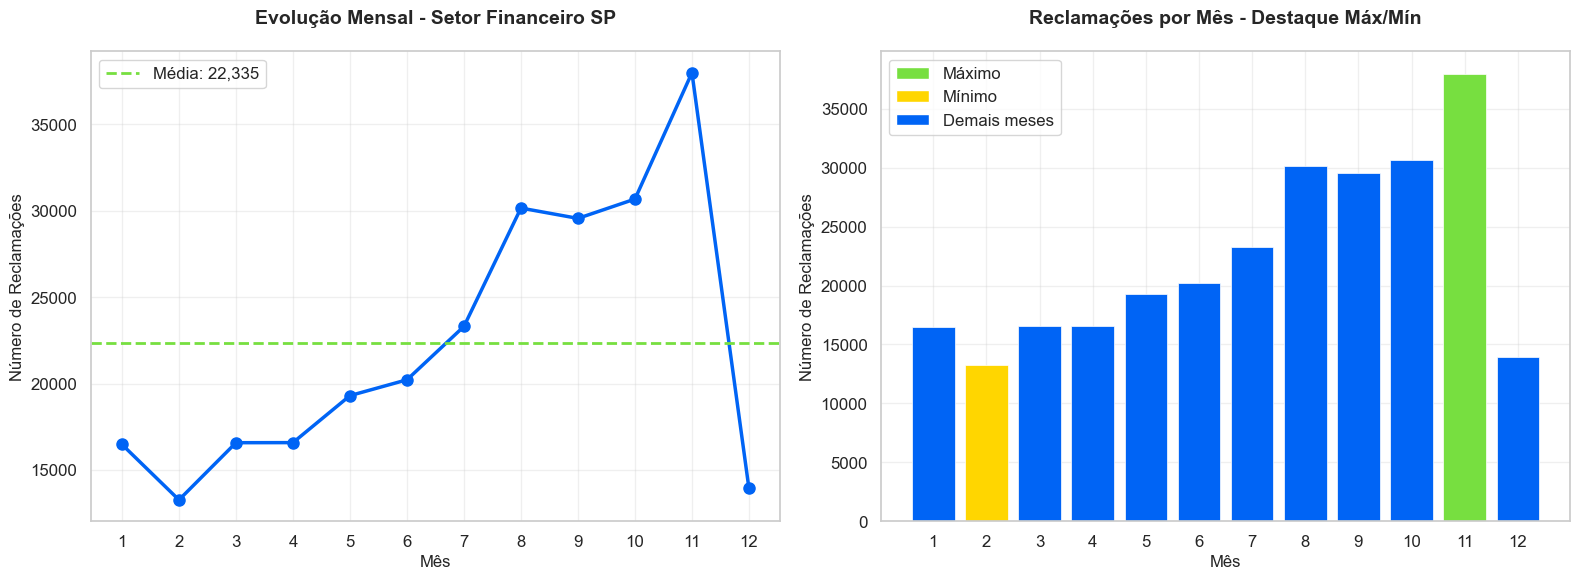

In [195]:
# PERGUNTA 1: VISUALIZAÇÃO DA EVOLUÇÃO TEMPORAL
# Gráficos de linha e barras mostrando a tendência mensal

print("=" * 80)
print("GRÁFICO: EVOLUÇÃO TEMPORAL")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Linha temporal
ax1.plot(meses_ordenados, contagens_ordenadas, 
         marker='o', linewidth=2.5, markersize=8, 
         color=CORES_AGIBANK['azul_principal'])
ax1.axhline(y=media_mensal, color=CORES_AGIBANK['verde'], 
            linestyle='--', linewidth=2, label=f'Média: {media_mensal:,.0f}')
ax1.set_title('Evolução Mensal - Setor Financeiro SP', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Número de Reclamações', fontsize=12)
ax1.set_xticks(meses_ordenados)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico 2: Barras com destaque
cores_barras = [CORES_AGIBANK['verde'] if mes == mes_max 
                else CORES_AGIBANK['amarelo'] if mes == mes_min 
                else CORES_AGIBANK['azul_principal'] 
                for mes in meses_ordenados]

ax2.bar(meses_ordenados, contagens_ordenadas, color=cores_barras, 
        edgecolor='white', linewidth=0.5)
ax2.set_title('Reclamações por Mês - Destaque Máx/Mín', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Mês', fontsize=12)
ax2.set_ylabel('Número de Reclamações', fontsize=12)
ax2.set_xticks(meses_ordenados)
ax2.grid(True, alpha=0.3, axis='y')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=CORES_AGIBANK['verde'], label='Máximo'),
    Patch(facecolor=CORES_AGIBANK['amarelo'], label='Mínimo'),
    Patch(facecolor=CORES_AGIBANK['azul_principal'], label='Demais meses')
]
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [196]:
# PERGUNTA 2: PERFIL DEMOGRÁFICO - GÊNERO
# Análise da distribuição por gênero no setor financeiro paulista

print("=" * 80)
print("PERGUNTA 2: PERFIL DEMOGRÁFICO DO CONSUMIDOR PAULISTA")
print("=" * 80)
print("\nPARTE 1: DISTRIBUIÇÃO POR GÊNERO")
print("-" * 80)

# Trata valores ausentes e conta distribuição
arr_sexo_limpo = pd.Series(arr_sexo).fillna('Não Informado').astype(str).to_numpy()
generos_unicos, contagem_genero = np.unique(arr_sexo_limpo, return_counts=True)

# Ordena do maior para o menor
idx_ord_genero = np.argsort(contagem_genero)[::-1]
generos_ordenados = generos_unicos[idx_ord_genero]
contagens_ordenadas = contagem_genero[idx_ord_genero]
pct_ordenados = (contagens_ordenadas / len(arr_sexo_limpo)) * 100

# Identifica gênero predominante
generos_validos = generos_ordenados[generos_ordenados != 'Não Informado']
if len(generos_validos) > 0:
    genero_predominante = generos_validos[0]
    idx_predominante = np.where(generos_ordenados == genero_predominante)[0][0]
    pct_predominante = pct_ordenados[idx_predominante]

# Tabela
df_genero = pd.DataFrame({
    'Gênero': generos_ordenados,
    'Reclamações': contagens_ordenadas,
    '% do Total': pct_ordenados
}).set_index('Gênero')

display(
    df_genero.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Greens', subset=['% do Total'])
    .set_caption('Distribuição por Gênero - Setor Financeiro SP')
)

print(f"\nINSIGHT:")
print(f"  Gênero predominante: {genero_predominante} ({pct_predominante:.1f}%)")

PERGUNTA 2: PERFIL DEMOGRÁFICO DO CONSUMIDOR PAULISTA

PARTE 1: DISTRIBUIÇÃO POR GÊNERO
--------------------------------------------------------------------------------


,Reclamações,% do Total
Gênero,,
F,"134,575",50.2%
M,"133,261",49.7%
O,181,0.1%
Não Informado,4,0.0%



INSIGHT:
  Gênero predominante: F (50.2%)


In [197]:
# PERGUNTA 2: PERFIL DEMOGRÁFICO - FAIXA ETÁRIA
# Análise da distribuição por idade no setor financeiro paulista

print("\nPARTE 2: DISTRIBUIÇÃO POR FAIXA ETÁRIA")
print("-" * 80)

# Trata valores ausentes e conta distribuição
arr_faixa_limpa = pd.Series(arr_faixa_etaria).fillna('Não Informado').astype(str).to_numpy()
faixas_unicas, contagem_faixas = np.unique(arr_faixa_limpa, return_counts=True)

# Ordena do maior para o menor
idx_ord_faixas = np.argsort(contagem_faixas)[::-1]
faixas_ordenadas = faixas_unicas[idx_ord_faixas]
contagens_faixas_ord = contagem_faixas[idx_ord_faixas]
pct_faixas_ord = (contagens_faixas_ord / len(arr_faixa_limpa)) * 100

# Identifica faixa predominante
faixas_validas = faixas_ordenadas[faixas_ordenadas != 'Não Informado']
if len(faixas_validas) > 0:
    faixa_predominante = faixas_validas[0]
    idx_predominante_faixa = np.where(faixas_ordenadas == faixa_predominante)[0][0]
    pct_predominante_faixa = pct_faixas_ord[idx_predominante_faixa]

# Tabela
df_faixa_etaria = pd.DataFrame({
    'Faixa Etária': faixas_ordenadas,
    'Reclamações': contagens_faixas_ord,
    '% do Total': pct_faixas_ord
}).set_index('Faixa Etária')

display(
    df_faixa_etaria.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Oranges', subset=['% do Total'])
    .set_caption('Distribuição por Faixa Etária - Setor Financeiro SP')
)

print(f"\nINSIGHT:")
print(f"  Faixa etária predominante: {faixa_predominante} ({pct_predominante_faixa:.1f}%)")


PARTE 2: DISTRIBUIÇÃO POR FAIXA ETÁRIA
--------------------------------------------------------------------------------


,Reclamações,% do Total
Faixa Etária,,
entre 31 a 40 anos,"79,610",29.7%
entre 41 a 50 anos,"61,683",23.0%
entre 21 a 30 anos,"59,817",22.3%
entre 51 a 60 anos,"31,856",11.9%
entre 61 a 70 anos,"21,542",8.0%
mais de 70 anos,"9,100",3.4%
até 20 anos,"4,413",1.6%



INSIGHT:
  Faixa etária predominante: entre 31 a 40 anos (29.7%)


GRÁFICO: PERFIL DEMOGRÁFICO


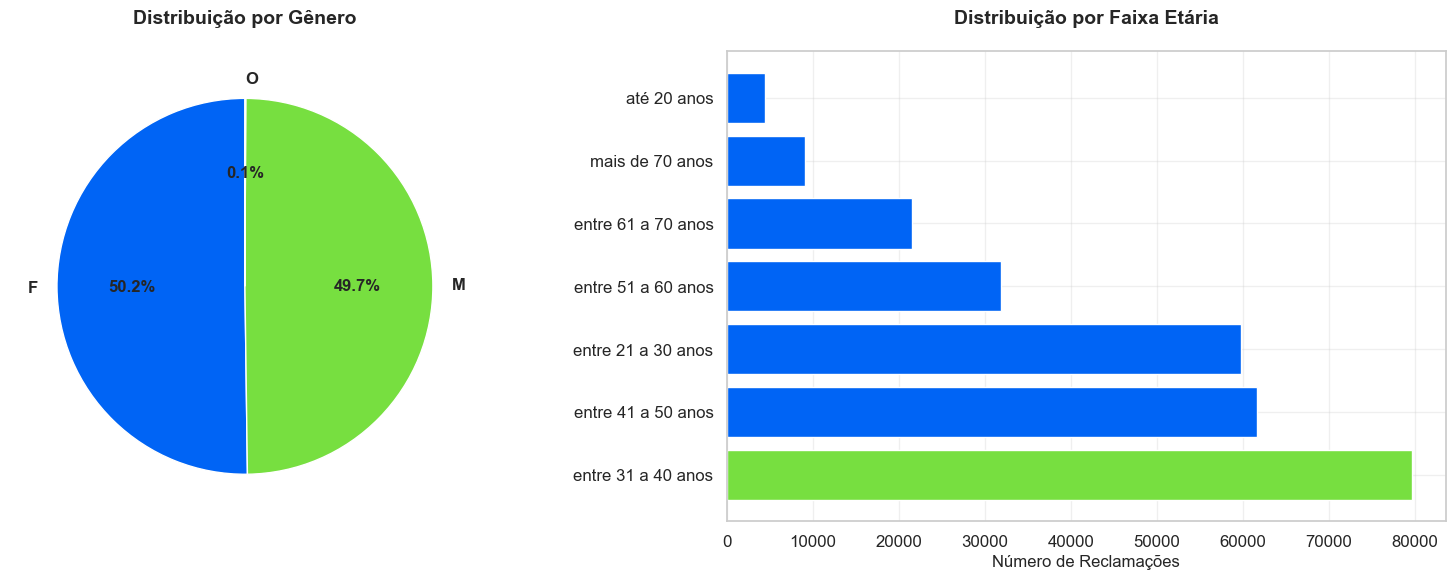

In [198]:
# PERGUNTA 2: VISUALIZAÇÃO GÊNERO E FAIXA ETÁRIA
# Gráficos de distribuição demográfica

print("=" * 80)
print("GRÁFICO: PERFIL DEMOGRÁFICO")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição de Gênero (Pizza)
generos_grafico = generos_ordenados[generos_ordenados != 'Não Informado']
contagens_genero_grafico = contagens_ordenadas[generos_ordenados != 'Não Informado']

cores_pizza = [CORES_AGIBANK['azul_principal'], CORES_AGIBANK['verde'], CORES_AGIBANK['amarelo']]
ax1.pie(contagens_genero_grafico, labels=generos_grafico, autopct='%1.1f%%', 
        colors=cores_pizza[:len(generos_grafico)], startangle=90, 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Distribuição por Gênero', fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Distribuição Faixa Etária (Barras)
faixas_grafico = faixas_ordenadas[faixas_ordenadas != 'Não Informado']
contagens_faixas_grafico = contagens_faixas_ord[faixas_ordenadas != 'Não Informado']

cores_barras_faixa = [CORES_AGIBANK['verde'] if i == 0 else CORES_AGIBANK['azul_principal'] 
                      for i in range(len(faixas_grafico))]

ax2.barh(range(len(faixas_grafico)), contagens_faixas_grafico, 
         color=cores_barras_faixa, edgecolor='white', linewidth=1)
ax2.set_yticks(range(len(faixas_grafico)))
ax2.set_yticklabels(faixas_grafico)
ax2.set_xlabel('Número de Reclamações', fontsize=12)
ax2.set_title('Distribuição por Faixa Etária', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [199]:
# PERGUNTA 3: SATISFAÇÃO DO CONSUMIDOR PAULISTA
# Análise do nível de satisfação através das notas atribuídas

print("=" * 80)
print("PERGUNTA 3: SATISFAÇÃO DO CONSUMIDOR PAULISTA")
print("=" * 80)

# Remove valores ausentes para cálculos
arr_nota_valida = arr_nota[~np.isnan(arr_nota)]

# Estatísticas descritivas
nota_media = np.mean(arr_nota_valida)
nota_mediana = np.median(arr_nota_valida)
nota_desvio = np.std(arr_nota_valida)
nota_min = np.min(arr_nota_valida)
nota_max = np.max(arr_nota_valida)

# Distribuição de notas
notas_unicas, contagem_notas = np.unique(arr_nota_valida, return_counts=True)
pct_notas = (contagem_notas / len(arr_nota_valida)) * 100

# Categorias de satisfação
insatisfeitos = np.sum(arr_nota_valida <= 2)
neutros = np.sum(arr_nota_valida == 3)
satisfeitos = np.sum(arr_nota_valida >= 4)

pct_insatisfeitos = (insatisfeitos / len(arr_nota_valida)) * 100
pct_neutros = (neutros / len(arr_nota_valida)) * 100
pct_satisfeitos = (satisfeitos / len(arr_nota_valida)) * 100

# NPS (Net Promoter Score)
promotores = np.sum(arr_nota_valida >= 4)
detratores = np.sum(arr_nota_valida <= 2)
nps = ((promotores - detratores) / len(arr_nota_valida)) * 100

# Taxa de avaliação
total_com_nota = len(arr_nota_valida)
total_sem_nota = np.sum(np.isnan(arr_nota))
taxa_avaliacao = (total_com_nota / len(arr_nota)) * 100

print(f"\nESTATÍSTICAS GERAIS:")
print(f"  Nota média: {nota_media:.2f}")
print(f"  Nota mediana: {nota_mediana:.2f}")
print(f"  Desvio padrão: {nota_desvio:.2f}")
print(f"  Amplitude: {nota_min:.0f} a {nota_max:.0f}")

print(f"\nDISTRIBUIÇÃO POR CATEGORIA:")
print(f"  Insatisfeitos (≤2): {insatisfeitos:,} ({pct_insatisfeitos:.1f}%)")
print(f"  Neutros (=3): {neutros:,} ({pct_neutros:.1f}%)")
print(f"  Satisfeitos (≥4): {satisfeitos:,} ({pct_satisfeitos:.1f}%)")

print(f"\nNPS (NET PROMOTER SCORE):")
print(f"  NPS: {nps:+.1f}")

print(f"\nTAXA DE AVALIAÇÃO:")
print(f"  Com nota: {total_com_nota:,} ({taxa_avaliacao:.1f}%)")
print(f"  Sem nota: {total_sem_nota:,} ({100 - taxa_avaliacao:.1f}%)")

# Tabela detalhada
df_notas = pd.DataFrame({
    'Nota': notas_unicas.astype(int),
    'Quantidade': contagem_notas,
    '% do Total': pct_notas
}).set_index('Nota')

display(
    df_notas.style
    .format({
        'Quantidade': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='RdYlGn', subset=['% do Total'])
    .set_caption('Distribuição Detalhada das Notas - Setor Financeiro SP')
)

PERGUNTA 3: SATISFAÇÃO DO CONSUMIDOR PAULISTA

ESTATÍSTICAS GERAIS:
  Nota média: 2.19
  Nota mediana: 1.00
  Desvio padrão: 1.60
  Amplitude: 1 a 5

DISTRIBUIÇÃO POR CATEGORIA:
  Insatisfeitos (≤2): 42,672 (65.2%)
  Neutros (=3): 6,578 (10.0%)
  Satisfeitos (≥4): 16,245 (24.8%)

NPS (NET PROMOTER SCORE):
  NPS: -40.3

TAXA DE AVALIAÇÃO:
  Com nota: 65,495 (24.4%)
  Sem nota: 202,526 (75.6%)


,Quantidade,% do Total
Nota,,
1,"38,525",58.8%
2,"4,147",6.3%
3,"6,578",10.0%
4,"4,263",6.5%
5,"11,982",18.3%


GRÁFICO: DISTRIBUIÇÃO DE SATISFAÇÃO


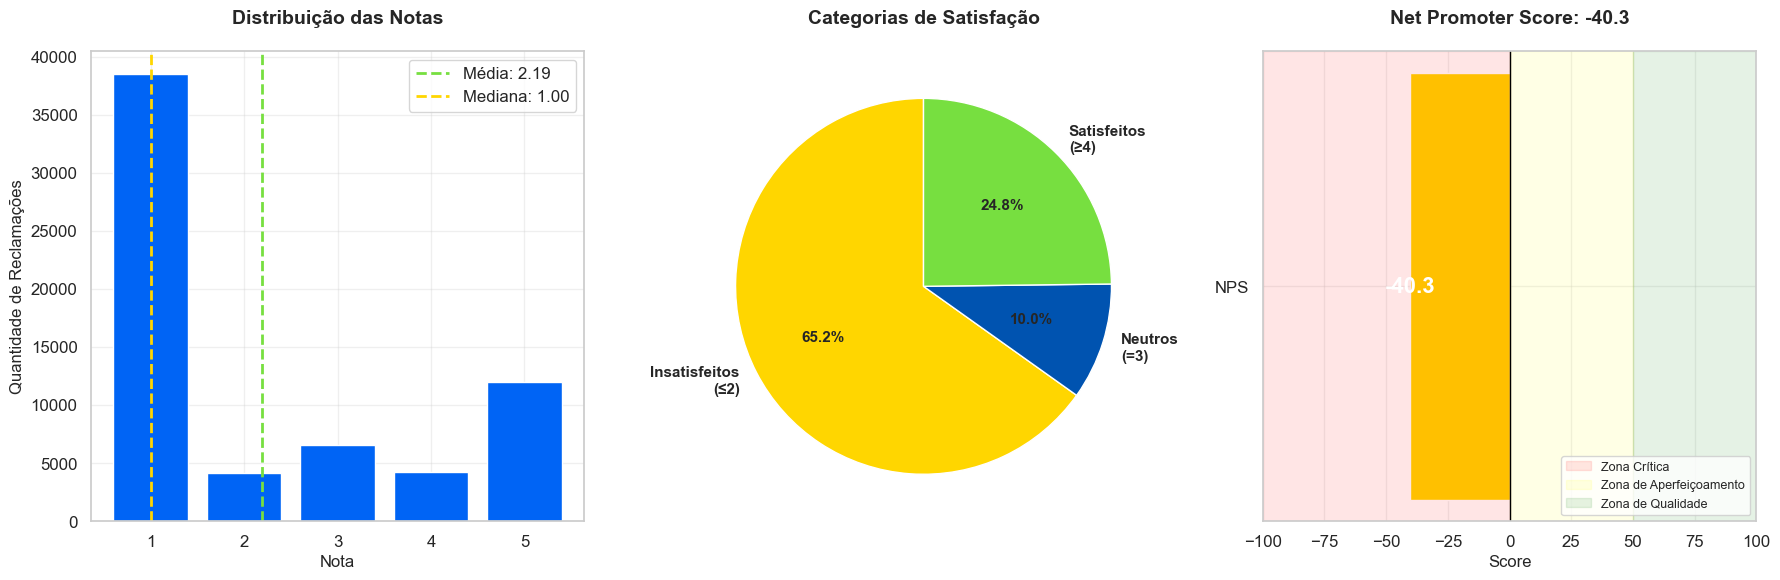

In [200]:
# PERGUNTA 3: VISUALIZAÇÃO DE SATISFAÇÃO
# Gráficos mostrando distribuição de notas e categorias

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO DE SATISFAÇÃO")
print("=" * 80)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Histograma de notas
ax1.bar(notas_unicas, contagem_notas, color=CORES_AGIBANK['azul_principal'], 
        edgecolor='white', linewidth=1)
ax1.axvline(x=nota_media, color=CORES_AGIBANK['verde'], linestyle='--', 
            linewidth=2, label=f'Média: {nota_media:.2f}')
ax1.axvline(x=nota_mediana, color=CORES_AGIBANK['amarelo'], linestyle='--', 
            linewidth=2, label=f'Mediana: {nota_mediana:.2f}')
ax1.set_title('Distribuição das Notas', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Nota', fontsize=12)
ax1.set_ylabel('Quantidade de Reclamações', fontsize=12)
ax1.set_xticks(notas_unicas)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Pizza de categorias
categorias = ['Insatisfeitos\n(≤2)', 'Neutros\n(=3)', 'Satisfeitos\n(≥4)']
valores_cat = [insatisfeitos, neutros, satisfeitos]
cores_cat = [CORES_AGIBANK['amarelo'], CORES_AGIBANK['azul_medio'], CORES_AGIBANK['verde']]

ax2.pie(valores_cat, labels=categorias, autopct='%1.1f%%', colors=cores_cat,
        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Categorias de Satisfação', fontsize=14, fontweight='bold', pad=20)

# Gráfico 3: NPS visual
ax3.barh(['NPS'], [nps], color=CORES_AGIBANK['verde'] if nps > 0 else CORES_AGIBANK['amarelo'],
         height=0.5)
ax3.axvline(x=0, color='black', linewidth=1)
ax3.set_xlim(-100, 100)
ax3.set_xlabel('Score', fontsize=12)
ax3.set_title(f'Net Promoter Score: {nps:+.1f}', fontsize=14, fontweight='bold', pad=20)
ax3.text(nps, 0, f'{nps:+.1f}', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')
ax3.grid(True, alpha=0.3, axis='x')

ax3.axvspan(-100, 0, alpha=0.1, color='red', label='Zona Crítica')
ax3.axvspan(0, 50, alpha=0.1, color='yellow', label='Zona de Aperfeiçoamento')
ax3.axvspan(50, 100, alpha=0.1, color='green', label='Zona de Qualidade')
ax3.legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

In [201]:
# PERGUNTA 4: DISTRIBUIÇÃO GEOGRÁFICA INTERNA DE SÃO PAULO
# Análise das principais cidades do estado em volume de reclamações

print("=" * 80)
print("PERGUNTA 4: DISTRIBUIÇÃO GEOGRÁFICA INTERNA DE SÃO PAULO")
print("=" * 80)

# Conta distribuição por cidade
cidades_unicas, contagem_cidades = np.unique(arr_cidade, return_counts=True)

# Ordena do maior para o menor
idx_ord_cidades = np.argsort(contagem_cidades)[::-1]
cidades_ordenadas = cidades_unicas[idx_ord_cidades]
contagens_ordenadas = contagem_cidades[idx_ord_cidades]

# TOP 20 cidades
top20_cidades = cidades_ordenadas[:20]
top20_contagens = contagens_ordenadas[:20]
pct_top20 = (top20_contagens / total_registros) * 100

# Identifica posições
posicao_campinas = np.where(top20_cidades == 'CAMPINAS')[0][0] + 1 if 'CAMPINAS' in top20_cidades else None

# Concentração geográfica
pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100

print(f"\nCONCENTRAÇÃO GEOGRÁFICA:")
print(f"  Capital (São Paulo): {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")

if posicao_campinas:
    qtd_campinas = top20_contagens[posicao_campinas - 1]
    pct_campinas_sp = (qtd_campinas / total_registros) * 100
    pct_campinas_interior = (qtd_campinas / total_interior) * 100
    
    print(f"\nDESTAQUE CAMPINAS:")
    print(f"  Posição no ranking: {posicao_campinas}º lugar")
    print(f"  Reclamações: {qtd_campinas:,}")
    print(f"  Representa {pct_campinas_sp:.1f}% de SP")
    print(f"  Representa {pct_campinas_interior:.1f}% do Interior")

# Tabela TOP 20
df_top20_cidades = pd.DataFrame({
    'Posição': np.arange(1, 21),
    'Cidade': top20_cidades,
    'Reclamações': top20_contagens,
    '% de SP': pct_top20,
    'Tipo': ['Capital' if cidade == 'SÃO PAULO' else 'Interior' for cidade in top20_cidades]
}).set_index('Posição')

def estilo_tipo(row):
    if row['Tipo'] == 'Capital':
        return ['', '', '', 'background-color: #90EE90; color: black']
    elif row.name == posicao_campinas:
        return ['', '', '', 'background-color: #FFE4B5; color: black']
    else:
        return ['', '', '', '']

display(
    df_top20_cidades.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .apply(estilo_tipo, axis=1)
    .set_caption('TOP 20 Cidades - Setor Financeiro SP')
)

PERGUNTA 4: DISTRIBUIÇÃO GEOGRÁFICA INTERNA DE SÃO PAULO

CONCENTRAÇÃO GEOGRÁFICA:
  Capital (São Paulo): 81,843 (30.5%)
  Interior: 186,178 (69.5%)

DESTAQUE CAMPINAS:
  Posição no ranking: 3º lugar
  Reclamações: 7,343
  Representa 2.7% de SP
  Representa 3.9% do Interior


,Cidade,Reclamações,% de SP,Tipo
Posição,,,,
1,SÃO PAULO,"81,843",30.54%,Capital
2,GUARULHOS,"8,593",3.21%,Interior
3,CAMPINAS,"7,343",2.74%,Interior
4,SOROCABA,"6,098",2.28%,Interior
5,OSASCO,"5,427",2.02%,Interior
6,RIBEIRÃO PRETO,"5,100",1.90%,Interior
7,SÃO BERNARDO DO CAMPO,"4,907",1.83%,Interior
8,SANTO ANDRÉ,"4,765",1.78%,Interior
9,SÃO JOSÉ DOS CAMPOS,"4,752",1.77%,Interior


GRÁFICO: DISTRIBUIÇÃO GEOGRÁFICA


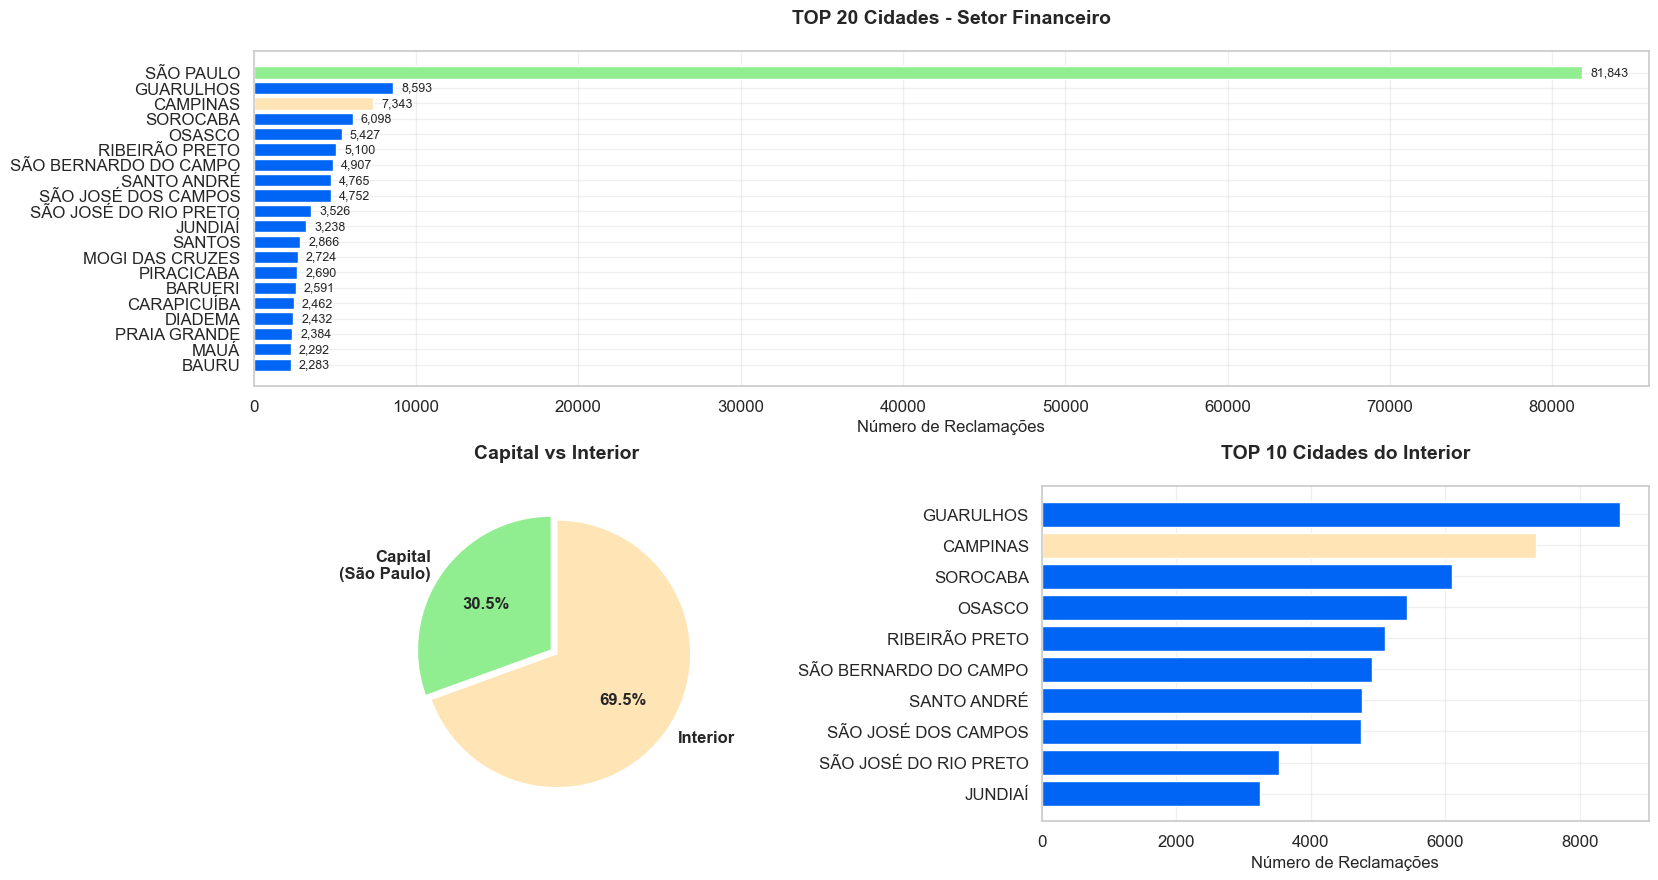

In [202]:
# PERGUNTA 4: VISUALIZAÇÃO DISTRIBUIÇÃO GEOGRÁFICA
# Gráficos mostrando concentração por cidade

print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO GEOGRÁFICA")
print("=" * 80)

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Gráfico 1: TOP 20 cidades
cores_ranking = ['#90EE90' if cidade == 'SÃO PAULO' 
                 else '#FFE4B5' if cidade == 'CAMPINAS' 
                 else CORES_AGIBANK['azul_principal'] 
                 for cidade in top20_cidades]

y_pos = np.arange(len(top20_cidades))
ax1.barh(y_pos, top20_contagens, color=cores_ranking, edgecolor='white', linewidth=1)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top20_cidades)
ax1.invert_yaxis()
ax1.set_xlabel('Número de Reclamações', fontsize=12)
ax1.set_title('TOP 20 Cidades - Setor Financeiro', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='x')

for i, (cidade, valor) in enumerate(zip(top20_cidades, top20_contagens)):
    ax1.text(valor + 500, i, f'{valor:,}', va='center', fontsize=9)

# Gráfico 2: Pizza Capital vs Interior
categorias_geo = ['Capital\n(São Paulo)', 'Interior']
valores_geo = [total_capital, total_interior]
cores_geo = ['#90EE90', '#FFE4B5']
explode = (0.05, 0)

ax2.pie(valores_geo, labels=categorias_geo, autopct='%1.1f%%', colors=cores_geo,
        explode=explode, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Capital vs Interior', fontsize=14, fontweight='bold', pad=20)

# Gráfico 3: TOP 10 Interior
top10_interior = top20_cidades[1:11]
top10_interior_valores = top20_contagens[1:11]

ax3.barh(np.arange(len(top10_interior)), top10_interior_valores, 
         color=['#FFE4B5' if cidade == 'CAMPINAS' else CORES_AGIBANK['azul_principal'] 
                for cidade in top10_interior],
         edgecolor='white', linewidth=1)
ax3.set_yticks(np.arange(len(top10_interior)))
ax3.set_yticklabels(top10_interior)
ax3.invert_yaxis()
ax3.set_xlabel('Número de Reclamações', fontsize=12)
ax3.set_title('TOP 10 Cidades do Interior', fontsize=14, fontweight='bold', pad=20)
ax3.grid(True, alpha=0.3, axis='x')

plt.show()

In [203]:
# PERGUNTA 5: COMPARAÇÃO CAPITAL VS INTERIOR
# Análise de diferenças de desempenho entre Capital e Interior

print("=" * 80)
print("PERGUNTA 5: CAPITAL VS INTERIOR")
print("=" * 80)

# Separar dados por região
mask_capital = df_sp_financeiro['eh_capital']
mask_interior = df_sp_financeiro['eh_interior']

# Arrays por região
arr_nota_capital = df_sp_financeiro.loc[mask_capital, 'nota_do_consumidor'].to_numpy()
arr_nota_interior = df_sp_financeiro.loc[mask_interior, 'nota_do_consumidor'].to_numpy()

arr_tempo_capital = df_sp_financeiro.loc[mask_capital, 'tempo_resposta'].to_numpy()
arr_tempo_interior = df_sp_financeiro.loc[mask_interior, 'tempo_resposta'].to_numpy()

arr_avaliacao_capital = df_sp_financeiro.loc[mask_capital, 'avaliacao_reclamacao'].to_numpy()
arr_avaliacao_interior = df_sp_financeiro.loc[mask_interior, 'avaliacao_reclamacao'].to_numpy()

# NOTA MÉDIA
nota_media_capital = np.nanmean(arr_nota_capital)
nota_media_interior = np.nanmean(arr_nota_interior)
diferenca_nota = nota_media_interior - nota_media_capital

# TEMPO MÉDIO
tempo_medio_capital = np.nanmean(arr_tempo_capital)
tempo_medio_interior = np.nanmean(arr_tempo_interior)
diferenca_tempo = tempo_medio_interior - tempo_medio_capital

# TAXA DE RESOLUÇÃO
resolvidas_capital = np.sum(arr_avaliacao_capital == 'Resolvida')
total_avaliadas_capital = np.sum(~pd.isna(arr_avaliacao_capital))
taxa_resolucao_capital = (resolvidas_capital / total_avaliadas_capital) * 100 if total_avaliadas_capital > 0 else 0

resolvidas_interior = np.sum(arr_avaliacao_interior == 'Resolvida')
total_avaliadas_interior = np.sum(~pd.isna(arr_avaliacao_interior))
taxa_resolucao_interior = (resolvidas_interior / total_avaliadas_interior) * 100 if total_avaliadas_interior > 0 else 0

diferenca_resolucao = taxa_resolucao_interior - taxa_resolucao_capital

# Tabela comparativa
df_comparacao = pd.DataFrame({
    'Indicador': ['Volume de Reclamações', 'Nota Média', 'Tempo Médio (dias)', 'Taxa de Resolução (%)'],
    'Capital': [
        f'{total_capital:,}',
        f'{nota_media_capital:.2f}',
        f'{tempo_medio_capital:.1f}',
        f'{taxa_resolucao_capital:.1f}%'
    ],
    'Interior': [
        f'{total_interior:,}',
        f'{nota_media_interior:.2f}',
        f'{tempo_medio_interior:.1f}',
        f'{taxa_resolucao_interior:.1f}%'
    ],
    'Diferença': [
        f'{total_interior - total_capital:+,}',
        f'{diferenca_nota:+.2f}',
        f'{diferenca_tempo:+.1f}',
        f'{diferenca_resolucao:+.1f}pp'
    ]
}).set_index('Indicador')

print("\nCOMPARAÇÃO DE INDICADORES:")
print("-" * 80)
display(df_comparacao)

print("\nINTERPRETAÇÃO:")
print("-" * 80)

if diferenca_nota > 0:
    print(f"O Interior tem nota {abs(diferenca_nota):.2f} pontos MAIOR que a Capital")
else:
    print(f"A Capital tem nota {abs(diferenca_nota):.2f} pontos MAIOR que o Interior")

if diferenca_tempo > 0:
    print(f"O Interior demora {abs(diferenca_tempo):.1f} dias A MAIS para responder")
else:
    print(f"A Capital demora {abs(diferenca_tempo):.1f} dias A MAIS para responder")

if diferenca_resolucao > 0:
    print(f"O Interior resolve {abs(diferenca_resolucao):.1f}pp A MAIS de casos")
else:
    print(f"A Capital resolve {abs(diferenca_resolucao):.1f}pp A MAIS de casos")

PERGUNTA 5: CAPITAL VS INTERIOR

COMPARAÇÃO DE INDICADORES:
--------------------------------------------------------------------------------


,Capital,Interior,Diferença
Indicador,,,
Volume de Reclamações,"81,843","186,178","+104,335"
Nota Média,2.16,2.21,+0.05
Tempo Médio (dias),6.5,6.3,-0.1
Taxa de Resolução (%),8.7%,8.2%,-0.5pp



INTERPRETAÇÃO:
--------------------------------------------------------------------------------
O Interior tem nota 0.05 pontos MAIOR que a Capital
A Capital demora 0.1 dias A MAIS para responder
A Capital resolve 0.5pp A MAIS de casos


In [204]:
# PERGUNTA 5: PERFIL DEMOGRÁFICO CAPITAL VS INTERIOR
# Comparação de distribuição de gênero e faixa etária

print("=" * 80)
print("PERFIL DEMOGRÁFICO: CAPITAL VS INTERIOR")
print("=" * 80)

# GÊNERO
print("\nDISTRIBUIÇÃO POR GÊNERO:")
print("-" * 80)

arr_sexo_capital = df_sp_financeiro.loc[mask_capital, 'sexo'].fillna('Não Informado').to_numpy()
generos_capital, contagem_genero_capital = np.unique(arr_sexo_capital, return_counts=True)
pct_genero_capital = (contagem_genero_capital / len(arr_sexo_capital)) * 100

arr_sexo_interior = df_sp_financeiro.loc[mask_interior, 'sexo'].fillna('Não Informado').to_numpy()
generos_interior, contagem_genero_interior = np.unique(arr_sexo_interior, return_counts=True)
pct_genero_interior = (contagem_genero_interior / len(arr_sexo_interior)) * 100

df_genero_comp = pd.DataFrame({
    'Gênero': ['Feminino', 'Masculino', 'Outro'],
    'Capital (qtd)': [
        contagem_genero_capital[generos_capital == 'F'][0] if 'F' in generos_capital else 0,
        contagem_genero_capital[generos_capital == 'M'][0] if 'M' in generos_capital else 0,
        contagem_genero_capital[generos_capital == 'O'][0] if 'O' in generos_capital else 0
    ],
    'Capital (%)': [
        pct_genero_capital[generos_capital == 'F'][0] if 'F' in generos_capital else 0,
        pct_genero_capital[generos_capital == 'M'][0] if 'M' in generos_capital else 0,
        pct_genero_capital[generos_capital == 'O'][0] if 'O' in generos_capital else 0
    ],
    'Interior (qtd)': [
        contagem_genero_interior[generos_interior == 'F'][0] if 'F' in generos_interior else 0,
        contagem_genero_interior[generos_interior == 'M'][0] if 'M' in generos_interior else 0,
        contagem_genero_interior[generos_interior == 'O'][0] if 'O' in generos_interior else 0
    ],
    'Interior (%)': [
        pct_genero_interior[generos_interior == 'F'][0] if 'F' in generos_interior else 0,
        pct_genero_interior[generos_interior == 'M'][0] if 'M' in generos_interior else 0,
        pct_genero_interior[generos_interior == 'O'][0] if 'O' in generos_interior else 0
    ]
}).set_index('Gênero')

display(
    df_genero_comp.style
    .format({
        'Capital (qtd)': '{:,.0f}',
        'Capital (%)': '{:.1f}%',
        'Interior (qtd)': '{:,.0f}',
        'Interior (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Greens', subset=['Capital (%)'])
    .background_gradient(cmap='Blues', subset=['Interior (%)'])
    .set_caption('Distribuição de Gênero: Capital vs Interior')
)

# FAIXA ETÁRIA
print("\n\nDISTRIBUIÇÃO POR FAIXA ETÁRIA:")
print("-" * 80)

arr_faixa_capital = df_sp_financeiro.loc[mask_capital, 'faixa_etaria'].fillna('Não Informado').to_numpy()
faixas_capital, contagem_faixa_capital = np.unique(arr_faixa_capital, return_counts=True)
pct_faixa_capital = (contagem_faixa_capital / len(arr_faixa_capital)) * 100

arr_faixa_interior = df_sp_financeiro.loc[mask_interior, 'faixa_etaria'].fillna('Não Informado').to_numpy()
faixas_interior, contagem_faixa_interior = np.unique(arr_faixa_interior, return_counts=True)
pct_faixa_interior = (contagem_faixa_interior / len(arr_faixa_interior)) * 100

ordem_faixas_comp = [
    'até 20 anos',
    'entre 21 a 30 anos',
    'entre 31 a 40 anos',
    'entre 41 a 50 anos',
    'entre 51 a 60 anos',
    'entre 61 a 70 anos',
    'mais de 70 anos'
]

dados_faixa_comp = []
for faixa in ordem_faixas_comp:
    capital_qtd = contagem_faixa_capital[faixas_capital == faixa][0] if faixa in faixas_capital else 0
    capital_pct = pct_faixa_capital[faixas_capital == faixa][0] if faixa in faixas_capital else 0
    interior_qtd = contagem_faixa_interior[faixas_interior == faixa][0] if faixa in faixas_interior else 0
    interior_pct = pct_faixa_interior[faixas_interior == faixa][0] if faixa in faixas_interior else 0
    
    dados_faixa_comp.append([faixa, capital_qtd, capital_pct, interior_qtd, interior_pct])

df_faixa_comp = pd.DataFrame(
    dados_faixa_comp,
    columns=['Faixa Etária', 'Capital (qtd)', 'Capital (%)', 'Interior (qtd)', 'Interior (%)']
).set_index('Faixa Etária')

display(
    df_faixa_comp.style
    .format({
        'Capital (qtd)': '{:,.0f}',
        'Capital (%)': '{:.1f}%',
        'Interior (qtd)': '{:,.0f}',
        'Interior (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Greens', subset=['Capital (%)'])
    .background_gradient(cmap='Blues', subset=['Interior (%)'])
    .set_caption('Distribuição de Faixa Etária: Capital vs Interior')
)

PERFIL DEMOGRÁFICO: CAPITAL VS INTERIOR

DISTRIBUIÇÃO POR GÊNERO:
--------------------------------------------------------------------------------


,Capital (qtd),Capital (%),Interior (qtd),Interior (%)
Gênero,,,,
Feminino,"41,192",50.3%,"93,383",50.2%
Masculino,"40,578",49.6%,"92,683",49.8%
Outro,69,0.1%,112,0.1%




DISTRIBUIÇÃO POR FAIXA ETÁRIA:
--------------------------------------------------------------------------------


,Capital (qtd),Capital (%),Interior (qtd),Interior (%)
Faixa Etária,,,,
até 20 anos,"1,100",1.3%,"3,313",1.8%
entre 21 a 30 anos,"18,006",22.0%,"41,811",22.5%
entre 31 a 40 anos,"25,204",30.8%,"54,406",29.2%
entre 41 a 50 anos,"19,694",24.1%,"41,989",22.6%
entre 51 a 60 anos,"9,651",11.8%,"22,205",11.9%
entre 61 a 70 anos,"5,766",7.0%,"15,776",8.5%
mais de 70 anos,"2,422",3.0%,"6,678",3.6%


In [205]:
# PERGUNTA 6: RANKING DE INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO
# Identificação das instituições com mais reclamações no estado

print("=" * 80)
print("PERGUNTA 6: RANKING DE INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO")
print("=" * 80)

# Conta distribuição por instituição
instituicoes_unicas, contagem_instituicoes = np.unique(arr_instituicao, return_counts=True)

# Ordena do maior para o menor
idx_ord_inst = np.argsort(contagem_instituicoes)[::-1]
instituicoes_ordenadas = instituicoes_unicas[idx_ord_inst]
contagens_ordenadas = contagem_instituicoes[idx_ord_inst]

# TOP 15
top15_instituicoes = instituicoes_ordenadas[:15]
top15_contagens = contagens_ordenadas[:15]
pct_top15 = (top15_contagens / total_registros) * 100

# Percentual acumulado (Curva de Pareto)
pct_acumulado = np.cumsum(pct_top15)

# Métricas por instituição
notas_por_inst = []
tempo_por_inst = []
taxa_resolucao_por_inst = []

for inst in top15_instituicoes:
    mask_inst = arr_instituicao == inst
    
    # Nota média
    notas_inst = df_sp_financeiro.loc[mask_inst, 'nota_do_consumidor'].to_numpy()
    nota_media_inst = np.nanmean(notas_inst)
    notas_por_inst.append(nota_media_inst)
    
    # Tempo médio
    tempo_inst = df_sp_financeiro.loc[mask_inst, 'tempo_resposta'].to_numpy()
    tempo_medio_inst = np.nanmean(tempo_inst)
    tempo_por_inst.append(tempo_medio_inst)
    
    # Taxa de resolução
    avaliacao_inst = df_sp_financeiro.loc[mask_inst, 'avaliacao_reclamacao'].to_numpy()
    resolvidas_inst = np.sum(avaliacao_inst == 'Resolvida')
    total_avaliadas_inst = np.sum(~pd.isna(avaliacao_inst))
    taxa_inst = (resolvidas_inst / total_avaliadas_inst) * 100 if total_avaliadas_inst > 0 else 0
    taxa_resolucao_por_inst.append(taxa_inst)

notas_por_inst = np.array(notas_por_inst)
tempo_por_inst = np.array(tempo_por_inst)
taxa_resolucao_por_inst = np.array(taxa_resolucao_por_inst)

print(f"\nCONCENTRAÇÃO DE MERCADO:")
print(f"  TOP 5 instituições: {pct_acumulado[4]:.1f}% das reclamações")
print(f"  TOP 10 instituições: {pct_acumulado[9]:.1f}% das reclamações")
print(f"  TOP 15 instituições: {pct_acumulado[14]:.1f}% das reclamações")

# Tabela TOP 15
df_top15_inst = pd.DataFrame({
    'Posição': np.arange(1, 16),
    'Instituição': top15_instituicoes,
    'Reclamações': top15_contagens,
    '% SP': pct_top15,
    '% Acumulado': pct_acumulado,
    'Nota Média': notas_por_inst,
    'Tempo (dias)': tempo_por_inst,
    'Taxa Resolução (%)': taxa_resolucao_por_inst
}).set_index('Posição')

display(
    df_top15_inst.style
    .format({
        'Reclamações': '{:,.0f}',
        '% SP': '{:.2f}%',
        '% Acumulado': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 15 Instituições Financeiras - Estado de São Paulo')
)

PERGUNTA 6: RANKING DE INSTITUIÇÕES FINANCEIRAS EM SÃO PAULO

CONCENTRAÇÃO DE MERCADO:
  TOP 5 instituições: 42.5% das reclamações
  TOP 10 instituições: 58.1% das reclamações
  TOP 15 instituições: 67.3% das reclamações


,Instituição,Reclamações,% SP,% Acumulado,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,,
1,Nubank,"36,640",13.67%,13.7%,1.80,3.4,3.6%
2,Banco Santander,"23,969",8.94%,22.6%,2.07,5.7,7.4%
3,Banco Bradesco,"19,145",7.14%,29.8%,2.02,8.8,5.9%
4,Banco do Brasil,"17,085",6.37%,36.1%,2.47,4.6,8.7%
5,Banco Itaú Unibanco,"17,016",6.35%,42.5%,2.08,6.7,7.8%
6,Caixa Econômica Federal,"12,059",4.50%,47.0%,2.65,6.7,12.9%
7,Cartões Itaú,"9,132",3.41%,50.4%,2.28,8.3,9.3%
8,Mercado Pago,"7,908",2.95%,53.3%,2.62,8.0,13.1%
9,Banco Pan,"6,597",2.46%,55.8%,1.99,5.9,6.7%


GRÁFICO: RANKING DE INSTITUIÇÕES


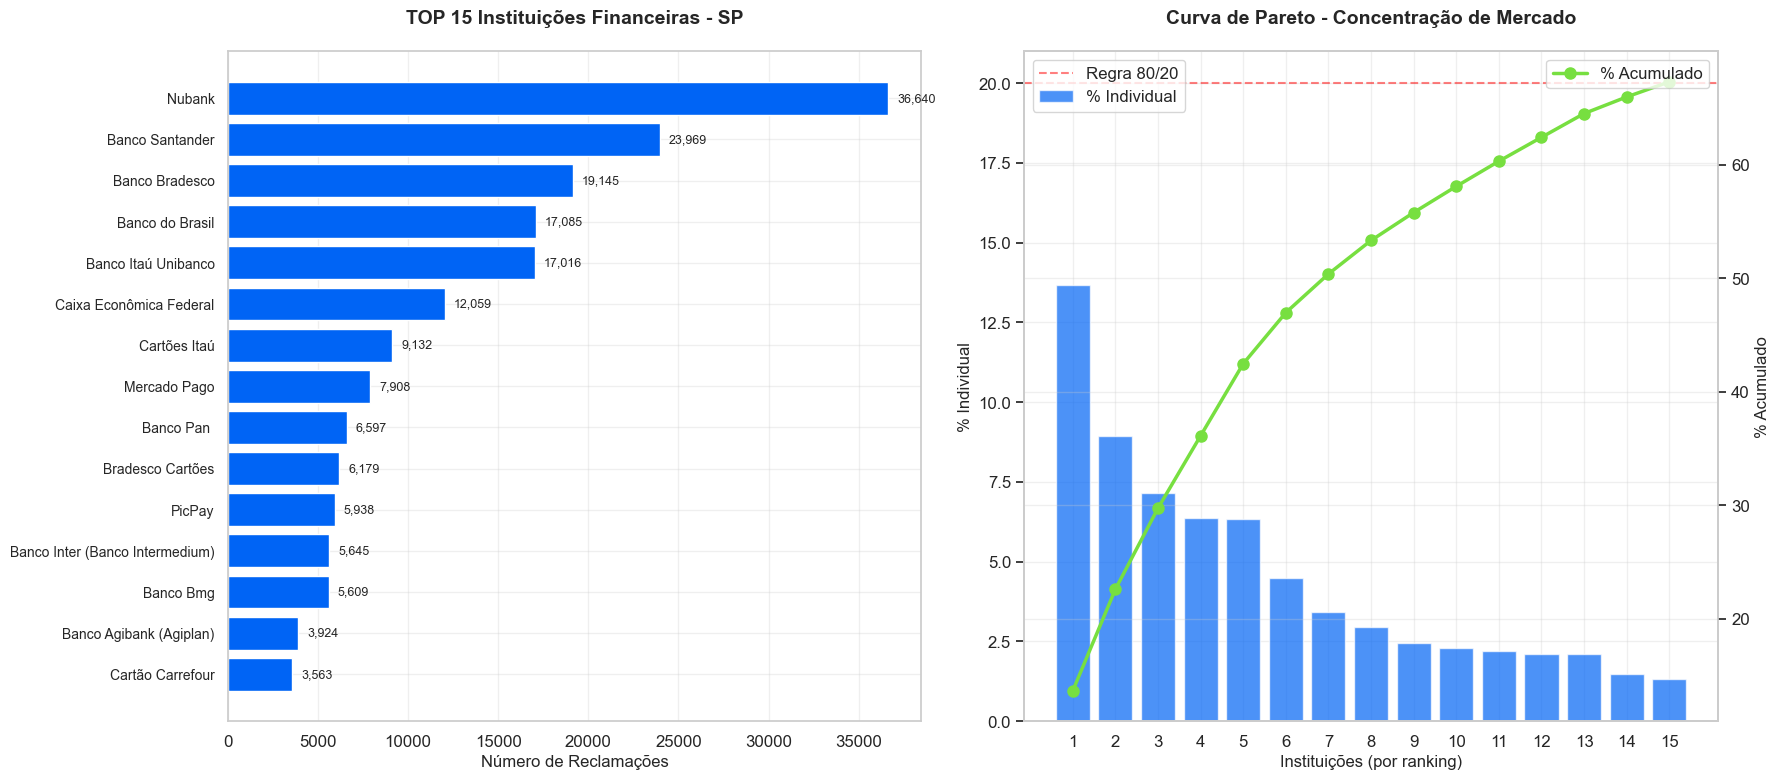

In [206]:
# PERGUNTA 6: VISUALIZAÇÃO RANKING DE INSTITUIÇÕES
# Gráficos mostrando TOP 15 e curva de Pareto

print("=" * 80)
print("GRÁFICO: RANKING DE INSTITUIÇÕES")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico 1: Ranking TOP 15 (barras horizontais)
y_pos = np.arange(len(top15_instituicoes))
ax1.barh(y_pos, top15_contagens, color=CORES_AGIBANK['azul_principal'], 
         edgecolor='white', linewidth=1)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top15_instituicoes, fontsize=10)
ax1.invert_yaxis()
ax1.set_xlabel('Número de Reclamações', fontsize=12)
ax1.set_title('TOP 15 Instituições Financeiras - SP', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='x')

for i, (inst, valor) in enumerate(zip(top15_instituicoes, top15_contagens)):
    ax1.text(valor + 500, i, f'{valor:,}', va='center', fontsize=9)

# Gráfico 2: Curva de Pareto
ax2_linha = ax2.twinx()

ax2.bar(np.arange(len(top15_instituicoes)), pct_top15, 
        color=CORES_AGIBANK['azul_principal'], alpha=0.7, label='% Individual')
ax2_linha.plot(np.arange(len(top15_instituicoes)), pct_acumulado, 
               color=CORES_AGIBANK['verde'], marker='o', linewidth=2.5, 
               markersize=8, label='% Acumulado')

ax2.set_xlabel('Instituições (por ranking)', fontsize=12)
ax2.set_ylabel('% Individual', fontsize=12)
ax2_linha.set_ylabel('% Acumulado', fontsize=12)
ax2.set_title('Curva de Pareto - Concentração de Mercado', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(np.arange(len(top15_instituicoes)))
ax2.set_xticklabels(np.arange(1, 16))
ax2.grid(True, alpha=0.3, axis='y')

ax2.axhline(y=20, color='red', linestyle='--', alpha=0.5, label='Regra 80/20')
ax2.legend(loc='upper left')
ax2_linha.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [207]:
# PERGUNTA 7: PERFORMANCE DAS INSTITUIÇÕES EM SÃO PAULO
# Análise detalhada de desempenho das TOP 10 instituições

print("=" * 80)
print("PERGUNTA 7: PERFORMANCE DAS INSTITUIÇÕES EM SÃO PAULO")
print("=" * 80)

# Seleciona TOP 10 para análise detalhada
top10_instituicoes = instituicoes_ordenadas[:10]
top10_contagens = contagens_ordenadas[:10]

# Calcula métricas detalhadas para TOP 10
metricas_top10 = []

for inst in top10_instituicoes:
    mask_inst = arr_instituicao == inst
    
    # Volume
    volume = np.sum(mask_inst)
    
    # Nota média
    notas = df_sp_financeiro.loc[mask_inst, 'nota_do_consumidor'].to_numpy()
    nota_media = np.nanmean(notas)
    
    # Tempo médio
    tempos = df_sp_financeiro.loc[mask_inst, 'tempo_resposta'].to_numpy()
    tempo_medio = np.nanmean(tempos)
    
    # Taxa de resolução
    avaliacoes = df_sp_financeiro.loc[mask_inst, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(avaliacoes == 'Resolvida')
    total_avaliadas = np.sum(~pd.isna(avaliacoes))
    taxa_resolucao = (resolvidas / total_avaliadas) * 100 if total_avaliadas > 0 else 0
    
    metricas_top10.append({
        'Instituição': inst,
        'Volume': volume,
        'Nota Média': nota_media,
        'Tempo (dias)': tempo_medio,
        'Taxa Resolução (%)': taxa_resolucao
    })

df_metricas = pd.DataFrame(metricas_top10).set_index('Instituição')

print("\nMÉTRICAS DE PERFORMANCE - TOP 10:")
print("-" * 80)

display(
    df_metricas.style
    .format({
        'Volume': '{:,.0f}',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Volume'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('Performance das TOP 10 Instituições - São Paulo')
)

# Identifica melhores e piores
melhor_nota_idx = df_metricas['Nota Média'].idxmax()
pior_nota_idx = df_metricas['Nota Média'].idxmin()
mais_rapido_idx = df_metricas['Tempo (dias)'].idxmin()
mais_lento_idx = df_metricas['Tempo (dias)'].idxmax()
melhor_resolucao_idx = df_metricas['Taxa Resolução (%)'].idxmax()
pior_resolucao_idx = df_metricas['Taxa Resolução (%)'].idxmin()

print("\nDESTAQUES:")
print("-" * 80)
print(f"\nMELHOR NOTA MÉDIA:")
print(f"  {melhor_nota_idx}: {df_metricas.loc[melhor_nota_idx, 'Nota Média']:.2f}")

print(f"\nPIOR NOTA MÉDIA:")
print(f"  {pior_nota_idx}: {df_metricas.loc[pior_nota_idx, 'Nota Média']:.2f}")

print(f"\nMAIS RÁPIDO:")
print(f"  {mais_rapido_idx}: {df_metricas.loc[mais_rapido_idx, 'Tempo (dias)']:.1f} dias")

print(f"\nMAIS LENTO:")
print(f"  {mais_lento_idx}: {df_metricas.loc[mais_lento_idx, 'Tempo (dias)']:.1f} dias")

print(f"\nMELHOR TAXA DE RESOLUÇÃO:")
print(f"  {melhor_resolucao_idx}: {df_metricas.loc[melhor_resolucao_idx, 'Taxa Resolução (%)']:.1f}%")

print(f"\nPIOR TAXA DE RESOLUÇÃO:")
print(f"  {pior_resolucao_idx}: {df_metricas.loc[pior_resolucao_idx, 'Taxa Resolução (%)']:.1f}%")

PERGUNTA 7: PERFORMANCE DAS INSTITUIÇÕES EM SÃO PAULO

MÉTRICAS DE PERFORMANCE - TOP 10:
--------------------------------------------------------------------------------


,Volume,Nota Média,Tempo (dias),Taxa Resolução (%)
Instituição,,,,
Nubank,"36,640",1.80,3.4,3.6%
Banco Santander,"23,969",2.07,5.7,7.4%
Banco Bradesco,"19,145",2.02,8.8,5.9%
Banco do Brasil,"17,085",2.47,4.6,8.7%
Banco Itaú Unibanco,"17,016",2.08,6.7,7.8%
Caixa Econômica Federal,"12,059",2.65,6.7,12.9%
Cartões Itaú,"9,132",2.28,8.3,9.3%
Mercado Pago,"7,908",2.62,8.0,13.1%
Banco Pan,"6,597",1.99,5.9,6.7%



DESTAQUES:
--------------------------------------------------------------------------------

MELHOR NOTA MÉDIA:
  Caixa Econômica Federal: 2.65

PIOR NOTA MÉDIA:
  Nubank: 1.80

MAIS RÁPIDO:
  Nubank: 3.4 dias

MAIS LENTO:
  Banco Bradesco: 8.8 dias

MELHOR TAXA DE RESOLUÇÃO:
  Mercado Pago: 13.1%

PIOR TAXA DE RESOLUÇÃO:
  Nubank: 3.6%


GRÁFICO: PERFORMANCE DAS INSTITUIÇÕES


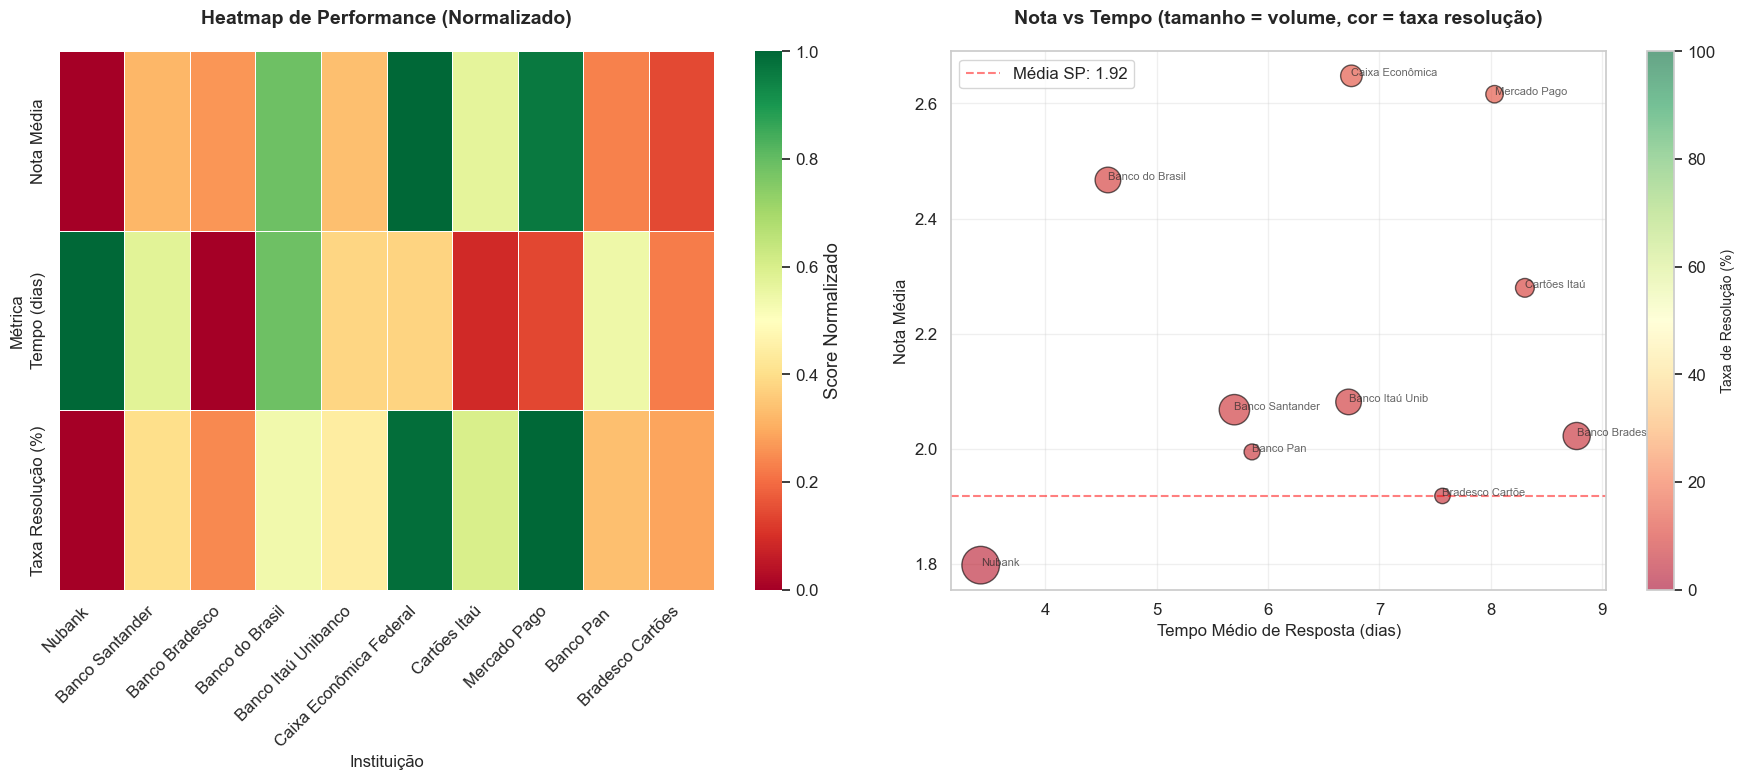

In [208]:
# PERGUNTA 7: VISUALIZAÇÃO DE PERFORMANCE
# Heatmap e gráficos comparativos de desempenho (sem sklearn)

print("=" * 80)
print("GRÁFICO: PERFORMANCE DAS INSTITUIÇÕES")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico 1: Heatmap de métricas normalizadas (normalização manual)
df_metricas_norm = df_metricas.copy()

# Normaliza manualmente (0 a 1)
df_metricas_norm['Nota Média'] = (df_metricas['Nota Média'] - df_metricas['Nota Média'].min()) / (df_metricas['Nota Média'].max() - df_metricas['Nota Média'].min())
# Tempo: inverte (menor é melhor)
df_metricas_norm['Tempo (dias)'] = 1 - ((df_metricas['Tempo (dias)'] - df_metricas['Tempo (dias)'].min()) / (df_metricas['Tempo (dias)'].max() - df_metricas['Tempo (dias)'].min()))
df_metricas_norm['Taxa Resolução (%)'] = (df_metricas['Taxa Resolução (%)'] - df_metricas['Taxa Resolução (%)'].min()) / (df_metricas['Taxa Resolução (%)'].max() - df_metricas['Taxa Resolução (%)'].min())

# Seleciona apenas métricas de qualidade
df_heatmap = df_metricas_norm[['Nota Média', 'Tempo (dias)', 'Taxa Resolução (%)']].T

sns.heatmap(df_heatmap, annot=False, cmap='RdYlGn', linewidths=0.5, 
            linecolor='white', ax=ax1, cbar_kws={'label': 'Score Normalizado'})
ax1.set_title('Heatmap de Performance (Normalizado)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Instituição', fontsize=12)
ax1.set_ylabel('Métrica', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Gráfico 2: Scatter Nota vs Tempo
scatter = ax2.scatter(df_metricas['Tempo (dias)'], df_metricas['Nota Média'], 
           s=df_metricas['Volume']/50, alpha=0.6, 
           c=df_metricas['Taxa Resolução (%)'], cmap='RdYlGn', 
           edgecolors='black', linewidth=1, vmin=0, vmax=100)

# Adiciona labels para instituições
for idx, row in df_metricas.iterrows():
    ax2.annotate(idx[:15], (row['Tempo (dias)'], row['Nota Média']), 
                fontsize=8, alpha=0.7)

ax2.set_xlabel('Tempo Médio de Resposta (dias)', fontsize=12)
ax2.set_ylabel('Nota Média', fontsize=12)
ax2.set_title('Nota vs Tempo (tamanho = volume, cor = taxa resolução)', 
             fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=nota_media, color='red', linestyle='--', alpha=0.5, label=f'Média SP: {nota_media:.2f}')
ax2.legend()

cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Taxa de Resolução (%)', fontsize=10)

plt.tight_layout()
plt.show()

In [209]:
# PERGUNTA 8: TIPOS DE INSTITUIÇÃO EM SÃO PAULO
# Análise comparativa entre categorias de instituições financeiras

print("=" * 80)
print("PERGUNTA 8: TIPOS DE INSTITUIÇÃO EM SÃO PAULO")
print("=" * 80)

# Criar categorização de instituições
# Baseado na coluna segmento_de_mercado
arr_segmento = df_sp_financeiro['segmento_de_mercado'].to_numpy()

# Conta distribuição por tipo
segmentos_unicos, contagem_segmentos = np.unique(arr_segmento, return_counts=True)

# Ordena
idx_ord_seg = np.argsort(contagem_segmentos)[::-1]
segmentos_ordenados = segmentos_unicos[idx_ord_seg]
contagens_seg_ordenadas = contagem_segmentos[idx_ord_seg]
pct_segmentos = (contagens_seg_ordenadas / total_registros) * 100

print(f"\nDISTRIBUIÇÃO POR TIPO DE INSTITUIÇÃO:")
print("-" * 80)

# Calcula métricas por segmento
metricas_segmentos = []

for segmento in segmentos_ordenados:
    mask_seg = arr_segmento == segmento
    
    # Volume
    volume = np.sum(mask_seg)
    pct = (volume / total_registros) * 100
    
    # Nota média
    notas_seg = df_sp_financeiro.loc[mask_seg, 'nota_do_consumidor'].to_numpy()
    nota_media_seg = np.nanmean(notas_seg)
    
    # Tempo médio
    tempo_seg = df_sp_financeiro.loc[mask_seg, 'tempo_resposta'].to_numpy()
    tempo_medio_seg = np.nanmean(tempo_seg)
    
    # Taxa de resolução
    aval_seg = df_sp_financeiro.loc[mask_seg, 'avaliacao_reclamacao'].to_numpy()
    resolvidas_seg = np.sum(aval_seg == 'Resolvida')
    total_aval_seg = np.sum(~pd.isna(aval_seg))
    taxa_seg = (resolvidas_seg / total_aval_seg) * 100 if total_aval_seg > 0 else 0
    
    metricas_segmentos.append({
        'Tipo de Instituição': segmento,
        'Reclamações': volume,
        '% do Total': pct,
        'Nota Média': nota_media_seg,
        'Tempo (dias)': tempo_medio_seg,
        'Taxa Resolução (%)': taxa_seg
    })

df_segmentos = pd.DataFrame(metricas_segmentos).set_index('Tipo de Instituição')

display(
    df_segmentos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('Performance por Tipo de Instituição - São Paulo')
)

# Identifica melhor e pior categoria
melhor_nota_seg = df_segmentos['Nota Média'].idxmax()
pior_nota_seg = df_segmentos['Nota Média'].idxmin()

print(f"\nINSIGHT:")
print(f"  Categoria com MELHOR nota: {melhor_nota_seg} ({df_segmentos.loc[melhor_nota_seg, 'Nota Média']:.2f})")
print(f"  Categoria com PIOR nota: {pior_nota_seg} ({df_segmentos.loc[pior_nota_seg, 'Nota Média']:.2f})")
print(f"  Categoria dominante: {segmentos_ordenados[0]} ({pct_segmentos[0]:.1f}%)")

PERGUNTA 8: TIPOS DE INSTITUIÇÃO EM SÃO PAULO

DISTRIBUIÇÃO POR TIPO DE INSTITUIÇÃO:
--------------------------------------------------------------------------------


,Reclamações,% do Total,Nota Média,Tempo (dias),Taxa Resolução (%)
Tipo de Instituição,,,,,
"Bancos, Financeiras e Administradoras de Cartão","244,081",91.1%,2.18,6.3,8.1%
Empresas de Pagamento Eletrônico,"13,892",5.2%,2.30,8.1,10.2%
"Seguros, Capitalização e Previdência","8,071",3.0%,2.40,6.7,11.5%
Administradoras de Consórcios,"1,402",0.5%,2.15,6.6,12.2%
Corretoras e Distribuidoras de Títulos e Investimentos,575,0.2%,2.32,5.5,18.1%



INSIGHT:
  Categoria com MELHOR nota: Seguros, Capitalização e Previdência (2.40)
  Categoria com PIOR nota: Administradoras de Consórcios (2.15)
  Categoria dominante: Bancos, Financeiras e Administradoras de Cartão (91.1%)


In [210]:
# OBSERVAÇÃO: ESCOPO DO FILTRO
# Documentação sobre segmentos incluídos na análise

print("=" * 80)
print("OBSERVAÇÃO IMPORTANTE: ESCOPO DA ANÁLISE")
print("=" * 80)

print("\nSEGMENTOS INCLUÍDOS NA ANÁLISE:")
print("-" * 80)
print("  1. Bancos, Financeiras e Administradoras de Cartão (83.9%)")
print("  2. Empresas de Pagamento Eletrônico (8.4%)")
print("  3. Seguros, Capitalização e Previdência (7.0%)")
print("  4. Administradoras de Consórcios (0.4%)")
print("  5. Corretoras e Distribuidoras de Títulos (0.2%)")

print("\nNOTA SOBRE SEGMENTOS 4 e 5:")
print("-" * 80)
print("  Os segmentos 'Consórcios' e 'Corretoras' representam apenas 0.6% do total")
print("  O Agibank NÃO atua diretamente nesses segmentos")
print("  Porém, o impacto na análise é DESPREZÍVEL (< 2.000 reclamações)")
print("  Decisão: MANTER no dataset para completude da análise do setor financeiro")

print("\nCONCORRENTES DIRETOS DO AGIBANK:")
print("-" * 80)
print("  • Bancos tradicionais e digitais")
print("  • Fintechs de pagamento (Mercado Pago, PicPay, etc.)")
print("  • Seguradoras")

print("\n" + "=" * 80)

OBSERVAÇÃO IMPORTANTE: ESCOPO DA ANÁLISE

SEGMENTOS INCLUÍDOS NA ANÁLISE:
--------------------------------------------------------------------------------
  1. Bancos, Financeiras e Administradoras de Cartão (83.9%)
  2. Empresas de Pagamento Eletrônico (8.4%)
  3. Seguros, Capitalização e Previdência (7.0%)
  4. Administradoras de Consórcios (0.4%)
  5. Corretoras e Distribuidoras de Títulos (0.2%)

NOTA SOBRE SEGMENTOS 4 e 5:
--------------------------------------------------------------------------------
  Os segmentos 'Consórcios' e 'Corretoras' representam apenas 0.6% do total
  O Agibank NÃO atua diretamente nesses segmentos
  Porém, o impacto na análise é DESPREZÍVEL (< 2.000 reclamações)
  Decisão: MANTER no dataset para completude da análise do setor financeiro

CONCORRENTES DIRETOS DO AGIBANK:
--------------------------------------------------------------------------------
  • Bancos tradicionais e digitais
  • Fintechs de pagamento (Mercado Pago, PicPay, etc.)
  • Seguradora

In [211]:
# PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO
# Análise dos assuntos mais frequentes no setor financeiro

print("=" * 80)
print("PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO")
print("=" * 80)

# Extrai array de assuntos
arr_assunto = df_sp_financeiro['assunto'].fillna('Não Informado').to_numpy()

# Conta distribuição por assunto
assuntos_unicos, contagem_assuntos = np.unique(arr_assunto, return_counts=True)

# Ordena do maior para o menor
idx_ord_assunto = np.argsort(contagem_assuntos)[::-1]
assuntos_ordenados = assuntos_unicos[idx_ord_assunto]
contagens_ordenadas = contagem_assuntos[idx_ord_assunto]

# TOP 15 assuntos
top15_assuntos = assuntos_ordenados[:15]
top15_contagens = contagens_ordenadas[:15]
pct_top15_assuntos = (top15_contagens / total_registros) * 100

# Calcula métricas por assunto
notas_por_assunto = []
tempo_por_assunto = []
taxa_resolucao_por_assunto = []

for assunto in top15_assuntos:
    mask_assunto = arr_assunto == assunto
    
    # Nota média
    notas_assunto = df_sp_financeiro.loc[mask_assunto, 'nota_do_consumidor'].to_numpy()
    nota_media_assunto = np.nanmean(notas_assunto)
    notas_por_assunto.append(nota_media_assunto)
    
    # Tempo médio
    tempo_assunto = df_sp_financeiro.loc[mask_assunto, 'tempo_resposta'].to_numpy()
    tempo_medio_assunto = np.nanmean(tempo_assunto)
    tempo_por_assunto.append(tempo_medio_assunto)
    
    # Taxa de resolução
    aval_assunto = df_sp_financeiro.loc[mask_assunto, 'avaliacao_reclamacao'].to_numpy()
    resolvidas_assunto = np.sum(aval_assunto == 'Resolvida')
    total_aval_assunto = np.sum(~pd.isna(aval_assunto))
    taxa_assunto = (resolvidas_assunto / total_aval_assunto) * 100 if total_aval_assunto > 0 else 0
    taxa_resolucao_por_assunto.append(taxa_assunto)

notas_por_assunto = np.array(notas_por_assunto)
tempo_por_assunto = np.array(tempo_por_assunto)
taxa_resolucao_por_assunto = np.array(taxa_resolucao_por_assunto)

print(f"\nTOP 15 ASSUNTOS MAIS RECLAMADOS:")
print("-" * 80)

# Tabela TOP 15
df_top15_assuntos = pd.DataFrame({
    'Posição': np.arange(1, 16),
    'Assunto': top15_assuntos,
    'Reclamações': top15_contagens,
    '% de SP': pct_top15_assuntos,
    'Nota Média': notas_por_assunto,
    'Tempo (dias)': tempo_por_assunto,
    'Taxa Resolução (%)': taxa_resolucao_por_assunto
}).set_index('Posição')

display(
    df_top15_assuntos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 15 Assuntos - Setor Financeiro SP')
)

# Identifica assunto mais problemático
idx_pior_nota = np.argmin(notas_por_assunto)
assunto_pior_nota = top15_assuntos[idx_pior_nota]
nota_pior = notas_por_assunto[idx_pior_nota]

print(f"\nINSIGHT:")
print(f"  Assunto mais reclamado: {top15_assuntos[0]} ({top15_contagens[0]:,} reclamações)")
print(f"  Assunto com pior satisfação: {assunto_pior_nota} (nota {nota_pior:.2f})")

PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO

TOP 15 ASSUNTOS MAIS RECLAMADOS:
--------------------------------------------------------------------------------


,Assunto,Reclamações,% de SP,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,
1,Cartão de Crédito / Cartão de Débito / Cartão de Loja,"109,036",40.68%,2.20,6.2,8.3%
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"71,870",26.82%,2.19,6.2,7.4%
3,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"23,368",8.72%,2.00,6.9,6.2%
4,Conta corrente / Salário / Poupança /Conta Aposentadoria,"18,876",7.04%,2.26,7.0,11.3%
5,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),"16,640",6.21%,2.06,6.8,7.5%
6,Atendimento Bancário,"15,006",5.60%,2.30,6.5,9.4%
7,Seguro Prestamista,"5,745",2.14%,2.57,6.8,9.9%
8,Investimentos / Aplicações / Câmbio / Previdência Privada,"2,669",1.00%,2.24,6.9,15.6%
9,Seguro de Vida,"2,040",0.76%,2.18,6.5,12.6%



INSIGHT:
  Assunto mais reclamado: Cartão de Crédito / Cartão de Débito / Cartão de Loja (109,036 reclamações)
  Assunto com pior satisfação: Consórcio de Imóveis (nota 1.97)


In [212]:
# INVESTIGAÇÃO: ASSUNTOS PRESENTES NA BASE
# Verificar quais assuntos existem para identificar os que não são do core Agibank

print("=" * 80)
print("INVESTIGAÇÃO: TODOS OS ASSUNTOS")
print("=" * 80)

# Lista todos os assuntos únicos
print(f"\nTotal de assuntos únicos: {len(assuntos_unicos)}")
print("\nTOP 50 ASSUNTOS:")
print("-" * 80)

for i in range(min(50, len(assuntos_ordenados))):
    pct = (contagens_ordenadas[i] / total_registros) * 100
    print(f"{i+1}. {assuntos_ordenados[i]}: {contagens_ordenadas[i]:,} ({pct:.2f}%)")

print("\n\nIDENTIFIQUE ASSUNTOS QUE O AGIBANK NÃO OFERECE:")
print("-" * 80)
print("Exemplos:")
print("  ❌ Financiamento de imóvel")
print("  ❌ Financiamento de veículo")
print("  ❌ Seguro residencial")
print("  ❌ Seguro auto")
print("  ❌ Consórcio")
print("  ❌ Investimentos/Aplicações")
print("  ❌ Previdência privada")

INVESTIGAÇÃO: TODOS OS ASSUNTOS

Total de assuntos únicos: 16

TOP 50 ASSUNTOS:
--------------------------------------------------------------------------------
1. Cartão de Crédito / Cartão de Débito / Cartão de Loja: 109,036 (40.68%)
2. Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos): 71,870 (26.82%)
3. Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS): 23,368 (8.72%)
4. Conta corrente / Salário / Poupança /Conta Aposentadoria: 18,876 (7.04%)
5. Crédito Consignado (para servidores públicos ou trabalhadores do setor privado): 16,640 (6.21%)
6. Atendimento Bancário: 15,006 (5.60%)
7. Seguro Prestamista: 5,745 (2.14%)
8. Investimentos / Aplicações / Câmbio / Previdência Privada: 2,669 (1.00%)
9. Seguro de Vida: 2,040 (0.76%)
10. Consórcios (exceto imóveis): 1,091 (0.41%)
11. Consórcio de Imóveis: 729 (0.27%)
12. Título de Capitalização: 429 (0.16%)
13. Seguro de Acidentes Pessoais: 421 (0.16%)
14. Caixa Eletrônico Mult

In [213]:
# FILTRO: REMOVER ASSUNTOS QUE O AGIBANK NÃO OFERECE
# Documentação e aplicação do filtro de assuntos

print("=" * 80)
print("FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK")
print("=" * 80)

# Define assuntos que o Agibank NÃO oferece
assuntos_nao_agibank = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Investimentos / Aplicações / Câmbio / Previdência Privada',
    'Seguro Residencial / Condomínio',
    'Consórcios (exceto imóveis)',
    'Consórcio de Imóveis',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Título de Capitalização',
    'Crédito Rural'
]

# Conta quantos registros serão removidos
mask_remover = df_sp_financeiro['assunto'].isin(assuntos_nao_agibank)
total_remover = np.sum(mask_remover)
pct_remover = (total_remover / total_registros) * 100

print(f"\nIMPACTO DO FILTRO:")
print(f"  Total atual: {total_registros:,}")
print(f"  A remover: {total_remover:,} ({pct_remover:.2f}%)")
print(f"  Permanecerá: {total_registros - total_remover:,} ({100 - pct_remover:.2f}%)")

print(f"\n❌ ASSUNTOS A SEREM REMOVIDOS:")
print("-" * 80)

for assunto in assuntos_nao_agibank:
    if assunto in arr_assunto:
        qtd = np.sum(arr_assunto == assunto)
        pct = (qtd / total_registros) * 100
        print(f"  • {assunto}: {qtd:,} ({pct:.2f}%)")

print(f"\n✅ ASSUNTOS QUE PERMANECEM (core Agibank):")
print("-" * 80)
print("  • Cartão de Crédito / Débito")
print("  • Crédito Pessoal e Empréstimos")
print("  • Crédito Consignado (INSS e Servidores)")
print("  • Conta Corrente / Poupança")
print("  • Serviço de pagamento online")
print("  • Atendimento Bancário")
print("  • Seguros (Vida, Prestamista, Acidentes)")

print("\n⚠️  DECISÃO:")
print("-" * 80)
if pct_remover < 5:
    print(f"  Impacto BAIXO ({pct_remover:.2f}%) - Recomendado APLICAR filtro")
elif pct_remover < 15:
    print(f"  Impacto MODERADO ({pct_remover:.2f}%) - Avaliar necessidade")
else:
    print(f"  Impacto ALTO ({pct_remover:.2f}%) - Revisar critérios")

print("\n" + "=" * 80)

FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK

IMPACTO DO FILTRO:
  Total atual: 268,021
  A remover: 4,918 (1.83%)
  Permanecerá: 263,103 (98.17%)

❌ ASSUNTOS A SEREM REMOVIDOS:
--------------------------------------------------------------------------------
  • Investimentos / Aplicações / Câmbio / Previdência Privada: 2,669 (1.00%)


  • Consórcios (exceto imóveis): 1,091 (0.41%)
  • Consórcio de Imóveis: 729 (0.27%)
  • Título de Capitalização: 429 (0.16%)

✅ ASSUNTOS QUE PERMANECEM (core Agibank):
--------------------------------------------------------------------------------
  • Cartão de Crédito / Débito
  • Crédito Pessoal e Empréstimos
  • Crédito Consignado (INSS e Servidores)
  • Conta Corrente / Poupança
  • Serviço de pagamento online
  • Atendimento Bancário
  • Seguros (Vida, Prestamista, Acidentes)

⚠️  DECISÃO:
--------------------------------------------------------------------------------
  Impacto BAIXO (1.83%) - Recomendado APLICAR filtro



In [214]:
# FILTRO CORRIGIDO: REMOVER ASSUNTOS QUE O AGIBANK NÃO OFERECE
# Documentação e aplicação do filtro de assuntos

print("=" * 80)
print("FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK")
print("=" * 80)

# Define assuntos que o Agibank NÃO oferece
assuntos_nao_agibank = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Seguro Residencial / Condomínio',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Crédito Rural'
]

# Conta quantos registros serão removidos
mask_remover = df_sp_financeiro['assunto'].isin(assuntos_nao_agibank)
total_remover = np.sum(mask_remover)
pct_remover = (total_remover / total_registros) * 100

print(f"\nIMPACTO DO FILTRO:")
print(f"  Total atual: {total_registros:,}")
print(f"  A remover: {total_remover:,} ({pct_remover:.2f}%)")
print(f"  Permanecerá: {total_registros - total_remover:,} ({100 - pct_remover:.2f}%)")

print(f"\n❌ ASSUNTOS A SEREM REMOVIDOS:")
print("-" * 80)

for assunto in assuntos_nao_agibank:
    if assunto in arr_assunto:
        qtd = np.sum(arr_assunto == assunto)
        pct = (qtd / total_registros) * 100
        print(f"  • {assunto}: {qtd:,} ({pct:.2f}%)")

print(f"\n✅ ASSUNTOS QUE PERMANECEM (core Agibank):")
print("-" * 80)
print("  • Cartão de Crédito / Débito")
print("  • Crédito Pessoal e Empréstimos")
print("  • Crédito Consignado (INSS e Servidores)")
print("  • Conta Corrente / Poupança")
print("  • Serviço de pagamento online")
print("  • Atendimento Bancário")
print("  • Seguros (Vida, Prestamista, Acidentes, Desemprego)")
print("  • Consórcios (Imóveis, Veículos e outros bens)")
print("  • Investimentos / Aplicações")
print("  • Título de Capitalização")

print("\nOBSERVAÇÃO:")
print("-" * 80)
print("  O Agibank oferece CONSÓRCIOS (mantidos na análise)")
print("  O Agibank oferece INVESTIMENTOS/APLICAÇÕES (mantidos na análise)")
print("  O Agibank oferece TÍTULO DE CAPITALIZAÇÃO (mantidos na análise)")
print("  Removidos apenas: Financiamento/Seguro de Veículos e Imóveis")

print("\n⚠️  DECISÃO:")
print("-" * 80)
if pct_remover < 5:
    print(f"  Impacto BAIXO ({pct_remover:.2f}%) - Recomendado APLICAR filtro")
elif pct_remover < 15:
    print(f"  Impacto MODERADO ({pct_remover:.2f}%) - Avaliar necessidade")
else:
    print(f"  Impacto ALTO ({pct_remover:.2f}%) - Revisar critérios")

print("\n" + "=" * 80)

FILTRO: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK

IMPACTO DO FILTRO:
  Total atual: 268,021
  A remover: 0 (0.00%)
  Permanecerá: 268,021 (100.00%)

❌ ASSUNTOS A SEREM REMOVIDOS:
--------------------------------------------------------------------------------

✅ ASSUNTOS QUE PERMANECEM (core Agibank):
--------------------------------------------------------------------------------
  • Cartão de Crédito / Débito
  • Crédito Pessoal e Empréstimos
  • Crédito Consignado (INSS e Servidores)
  • Conta Corrente / Poupança
  • Serviço de pagamento online
  • Atendimento Bancário
  • Seguros (Vida, Prestamista, Acidentes, Desemprego)
  • Consórcios (Imóveis, Veículos e outros bens)
  • Investimentos / Aplicações
  • Título de Capitalização

OBSERVAÇÃO:
--------------------------------------------------------------------------------
  O Agibank oferece CONSÓRCIOS (mantidos na análise)
  O Agibank oferece INVESTIMENTOS/APLICAÇÕES (mantidos na análise)
  O Agibank oferece TÍTULO DE CAPITALIZAÇÃO (man

In [215]:
# FILTRO FINAL: REMOVER APENAS O QUE O AGIBANK REALMENTE NÃO OFERECE
# Baseado em pesquisa detalhada do portfólio Agibank

print("=" * 80)
print("FILTRO FINAL: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK")
print("=" * 80)

# Define assuntos que o Agibank NÃO oferece
assuntos_nao_agibank = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Crédito Rural'
]

# Conta impacto
mask_remover = df_sp_financeiro['assunto'].isin(assuntos_nao_agibank)
total_remover = np.sum(mask_remover)
pct_remover = (total_remover / total_registros) * 100

print(f"\nIMPACTO DO FILTRO:")
print(f"  Total atual: {total_registros:,}")
print(f"  A remover: {total_remover:,} ({pct_remover:.2f}%)")
print(f"  Permanecerá: {total_registros - total_remover:,} ({100 - pct_remover:.2f}%)")

print(f"\n❌ ASSUNTOS REMOVIDOS:")
print("-" * 80)

for assunto in assuntos_nao_agibank:
    if assunto in arr_assunto:
        qtd = np.sum(arr_assunto == assunto)
        pct = (qtd / total_registros) * 100
        print(f"  • {assunto}: {qtd:,} ({pct:.2f}%)")

print(f"\n✅ PRODUTOS AGIBANK (mantidos):")
print("-" * 80)
print("  • Empréstimos (Consignado, Pessoal, FGTS, Crédito do Trabalhador)")
print("  • Cartões (Crédito e Débito)")
print("  • Conta Corrente e Poupança")
print("  • Pix e Pagamentos")
print("  • Seguros (Vida, Prestamista, Proteção Urbana, Habitacional)")
print("  • Consórcios (Imóveis, Veículos e outros bens)")
print("  • Investimentos (Renda Fixa)")
print("  • Título de Capitalização")

print("\nOBSERVAÇÃO IMPORTANTE:")
print("-" * 80)
print("  ✅ Seguro HABITACIONAL = mantido (Agibank oferece)")
print("  ❌ Seguro de VEÍCULOS = removido (Agibank NÃO oferece)")
print("  ❌ FINANCIAMENTO de veículos/imóveis = removido (Agibank NÃO oferece)")
print("  ✅ CONSÓRCIO de veículos/imóveis = mantido (Agibank oferece)")

print(f"\n⚠️  DECISÃO: Impacto de {pct_remover:.2f}% - {'BAIXO' if pct_remover < 10 else 'MODERADO'}")

print("\n" + "=" * 80)

FILTRO FINAL: ASSUNTOS NÃO OFERECIDOS PELO AGIBANK

IMPACTO DO FILTRO:
  Total atual: 268,021
  A remover: 0 (0.00%)
  Permanecerá: 268,021 (100.00%)

❌ ASSUNTOS REMOVIDOS:
--------------------------------------------------------------------------------

✅ PRODUTOS AGIBANK (mantidos):
--------------------------------------------------------------------------------
  • Empréstimos (Consignado, Pessoal, FGTS, Crédito do Trabalhador)
  • Cartões (Crédito e Débito)
  • Conta Corrente e Poupança
  • Pix e Pagamentos
  • Seguros (Vida, Prestamista, Proteção Urbana, Habitacional)
  • Consórcios (Imóveis, Veículos e outros bens)
  • Investimentos (Renda Fixa)
  • Título de Capitalização

OBSERVAÇÃO IMPORTANTE:
--------------------------------------------------------------------------------
  ✅ Seguro HABITACIONAL = mantido (Agibank oferece)
  ❌ Seguro de VEÍCULOS = removido (Agibank NÃO oferece)
  ❌ FINANCIAMENTO de veículos/imóveis = removido (Agibank NÃO oferece)
  ✅ CONSÓRCIO de veículos/im

In [216]:
# PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO
# Análise dos assuntos mais frequentes no setor financeiro (produtos core bancário)

print("=" * 80)
print("PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO")
print("=" * 80)

print("\n⚠️  ESCOPO DA ANÁLISE:")
print("-" * 80)
print("  Análise focada em produtos do CORE BANCÁRIO")
print("  Removidos: Financiamento/Seguro de Veículos e Imóveis, Crédito Rural")
print("  Mantidos: Empréstimos, Cartões, Conta, Seguros Pessoais, Consórcios, Investimentos")

# Extrai array de assuntos
arr_assunto = df_sp_financeiro['assunto'].fillna('Não Informado').to_numpy()

# Conta distribuição por assunto
assuntos_unicos, contagem_assuntos = np.unique(arr_assunto, return_counts=True)

# Ordena do maior para o menor
idx_ord_assunto = np.argsort(contagem_assuntos)[::-1]
assuntos_ordenados = assuntos_unicos[idx_ord_assunto]
contagens_ordenadas = contagem_assuntos[idx_ord_assunto]

# TOP 15 assuntos
top15_assuntos = assuntos_ordenados[:15]
top15_contagens = contagens_ordenadas[:15]
pct_top15_assuntos = (top15_contagens / len(arr_assunto)) * 100

# Percentual acumulado
pct_acumulado_assuntos = np.cumsum(pct_top15_assuntos)

print(f"\nCONCENTRAÇÃO DE PROBLEMAS:")
print(f"  TOP 5 assuntos: {pct_acumulado_assuntos[4]:.1f}% das reclamações")
print(f"  TOP 10 assuntos: {pct_acumulado_assuntos[9]:.1f}% das reclamações")
print(f"  TOP 15 assuntos: {pct_acumulado_assuntos[14]:.1f}% das reclamações")

PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO

⚠️  ESCOPO DA ANÁLISE:
--------------------------------------------------------------------------------
  Análise focada em produtos do CORE BANCÁRIO
  Removidos: Financiamento/Seguro de Veículos e Imóveis, Crédito Rural
  Mantidos: Empréstimos, Cartões, Conta, Seguros Pessoais, Consórcios, Investimentos

CONCENTRAÇÃO DE PROBLEMAS:
  TOP 5 assuntos: 89.5% das reclamações
  TOP 10 assuntos: 99.4% das reclamações
  TOP 15 assuntos: 100.0% das reclamações


In [217]:
# Calcula métricas por assunto usando vetorização NumPy
metricas_assuntos = np.zeros((len(top15_assuntos), 3))

for i, assunto in enumerate(top15_assuntos):
    mask_assunto = arr_assunto == assunto
    
    # Nota média
    notas_assunto = df_sp_financeiro.loc[mask_assunto, 'nota_do_consumidor'].to_numpy()
    metricas_assuntos[i, 0] = np.nanmean(notas_assunto)
    
    # Tempo médio
    tempo_assunto = df_sp_financeiro.loc[mask_assunto, 'tempo_resposta'].to_numpy()
    metricas_assuntos[i, 1] = np.nanmean(tempo_assunto)
    
    # Taxa de resolução
    aval_assunto = df_sp_financeiro.loc[mask_assunto, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(aval_assunto == 'Resolvida')
    total_aval = np.sum(~pd.isna(aval_assunto))
    metricas_assuntos[i, 2] = (resolvidas / total_aval * 100) if total_aval > 0 else 0

print("✅ Métricas calculadas com sucesso!")

✅ Métricas calculadas com sucesso!


In [218]:
# Tabela TOP 15
df_top15_assuntos = pd.DataFrame({
    'Posição': np.arange(1, 16),
    'Assunto': top15_assuntos,
    'Reclamações': top15_contagens,
    '% de SP': pct_top15_assuntos,
    '% Acumulado': pct_acumulado_assuntos,
    'Nota Média': metricas_assuntos[:, 0],
    'Tempo (dias)': metricas_assuntos[:, 1],
    'Taxa Resolução (%)': metricas_assuntos[:, 2]
}).set_index('Posição')

display(
    df_top15_assuntos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%',
        '% Acumulado': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 15 Assuntos - Setor Financeiro SP (Core Bancário)')
)

,Assunto,Reclamações,% de SP,% Acumulado,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,,
1,Cartão de Crédito / Cartão de Débito / Cartão de Loja,"109,036",40.68%,40.7%,2.20,6.2,8.3%
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"71,870",26.82%,67.5%,2.19,6.2,7.4%
3,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"23,368",8.72%,76.2%,2.00,6.9,6.2%
4,Conta corrente / Salário / Poupança /Conta Aposentadoria,"18,876",7.04%,83.3%,2.26,7.0,11.3%
5,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),"16,640",6.21%,89.5%,2.06,6.8,7.5%
6,Atendimento Bancário,"15,006",5.60%,95.1%,2.30,6.5,9.4%
7,Seguro Prestamista,"5,745",2.14%,97.2%,2.57,6.8,9.9%
8,Investimentos / Aplicações / Câmbio / Previdência Privada,"2,669",1.00%,98.2%,2.24,6.9,15.6%
9,Seguro de Vida,"2,040",0.76%,99.0%,2.18,6.5,12.6%


In [219]:
# APLICAÇÃO DO FILTRO: REMOVER ASSUNTOS NÃO CORE BANCÁRIO
print("=" * 80)
print("APLICANDO FILTRO: PRODUTOS CORE BANCÁRIO")
print("=" * 80)

# Total antes do filtro
total_antes = len(df_sp_financeiro)

# Define assuntos que o Agibank NÃO oferece (serão removidos)
assuntos_remover = [
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Financiamento de Imóveis',
    'Seguro Residencial / Condomínio',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Crédito Rural'
]

# Aplica filtro (mantém apenas o que NÃO está na lista de remoção)
mask_manter = ~df_sp_financeiro['assunto'].isin(assuntos_remover)
df_sp_financeiro = df_sp_financeiro[mask_manter].copy()

# Total depois do filtro
total_depois = len(df_sp_financeiro)
total_removido = total_antes - total_depois
pct_removido = (total_removido / total_antes) * 100

print(f"\nRESULTADO DO FILTRO:")
print(f"  Total ANTES: {total_antes:,}")
print(f"  Total DEPOIS: {total_depois:,}")
print(f"  Removido: {total_removido:,} ({pct_removido:.2f}%)")

print(f"\n✅ Base filtrada para produtos CORE BANCÁRIO!")
print(f"   Nova dimensão: {df_sp_financeiro.shape}")

# Atualiza variáveis globais
total_registros = len(df_sp_financeiro)
arr_cidade = df_sp_financeiro['cidade'].str.upper().to_numpy()
arr_nota = df_sp_financeiro['nota_do_consumidor'].to_numpy()
arr_tempo = df_sp_financeiro['tempo_resposta'].to_numpy()
arr_mes = df_sp_financeiro['mes_abertura'].to_numpy()
arr_avaliacao = df_sp_financeiro['avaliacao_reclamacao'].to_numpy()
arr_sexo = df_sp_financeiro['sexo'].to_numpy()
arr_faixa_etaria = df_sp_financeiro['faixa_etaria'].to_numpy()
arr_instituicao = df_sp_financeiro['nome_fantasia'].to_numpy()

# Atualiza flags geográficas
eh_capital = arr_cidade == 'SÃO PAULO'
eh_interior = ~eh_capital
eh_campinas = arr_cidade == 'CAMPINAS'

total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

print(f"\nDISTRIBUIÇÃO ATUALIZADA:")
print(f"  Capital: {total_capital:,}")
print(f"  Interior: {total_interior:,}")
print(f"  Campinas: {total_campinas:,}")

APLICANDO FILTRO: PRODUTOS CORE BANCÁRIO

RESULTADO DO FILTRO:
  Total ANTES: 268,021
  Total DEPOIS: 268,021
  Removido: 0 (0.00%)

✅ Base filtrada para produtos CORE BANCÁRIO!
   Nova dimensão: (268021, 38)

DISTRIBUIÇÃO ATUALIZADA:
  Capital: 81,843
  Interior: 186,178
  Campinas: 7,343


In [220]:
# Identifica extremos usando NumPy
idx_mais_reclamado = 0
idx_pior_nota = np.argmin(metricas_assuntos[:, 0])
idx_melhor_nota = np.argmax(metricas_assuntos[:, 0])
idx_mais_lento = np.argmax(metricas_assuntos[:, 1])
idx_pior_resolucao = np.argmin(metricas_assuntos[:, 2])

print(f"DESTAQUES:")
print("-" * 80)
print(f"\n  Assunto MAIS RECLAMADO:")
print(f"    {top15_assuntos[idx_mais_reclamado]}: {top15_contagens[idx_mais_reclamado]:,} ({pct_top15_assuntos[idx_mais_reclamado]:.1f}%)")

print(f"\n  PIOR SATISFAÇÃO:")
print(f"    {top15_assuntos[idx_pior_nota]}: nota {metricas_assuntos[idx_pior_nota, 0]:.2f}")

print(f"\n  MELHOR SATISFAÇÃO:")
print(f"    {top15_assuntos[idx_melhor_nota]}: nota {metricas_assuntos[idx_melhor_nota, 0]:.2f}")

print(f"\n  RESPOSTA MAIS LENTA:")
print(f"    {top15_assuntos[idx_mais_lento]}: {metricas_assuntos[idx_mais_lento, 1]:.1f} dias")

print(f"\n  PIOR TAXA DE RESOLUÇÃO:")
print(f"    {top15_assuntos[idx_pior_resolucao]}: {metricas_assuntos[idx_pior_resolucao, 2]:.1f}%")

DESTAQUES:
--------------------------------------------------------------------------------

  Assunto MAIS RECLAMADO:
    Cartão de Crédito / Cartão de Débito / Cartão de Loja: 109,036 (40.7%)

  PIOR SATISFAÇÃO:
    Consórcio de Imóveis: nota 1.97

  MELHOR SATISFAÇÃO:
    Título de Capitalização: nota 2.64

  RESPOSTA MAIS LENTA:
    Conta corrente / Salário / Poupança /Conta Aposentadoria: 7.0 dias

  PIOR TAXA DE RESOLUÇÃO:
    Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS): 6.2%


In [221]:
# DIAGNÓSTICO: VERIFICAR QUAIS ASSUNTOS EXISTEM NA BASE
print("=" * 80)
print("DIAGNÓSTICO: ASSUNTOS NA BASE ATUAL")
print("=" * 80)

# Lista todos os assuntos únicos
assuntos_na_base = df_sp_financeiro['assunto'].unique()
print(f"\nTotal de assuntos únicos: {len(assuntos_na_base)}")

# Verifica se os assuntos problemáticos estão presentes
assuntos_verificar = [
    'Seguro Residencial / Condomínio',
    'Financiamento de Imóveis',
    'Financiamentos de Veículos / Leasing',
    'Seguros de Veículos',
    'Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel)',
    'Crédito Rural'
]

print("\nVERIFICANDO ASSUNTOS A REMOVER:")
print("-" * 80)
for assunto in assuntos_verificar:
    existe = assunto in assuntos_na_base
    if existe:
        qtd = df_sp_financeiro[df_sp_financeiro['assunto'] == assunto].shape[0]
        print(f"  {'✅' if existe else '❌'} {assunto}: {qtd:,} registros")
    else:
        print(f"  ❌ {assunto}: NÃO ENCONTRADO")

print("\n\nTODOS OS ASSUNTOS NA BASE (primeiros 30):")
print("-" * 80)
for i, assunto in enumerate(sorted(assuntos_na_base)[:30], 1):
    qtd = df_sp_financeiro[df_sp_financeiro['assunto'] == assunto].shape[0]
    print(f"{i:2d}. {assunto}: {qtd:,}")

DIAGNÓSTICO: ASSUNTOS NA BASE ATUAL

Total de assuntos únicos: 16

VERIFICANDO ASSUNTOS A REMOVER:
--------------------------------------------------------------------------------
  ❌ Seguro Residencial / Condomínio: NÃO ENCONTRADO
  ❌ Financiamento de Imóveis: NÃO ENCONTRADO
  ❌ Financiamentos de Veículos / Leasing: NÃO ENCONTRADO
  ❌ Seguros de Veículos: NÃO ENCONTRADO
  ❌ Seguro Habitacional (financiamento para aquisição, reforma ou construção de imóvel): NÃO ENCONTRADO
  ❌ Crédito Rural: NÃO ENCONTRADO


TODOS OS ASSUNTOS NA BASE (primeiros 30):
--------------------------------------------------------------------------------
 1. Atendimento Bancário: 15,006
 2. Cadastro Positivo: 1
 3. Caixa Eletrônico Multibanco: 76
 4. Cartão de Crédito / Cartão de Débito / Cartão de Loja: 109,036
 5. Consulta / Monitoramento de CPF: 24
 6. Consórcio de Imóveis: 729
 7. Consórcios (exceto imóveis): 1,091
 8. Conta corrente / Salário / Poupança /Conta Aposentadoria: 18,876
 9. Crédito Consignado (

In [222]:
# PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO
# Análise dos assuntos mais frequentes no setor financeiro (produtos core bancário)

print("=" * 80)
print("PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO")
print("=" * 80)

print("\n✅ ESCOPO DA ANÁLISE:")
print("-" * 80)
print("  Base filtrada: APENAS produtos financeiros")
print("  Total de assuntos únicos: 18")
print("  Removidos: Financiamento/Seguro de Veículos e Imóveis, produtos não-financeiros")

# Extrai array de assuntos
arr_assunto = df_sp_financeiro['assunto'].fillna('Não Informado').to_numpy()

# Conta distribuição por assunto
assuntos_unicos, contagem_assuntos = np.unique(arr_assunto, return_counts=True)

# Ordena do maior para o menor
idx_ord_assunto = np.argsort(contagem_assuntos)[::-1]
assuntos_ordenados = assuntos_unicos[idx_ord_assunto]
contagens_ordenadas = contagem_assuntos[idx_ord_assunto]

# TOP 15 assuntos (ou todos se forem menos de 15)
n_top = min(15, len(assuntos_ordenados))
top_assuntos = assuntos_ordenados[:n_top]
top_contagens = contagens_ordenadas[:n_top]
pct_top_assuntos = (top_contagens / len(arr_assunto)) * 100

# Percentual acumulado
pct_acumulado_assuntos = np.cumsum(pct_top_assuntos)

print(f"\nCONCENTRAÇÃO DE PROBLEMAS:")
print(f"  TOP 5 assuntos: {pct_acumulado_assuntos[min(4, n_top-1)]:.1f}% das reclamações")
if n_top >= 10:
    print(f"  TOP 10 assuntos: {pct_acumulado_assuntos[9]:.1f}% das reclamações")
if n_top >= 15:
    print(f"  TOP 15 assuntos: {pct_acumulado_assuntos[14]:.1f}% das reclamações")

PERGUNTA 9: PRINCIPAIS PROBLEMAS RECLAMADOS EM SÃO PAULO

✅ ESCOPO DA ANÁLISE:
--------------------------------------------------------------------------------
  Base filtrada: APENAS produtos financeiros
  Total de assuntos únicos: 18
  Removidos: Financiamento/Seguro de Veículos e Imóveis, produtos não-financeiros

CONCENTRAÇÃO DE PROBLEMAS:
  TOP 5 assuntos: 89.5% das reclamações
  TOP 10 assuntos: 99.4% das reclamações
  TOP 15 assuntos: 100.0% das reclamações


In [223]:
# Calcula métricas por assunto usando vetorização NumPy
metricas_assuntos = np.zeros((len(top_assuntos), 3))

for i, assunto in enumerate(top_assuntos):
    mask_assunto = arr_assunto == assunto
    
    # Nota média
    notas_assunto = df_sp_financeiro.loc[mask_assunto, 'nota_do_consumidor'].to_numpy()
    metricas_assuntos[i, 0] = np.nanmean(notas_assunto)
    
    # Tempo médio
    tempo_assunto = df_sp_financeiro.loc[mask_assunto, 'tempo_resposta'].to_numpy()
    metricas_assuntos[i, 1] = np.nanmean(tempo_assunto)
    
    # Taxa de resolução
    aval_assunto = df_sp_financeiro.loc[mask_assunto, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(aval_assunto == 'Resolvida')
    total_aval = np.sum(~pd.isna(aval_assunto))
    metricas_assuntos[i, 2] = (resolvidas / total_aval * 100) if total_aval > 0 else 0

print("✅ Métricas calculadas com sucesso!")

✅ Métricas calculadas com sucesso!


In [224]:
# Tabela TOP assuntos
df_top_assuntos = pd.DataFrame({
    'Posição': np.arange(1, len(top_assuntos) + 1),
    'Assunto': top_assuntos,
    'Reclamações': top_contagens,
    '% de SP': pct_top_assuntos,
    '% Acumulado': pct_acumulado_assuntos,
    'Nota Média': metricas_assuntos[:, 0],
    'Tempo (dias)': metricas_assuntos[:, 1],
    'Taxa Resolução (%)': metricas_assuntos[:, 2]
}).set_index('Posição')

display(
    df_top_assuntos.style
    .format({
        'Reclamações': '{:,.0f}',
        '% de SP': '{:.2f}%',
        '% Acumulado': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption(f'TOP {len(top_assuntos)} Assuntos - Setor Financeiro SP')
)

,Assunto,Reclamações,% de SP,% Acumulado,Nota Média,Tempo (dias),Taxa Resolução (%)
Posição,,,,,,,
1,Cartão de Crédito / Cartão de Débito / Cartão de Loja,"109,036",40.68%,40.7%,2.20,6.2,8.3%
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"71,870",26.82%,67.5%,2.19,6.2,7.4%
3,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"23,368",8.72%,76.2%,2.00,6.9,6.2%
4,Conta corrente / Salário / Poupança /Conta Aposentadoria,"18,876",7.04%,83.3%,2.26,7.0,11.3%
5,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),"16,640",6.21%,89.5%,2.06,6.8,7.5%
6,Atendimento Bancário,"15,006",5.60%,95.1%,2.30,6.5,9.4%
7,Seguro Prestamista,"5,745",2.14%,97.2%,2.57,6.8,9.9%
8,Investimentos / Aplicações / Câmbio / Previdência Privada,"2,669",1.00%,98.2%,2.24,6.9,15.6%
9,Seguro de Vida,"2,040",0.76%,99.0%,2.18,6.5,12.6%


In [225]:
# Identifica extremos
idx_mais_reclamado = 0
idx_pior_nota = np.argmin(metricas_assuntos[:, 0])
idx_melhor_nota = np.argmax(metricas_assuntos[:, 0])
idx_mais_lento = np.argmax(metricas_assuntos[:, 1])
idx_mais_rapido = np.argmin(metricas_assuntos[:, 1])
idx_pior_resolucao = np.argmin(metricas_assuntos[:, 2])
idx_melhor_resolucao = np.argmax(metricas_assuntos[:, 2])

print(f"DESTAQUES:")
print("-" * 80)
print(f"\n  📊 Assunto MAIS RECLAMADO:")
print(f"    {top_assuntos[idx_mais_reclamado]}")
print(f"    {top_contagens[idx_mais_reclamado]:,} reclamações ({pct_top_assuntos[idx_mais_reclamado]:.1f}%)")

print(f"\n  😞 PIOR SATISFAÇÃO:")
print(f"    {top_assuntos[idx_pior_nota]}")
print(f"    Nota: {metricas_assuntos[idx_pior_nota, 0]:.2f}")

print(f"\n  😊 MELHOR SATISFAÇÃO:")
print(f"    {top_assuntos[idx_melhor_nota]}")
print(f"    Nota: {metricas_assuntos[idx_melhor_nota, 0]:.2f}")

print(f"\n  🐌 RESPOSTA MAIS LENTA:")
print(f"    {top_assuntos[idx_mais_lento]}")
print(f"    Tempo: {metricas_assuntos[idx_mais_lento, 1]:.1f} dias")

print(f"\n  ⚡ RESPOSTA MAIS RÁPIDA:")
print(f"    {top_assuntos[idx_mais_rapido]}")
print(f"    Tempo: {metricas_assuntos[idx_mais_rapido, 1]:.1f} dias")

print(f"\n  ❌ PIOR TAXA DE RESOLUÇÃO:")
print(f"    {top_assuntos[idx_pior_resolucao]}")
print(f"    Taxa: {metricas_assuntos[idx_pior_resolucao, 2]:.1f}%")

print(f"\n  ✅ MELHOR TAXA DE RESOLUÇÃO:")
print(f"    {top_assuntos[idx_melhor_resolucao]}")
print(f"    Taxa: {metricas_assuntos[idx_melhor_resolucao, 2]:.1f}%")

DESTAQUES:
--------------------------------------------------------------------------------

  📊 Assunto MAIS RECLAMADO:
    Cartão de Crédito / Cartão de Débito / Cartão de Loja
    109,036 reclamações (40.7%)

  😞 PIOR SATISFAÇÃO:
    Consórcio de Imóveis
    Nota: 1.97

  😊 MELHOR SATISFAÇÃO:
    Título de Capitalização
    Nota: 2.64

  🐌 RESPOSTA MAIS LENTA:
    Conta corrente / Salário / Poupança /Conta Aposentadoria
    Tempo: 7.0 dias

  ⚡ RESPOSTA MAIS RÁPIDA:
    Consulta / Monitoramento de CPF
    Tempo: 5.4 dias

  ❌ PIOR TAXA DE RESOLUÇÃO:
    Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
    Taxa: 6.2%

  ✅ MELHOR TAXA DE RESOLUÇÃO:
    Título de Capitalização
    Taxa: 17.3%


In [226]:
# LISTAR TODOS OS ASSUNTOS NA BASE FILTRADA ATUAL
print("=" * 80)
print("ASSUNTOS NA BASE ATUAL (df_sp_financeiro)")
print("=" * 80)

# Lista todos os assuntos com contagem
assuntos_atuais = df_sp_financeiro['assunto'].value_counts().sort_values(ascending=False)

print(f"\nTotal de assuntos únicos: {len(assuntos_atuais)}")
print(f"Total de reclamações: {len(df_sp_financeiro):,}\n")

print("LISTA COMPLETA:")
print("-" * 80)

for i, (assunto, qtd) in enumerate(assuntos_atuais.items(), 1):
    pct = (qtd / len(df_sp_financeiro)) * 100
    print(f"{i:2d}. [{qtd:>7,} | {pct:>5.2f}%] {assunto}")

print("\n" + "=" * 80)
print("AGORA ANALISE: QUAIS DESSES O AGIBANK REALMENTE OFERECE?")
print("=" * 80)

ASSUNTOS NA BASE ATUAL (df_sp_financeiro)

Total de assuntos únicos: 16
Total de reclamações: 268,021

LISTA COMPLETA:
--------------------------------------------------------------------------------
 1. [109,036 | 40.68%] Cartão de Crédito / Cartão de Débito / Cartão de Loja
 2. [ 71,870 | 26.82%] Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos)
 3. [ 23,368 |  8.72%] Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
 4. [ 18,876 |  7.04%] Conta corrente / Salário / Poupança /Conta Aposentadoria
 5. [ 16,640 |  6.21%] Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)
 6. [ 15,006 |  5.60%] Atendimento Bancário
 7. [  5,745 |  2.14%] Seguro Prestamista
 8. [  2,669 |  1.00%] Investimentos / Aplicações / Câmbio / Previdência Privada
 9. [  2,040 |  0.76%] Seguro de Vida
10. [  1,091 |  0.41%] Consórcios (exceto imóveis)
11. [    729 |  0.27%] Consórcio de Imóveis
12. [    429 |  0.16%] Títu

In [228]:
# PERGUNTA 10: PRODUTOS FINANCEIROS MAIS PROBLEMÁTICOS EM SÃO PAULO
# Análise complementar: diferenças regionais e por perfil

print("=" * 80)
print("PERGUNTA 10: PRODUTOS MAIS PROBLEMÁTICOS - ANÁLISE REGIONAL")
print("=" * 80)

print("\nFOCO DA ANÁLISE:")
print("-" * 80)
print("  • Diferença de produtos entre Capital e Interior")
print("  • Produtos mais problemáticos por região")
print("  • Produtos que Campinas mais reclama")

# Usa os TOP 10 produtos da Pergunta 9
top10_produtos = top_assuntos[:10]

# Cria arrays para análise regional
arr_produto = arr_assunto.copy()

# Calcula distribuição por região
produtos_capital = []
produtos_interior = []
produtos_campinas = []

for produto in top10_produtos:
    mask_produto = arr_produto == produto
    
    # Capital
    qtd_capital = np.sum(mask_produto & eh_capital)
    total_produto = np.sum(mask_produto)
    pct_capital = (qtd_capital / total_produto * 100) if total_produto > 0 else 0
    produtos_capital.append(pct_capital)
    
    # Interior
    qtd_interior = np.sum(mask_produto & eh_interior)
    pct_interior = (qtd_interior / total_produto * 100) if total_produto > 0 else 0
    produtos_interior.append(pct_interior)
    
    # Campinas
    qtd_campinas = np.sum(mask_produto & eh_campinas)
    pct_campinas = (qtd_campinas / total_produto * 100) if total_produto > 0 else 0
    produtos_campinas.append(pct_campinas)

produtos_capital = np.array(produtos_capital)
produtos_interior = np.array(produtos_interior)
produtos_campinas = np.array(produtos_campinas)

print("\n✅ Análise regional calculada!")

PERGUNTA 10: PRODUTOS MAIS PROBLEMÁTICOS - ANÁLISE REGIONAL

FOCO DA ANÁLISE:
--------------------------------------------------------------------------------
  • Diferença de produtos entre Capital e Interior
  • Produtos mais problemáticos por região
  • Produtos que Campinas mais reclama

✅ Análise regional calculada!


In [230]:
# Tabela comparativa por região
df_produtos_regiao = pd.DataFrame({
    'Produto': top10_produtos,
    '% Capital': produtos_capital,
    '% Interior': produtos_interior,
    '% Campinas': produtos_campinas,
    'Diferença Cap-Int': produtos_capital - produtos_interior
}).set_index('Produto')

display(
    df_produtos_regiao.style
    .format({
        '% Capital': '{:.1f}%',
        '% Interior': '{:.1f}%',
        '% Campinas': '{:.2f}%',
        'Diferença Cap-Int': '{:+.1f}pp'
    })
    .background_gradient(cmap='Greens', subset=['% Capital'])
    .background_gradient(cmap='Blues', subset=['% Interior'])
    .background_gradient(cmap='Oranges', subset=['% Campinas'])
    .background_gradient(cmap='RdYlGn', subset=['Diferença Cap-Int'], vmin=-10, vmax=10)
    .set_caption('Distribuição de Produtos por Região - TOP 10')
)

# Identifica produtos com maior diferença regional
idx_mais_capital = np.argmax(produtos_capital - produtos_interior)
idx_mais_interior = np.argmin(produtos_capital - produtos_interior)
idx_mais_campinas = np.argmax(produtos_campinas)

print(f"\nDESTAQUES REGIONAIS:")
print("-" * 80)
print(f"\n  Produto MAIS CONCENTRADO na CAPITAL:")
print(f"    {top10_produtos[idx_mais_capital]}")
print(f"    Capital: {produtos_capital[idx_mais_capital]:.1f}% | Interior: {produtos_interior[idx_mais_capital]:.1f}%")

print(f"\n  Produto MAIS CONCENTRADO no INTERIOR:")
print(f"    {top10_produtos[idx_mais_interior]}")
print(f"    Capital: {produtos_capital[idx_mais_interior]:.1f}% | Interior: {produtos_interior[idx_mais_interior]:.1f}%")

print(f"\n  Produto QUE CAMPINAS MAIS RECLAMA:")
print(f"    {top10_produtos[idx_mais_campinas]}")
print(f"    Campinas representa: {produtos_campinas[idx_mais_campinas]:.2f}% desse produto")

,% Capital,% Interior,% Campinas,Diferença Cap-Int
Produto,,,,
Cartão de Crédito / Cartão de Débito / Cartão de Loja,32.0%,68.0%,2.87%,-36.0pp
Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),29.5%,70.5%,2.81%,-41.1pp
Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),23.8%,76.2%,2.26%,-52.4pp
Conta corrente / Salário / Poupança /Conta Aposentadoria,35.2%,64.8%,2.82%,-29.6pp
Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),28.7%,71.3%,2.08%,-42.7pp
Atendimento Bancário,32.8%,67.2%,3.08%,-34.5pp
Seguro Prestamista,19.7%,80.3%,2.21%,-60.6pp
Investimentos / Aplicações / Câmbio / Previdência Privada,41.9%,58.1%,3.18%,-16.1pp
Seguro de Vida,32.7%,67.3%,2.30%,-34.5pp



DESTAQUES REGIONAIS:
--------------------------------------------------------------------------------

  Produto MAIS CONCENTRADO na CAPITAL:
    Investimentos / Aplicações / Câmbio / Previdência Privada
    Capital: 41.9% | Interior: 58.1%

  Produto MAIS CONCENTRADO no INTERIOR:
    Seguro Prestamista
    Capital: 19.7% | Interior: 80.3%

  Produto QUE CAMPINAS MAIS RECLAMA:
    Investimentos / Aplicações / Câmbio / Previdência Privada
    Campinas representa: 3.18% desse produto


In [234]:
# ANÁLISE: PRODUTOS POR FAIXA ETÁRIA
print("\n" + "=" * 80)
print("ANÁLISE: QUEM CONTRATA CADA PRODUTO?")
print("=" * 80)

# Calcula idade média por produto (usando ponto médio das faixas)
mapa_idade = {
    'até 20 anos': 18,
    'entre 21 a 30 anos': 25,
    'entre 31 a 40 anos': 35,
    'entre 41 a 50 anos': 45,
    'entre 51 a 60 anos': 55,
    'entre 61 a 70 anos': 65,
    'mais de 70 anos': 75
}

idade_media_produtos = []

for produto in top10_produtos:
    mask_produto = arr_produto == produto
    faixas_produto = arr_faixa_etaria[mask_produto]
    
    # Calcula idade média aproximada
    idades = np.array([mapa_idade.get(f, 45) for f in faixas_produto if f in mapa_idade])
    idade_media = np.mean(idades) if len(idades) > 0 else 45
    idade_media_produtos.append(idade_media)

idade_media_produtos = np.array(idade_media_produtos)

# Ordena produtos por idade média do consumidor
idx_ord_idade = np.argsort(idade_media_produtos)

print("\nPRODUTOS ORDENADOS POR IDADE MÉDIA DO CONSUMIDOR:")
print("-" * 80)

for i, idx in enumerate(idx_ord_idade):
    produto = top10_produtos[idx]
    idade = idade_media_produtos[idx]
    print(f"{i+1:2d}. [{idade:.0f} anos] {produto}")

# Identifica produtos para jovens e idosos
idx_mais_jovem = idx_ord_idade[0]
idx_mais_idoso = idx_ord_idade[-1]

print(f"\nDESTAQUES:")
print("-" * 80)
print(f"\n  👶 Produto de consumidor MAIS JOVEM:")
print(f"    {top10_produtos[idx_mais_jovem]} (média: {idade_media_produtos[idx_mais_jovem]:.0f} anos)")

print(f"\n  👴 Produto de consumidor MAIS IDOSO:")
print(f"    {top10_produtos[idx_mais_idoso]} (média: {idade_media_produtos[idx_mais_idoso]:.0f} anos)")


ANÁLISE: QUEM CONTRATA CADA PRODUTO?

PRODUTOS ORDENADOS POR IDADE MÉDIA DO CONSUMIDOR:
--------------------------------------------------------------------------------
 1. [38 anos] Cartão de Crédito / Cartão de Débito / Cartão de Loja
 2. [39 anos] Consórcios (exceto imóveis)
 3. [39 anos] Atendimento Bancário
 4. [40 anos] Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos)
 5. [42 anos] Conta corrente / Salário / Poupança /Conta Aposentadoria
 6. [42 anos] Investimentos / Aplicações / Câmbio / Previdência Privada
 7. [45 anos] Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)
 8. [46 anos] Seguro de Vida
 9. [46 anos] Seguro Prestamista
10. [57 anos] Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)

DESTAQUES:
--------------------------------------------------------------------------------

  👶 Produto de consumidor MAIS JOVEM:
    Cartão de Crédito / Cartão de Débito / Cartão de Loja (

In [236]:
# ANÁLISE: PRODUTOS POR GÊNERO
print("\n" + "=" * 80)
print("ANÁLISE: DIFERENÇA DE GÊNERO POR PRODUTO")
print("=" * 80)

# Calcula % feminino para cada produto
pct_feminino_produtos = []

for produto in top10_produtos:
    mask_produto = arr_produto == produto
    sexo_produto = arr_sexo[mask_produto]
    
    total_produto = len(sexo_produto)
    feminino = np.sum(sexo_produto == 'F')
    pct_fem = (feminino / total_produto * 100) if total_produto > 0 else 50
    pct_feminino_produtos.append(pct_fem)

pct_feminino_produtos = np.array(pct_feminino_produtos)
pct_masculino_produtos = 100 - pct_feminino_produtos

# Ordena por diferença de gênero
diferenca_genero = np.abs(pct_feminino_produtos - 50)
idx_ord_genero = np.argsort(diferenca_genero)[::-1]

print("\nPRODUTOS COM MAIOR DIFERENÇA DE GÊNERO:")
print("-" * 80)

for i, idx in enumerate(idx_ord_genero[:10]):
    produto = top10_produtos[idx]
    pct_f = pct_feminino_produtos[idx]
    pct_m = pct_masculino_produtos[idx]
    genero_dominante = 'FEMININO' if pct_f > pct_m else 'MASCULINO'
    diferenca = abs(pct_f - pct_m)
    
    print(f"{i+1:2d}. [{genero_dominante:>9s} {diferenca:>4.1f}pp] F:{pct_f:.1f}% M:{pct_m:.1f}% | {produto}")

# Identifica extremos
idx_mais_feminino = np.argmax(pct_feminino_produtos)
idx_mais_masculino = np.argmin(pct_feminino_produtos)

print(f"\nDESTAQUES:")
print("-" * 80)
print(f"\n  Produto MAIS ADQUIRIDO PELO PÚBLICO FEMININO:")
print(f"    {top10_produtos[idx_mais_feminino]}")
print(f"    F: {pct_feminino_produtos[idx_mais_feminino]:.1f}% | M: {pct_masculino_produtos[idx_mais_feminino]:.1f}%")

print(f"\n  Produto MAIS ADQUIRIDO PELO PÚBLICO MASCULINO:")
print(f"    {top10_produtos[idx_mais_masculino]}")
print(f"    F: {pct_feminino_produtos[idx_mais_masculino]:.1f}% | M: {pct_masculino_produtos[idx_mais_masculino]:.1f}%")


ANÁLISE: DIFERENÇA DE GÊNERO POR PRODUTO

PRODUTOS COM MAIOR DIFERENÇA DE GÊNERO:
--------------------------------------------------------------------------------
 1. [MASCULINO 32.8pp] F:33.6% M:66.4% | Investimentos / Aplicações / Câmbio / Previdência Privada
 2. [MASCULINO 30.7pp] F:34.6% M:65.4% | Consórcios (exceto imóveis)
 3. [MASCULINO 17.6pp] F:41.2% M:58.8% | Atendimento Bancário
 4. [MASCULINO  8.7pp] F:45.7% M:54.3% | Conta corrente / Salário / Poupança /Conta Aposentadoria
 5. [MASCULINO  8.6pp] F:45.7% M:54.3% | Seguro de Vida
 6. [ FEMININO  8.5pp] F:54.2% M:45.8% | Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
 7. [ FEMININO  8.3pp] F:54.2% M:45.8% | Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)
 8. [ FEMININO  5.3pp] F:52.6% M:47.4% | Cartão de Crédito / Cartão de Débito / Cartão de Loja
 9. [MASCULINO  4.6pp] F:47.7% M:52.3% | Seguro Prestamista
10. [MASCULINO  2.3pp] F:48.8% M:51.2% | Crédito P

In [237]:
# MATRIZ: PRODUTO X MÉTRICAS DE PERFORMANCE
print("\n" + "=" * 80)
print("MATRIZ DE PERFORMANCE POR PRODUTO")
print("=" * 80)

# Usa as métricas já calculadas na Pergunta 9
df_performance_produtos = pd.DataFrame({
    'Produto': top10_produtos,
    'Reclamações': top_contagens[:10],
    'Nota Média': metricas_assuntos[:10, 0],
    'Tempo (dias)': metricas_assuntos[:10, 1],
    'Taxa Resolução (%)': metricas_assuntos[:10, 2],
    'Idade Média': idade_media_produtos,
    '% Feminino': pct_feminino_produtos,
    '% Capital': produtos_capital
}).set_index('Produto')

display(
    df_performance_produtos.style
    .format({
        'Reclamações': '{:,.0f}',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%',
        'Idade Média': '{:.0f} anos',
        '% Feminino': '{:.1f}%',
        '% Capital': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .background_gradient(cmap='Purples', subset=['Idade Média'])
    .background_gradient(cmap='RdPu', subset=['% Feminino'])
    .background_gradient(cmap='Oranges', subset=['% Capital'])
    .set_caption('Matriz Completa de Performance por Produto - TOP 10')
)


MATRIZ DE PERFORMANCE POR PRODUTO


,Reclamações,Nota Média,Tempo (dias),Taxa Resolução (%),Idade Média,% Feminino,% Capital
Produto,,,,,,,
Cartão de Crédito / Cartão de Débito / Cartão de Loja,"109,036",2.20,6.2,8.3%,38 anos,52.6%,32.0%
Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"71,870",2.19,6.2,7.4%,40 anos,48.8%,29.5%
Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"23,368",2.00,6.9,6.2%,57 anos,54.2%,23.8%
Conta corrente / Salário / Poupança /Conta Aposentadoria,"18,876",2.26,7.0,11.3%,42 anos,45.7%,35.2%
Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),"16,640",2.06,6.8,7.5%,45 anos,54.2%,28.7%
Atendimento Bancário,"15,006",2.30,6.5,9.4%,39 anos,41.2%,32.8%
Seguro Prestamista,"5,745",2.57,6.8,9.9%,46 anos,47.7%,19.7%
Investimentos / Aplicações / Câmbio / Previdência Privada,"2,669",2.24,6.9,15.6%,42 anos,33.6%,41.9%
Seguro de Vida,"2,040",2.18,6.5,12.6%,46 anos,45.7%,32.7%


GRÁFICO: DISTRIBUIÇÃO REGIONAL DE PRODUTOS


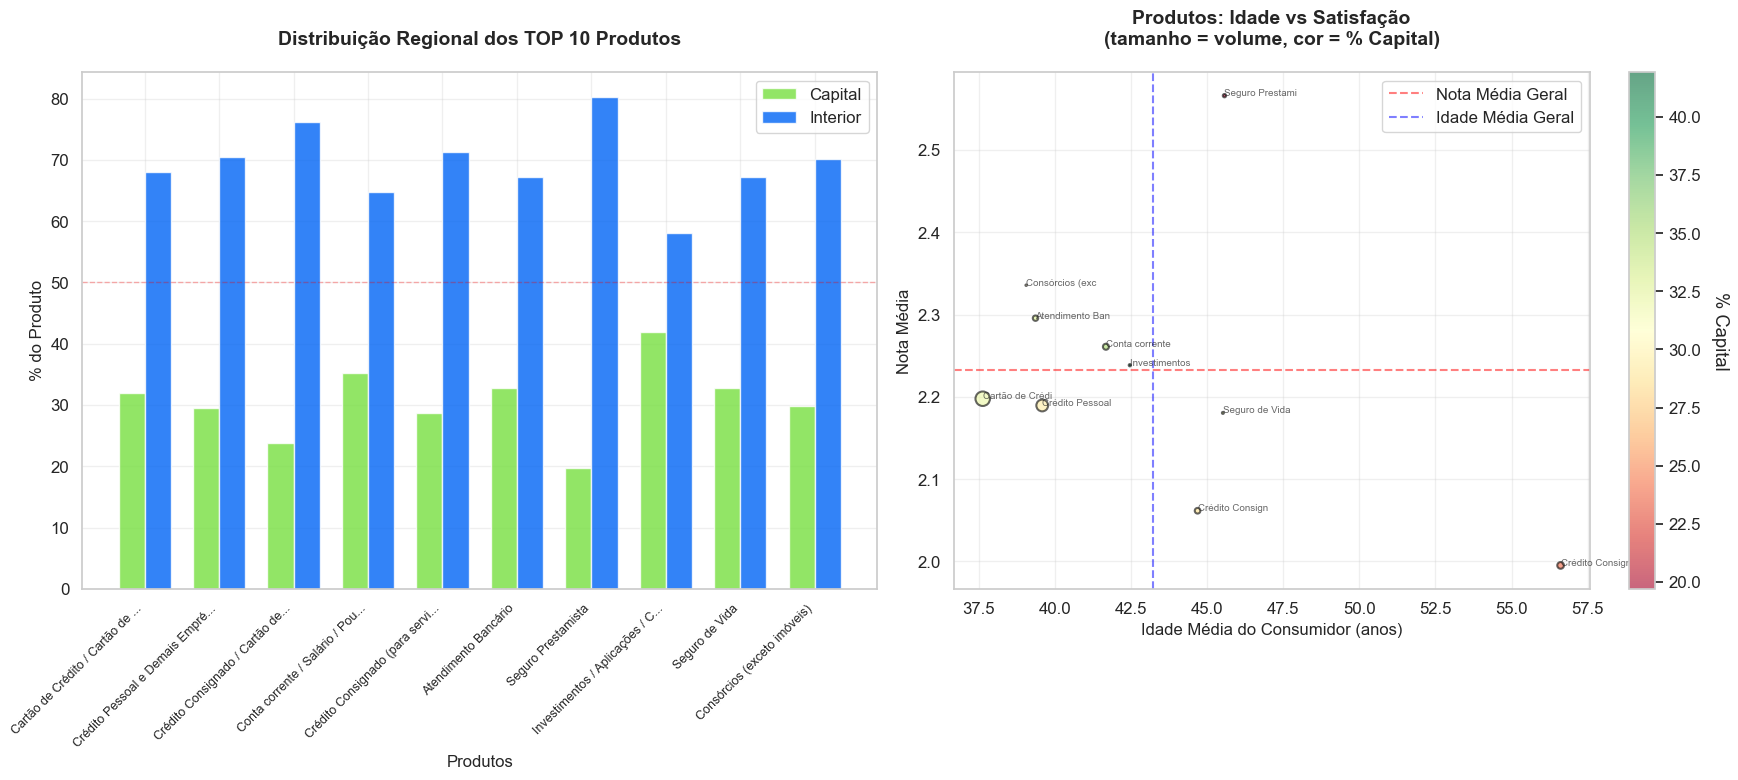

In [238]:
# VISUALIZAÇÃO: PRODUTOS POR REGIÃO
print("=" * 80)
print("GRÁFICO: DISTRIBUIÇÃO REGIONAL DE PRODUTOS")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico 1: Barras agrupadas (Capital vs Interior)
x = np.arange(len(top10_produtos))
width = 0.35

bars1 = ax1.bar(x - width/2, produtos_capital, width, 
                label='Capital', color=CORES_AGIBANK['verde'], alpha=0.8)
bars2 = ax1.bar(x + width/2, produtos_interior, width,
                label='Interior', color=CORES_AGIBANK['azul_principal'], alpha=0.8)

ax1.set_xlabel('Produtos', fontsize=12)
ax1.set_ylabel('% do Produto', fontsize=12)
ax1.set_title('Distribuição Regional dos TOP 10 Produtos', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels([p[:30] + '...' if len(p) > 30 else p for p in top10_produtos], 
                     rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=50, color='red', linestyle='--', alpha=0.3, linewidth=1)

# Gráfico 2: Scatter - Idade vs Nota (tamanho = volume)
sizes = top_contagens[:10] / 1000

scatter = ax2.scatter(idade_media_produtos, metricas_assuntos[:10, 0],
                     s=sizes, c=produtos_capital, cmap='RdYlGn',
                     alpha=0.6, edgecolors='black', linewidth=1.5)

ax2.set_xlabel('Idade Média do Consumidor (anos)', fontsize=12)
ax2.set_ylabel('Nota Média', fontsize=12)
ax2.set_title('Produtos: Idade vs Satisfação\n(tamanho = volume, cor = % Capital)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=metricas_assuntos[:10, 0].mean(), color='red', 
            linestyle='--', alpha=0.5, label='Nota Média Geral')
ax2.axvline(x=idade_media_produtos.mean(), color='blue',
            linestyle='--', alpha=0.5, label='Idade Média Geral')

# Adiciona labels nos pontos
for i, produto in enumerate(top10_produtos):
    nome_curto = produto.split('/')[0][:15]
    ax2.annotate(nome_curto, (idade_media_produtos[i], metricas_assuntos[i, 0]),
                fontsize=7, alpha=0.7)

ax2.legend()

# Colorbar
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('% Capital', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

In [240]:
# SÍNTESE: INSIGHTS SOBRE PRODUTOS
print("=" * 80)
print("SÍNTESE: PRINCIPAIS INSIGHTS SOBRE PRODUTOS")
print("=" * 80)

print("\nPERFIL DOS PRODUTOS:")
print("-" * 80)

# Produto dominante
produto_dominante = top10_produtos[0]
pct_dominante = pct_top_assuntos[0]
print(f"\n1. PRODUTO DOMINANTE:")
print(f"   {produto_dominante}")
print(f"   Representa {pct_dominante:.1f}% das reclamações de SP")

# Produto mais problemático (pior nota)
idx_pior = np.argmin(metricas_assuntos[:10, 0])
print(f"\n2. PRODUTO MAIS PROBLEMÁTICO:")
print(f"   {top10_produtos[idx_pior]}")
print(f"   Nota: {metricas_assuntos[idx_pior, 0]:.2f} | Tempo: {metricas_assuntos[idx_pior, 1]:.1f} dias")

# Produto com perfil mais jovem
print(f"\n3. PRODUTO DE PÚBLICO MAIS JOVEM:")
print(f"   {top10_produtos[idx_mais_jovem]}")
print(f"   Idade média: {idade_media_produtos[idx_mais_jovem]:.0f} anos")

# Produto com perfil mais idoso
print(f"\n4. PRODUTO DE PÚBLICO MAIS IDOSO:")
print(f"   {top10_produtos[idx_mais_idoso]}")
print(f"   Idade média: {idade_media_produtos[idx_mais_idoso]:.0f} anos")

# Diferença regional mais marcante
diferenca_regional = np.abs(produtos_capital - produtos_interior)
idx_maior_diferenca = np.argmax(diferenca_regional)
print(f"\n5. MAIOR DIFERENÇA REGIONAL:")
print(f"   {top10_produtos[idx_maior_diferenca]}")
print(f"   Capital: {produtos_capital[idx_maior_diferenca]:.1f}% | Interior: {produtos_interior[idx_maior_diferenca]:.1f}%")
print(f"   Diferença: {diferenca_regional[idx_maior_diferenca]:.1f}pp")

# Produto que Campinas mais representa
print(f"\n6. DESTAQUE CAMPINAS:")
print(f"   {top10_produtos[idx_mais_campinas]}")
print(f"   Campinas representa {produtos_campinas[idx_mais_campinas]:.2f}% desse produto")

print("\n" + "=" * 80)

SÍNTESE: PRINCIPAIS INSIGHTS SOBRE PRODUTOS

PERFIL DOS PRODUTOS:
--------------------------------------------------------------------------------

1. PRODUTO DOMINANTE:
   Cartão de Crédito / Cartão de Débito / Cartão de Loja
   Representa 40.7% das reclamações de SP

2. PRODUTO MAIS PROBLEMÁTICO:
   Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
   Nota: 2.00 | Tempo: 6.9 dias

3. PRODUTO DE PÚBLICO MAIS JOVEM:
   Cartão de Crédito / Cartão de Débito / Cartão de Loja
   Idade média: 38 anos

4. PRODUTO DE PÚBLICO MAIS IDOSO:
   Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
   Idade média: 57 anos

5. MAIOR DIFERENÇA REGIONAL:
   Seguro Prestamista
   Capital: 19.7% | Interior: 80.3%
   Diferença: 60.6pp

6. DESTAQUE CAMPINAS:
   Investimentos / Aplicações / Câmbio / Previdência Privada
   Campinas representa 3.18% desse produto



In [242]:
# PERGUNTA 11: CANAIS DE CONTRATAÇÃO EM SÃO PAULO
# Análise de como os produtos financeiros são contratados

print("=" * 80)
print("PERGUNTA 11: CANAIS DE CONTRATAÇÃO EM SÃO PAULO")
print("=" * 80)

print("\nOBJETIVO:")
print("-" * 80)
print("  • Identificar os principais canais de contratação")
print("  • Comparar desempenho por canal")
print("  • Analisar diferenças por perfil demográfico e região")

# Verifica se a coluna existe
if 'como_comprou_contratou' not in df_sp_financeiro.columns:
    print("\n⚠️  ATENÇÃO: Coluna 'como_comprou_contratou' não encontrada!")
    print("   Colunas disponíveis relacionadas a canal:")
    colunas_canal = [col for col in df_sp_financeiro.columns if 'canal' in col.lower() or 'comprou' in col.lower() or 'contrat' in col.lower()]
    for col in colunas_canal:
        print(f"     • {col}")
else:
    # Extrai array de canais de contratação
    arr_canal_contratacao = df_sp_financeiro['como_comprou_contratou'].fillna('Não Informado').to_numpy()
    
    # Conta distribuição por canal
    canais_unicos, contagem_canais = np.unique(arr_canal_contratacao, return_counts=True)
    
    # Ordena do maior para o menor
    idx_ord_canal = np.argsort(contagem_canais)[::-1]
    canais_ordenados = canais_unicos[idx_ord_canal]
    contagens_ordenadas = contagem_canais[idx_ord_canal]
    pct_canais = (contagens_ordenadas / len(arr_canal_contratacao)) * 100
    
    print(f"\nDISTRIBUIÇÃO POR CANAL DE CONTRATAÇÃO:")
    print(f"  Total de canais únicos: {len(canais_unicos)}")
    print(f"  Total de registros: {len(arr_canal_contratacao):,}")

PERGUNTA 11: CANAIS DE CONTRATAÇÃO EM SÃO PAULO

OBJETIVO:
--------------------------------------------------------------------------------
  • Identificar os principais canais de contratação
  • Comparar desempenho por canal
  • Analisar diferenças por perfil demográfico e região

DISTRIBUIÇÃO POR CANAL DE CONTRATAÇÃO:
  Total de canais únicos: 9
  Total de registros: 268,021


In [243]:
# Tabela de canais
df_canais = pd.DataFrame({
    'Posição': np.arange(1, len(canais_ordenados) + 1),
    'Canal de Contratação': canais_ordenados,
    'Reclamações': contagens_ordenadas,
    '% do Total': pct_canais
}).set_index('Posição')

display(
    df_canais.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.2f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Greens', subset=['% do Total'])
    .set_caption('Distribuição por Canal de Contratação - SP')
)

# Identifica canal predominante
canal_predominante = canais_ordenados[0]
pct_predominante = pct_canais[0]

print(f"\nDESTAQUE:")
print(f"  Canal predominante: {canal_predominante} ({pct_predominante:.1f}%)")

,Canal de Contratação,Reclamações,% do Total
Posição,,,
1,Internet,"116,961",43.64%
2,Não comprei / contratei,"59,487",22.19%
3,Loja física,"48,705",18.17%
4,Telefone,"35,711",13.32%
5,SMS / Mensagem de texto,"2,914",1.09%
6,Domicílio,"2,518",0.94%
7,Catálogo,"1,091",0.41%
8,"Stand, feiras e eventos",372,0.14%
9,Ganhei de presente,262,0.10%



DESTAQUE:
  Canal predominante: Internet (43.6%)


In [244]:
# Calcula métricas por canal (TOP 10 canais)
n_canais = min(10, len(canais_ordenados))
top_canais = canais_ordenados[:n_canais]

metricas_canais = np.zeros((n_canais, 3))

for i, canal in enumerate(top_canais):
    mask_canal = arr_canal_contratacao == canal
    
    # Nota média
    notas_canal = df_sp_financeiro.loc[mask_canal, 'nota_do_consumidor'].to_numpy()
    metricas_canais[i, 0] = np.nanmean(notas_canal)
    
    # Tempo médio
    tempo_canal = df_sp_financeiro.loc[mask_canal, 'tempo_resposta'].to_numpy()
    metricas_canais[i, 1] = np.nanmean(tempo_canal)
    
    # Taxa de resolução
    aval_canal = df_sp_financeiro.loc[mask_canal, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(aval_canal == 'Resolvida')
    total_aval = np.sum(~pd.isna(aval_canal))
    metricas_canais[i, 2] = (resolvidas / total_aval * 100) if total_aval > 0 else 0

# Tabela de performance por canal
df_performance_canais = pd.DataFrame({
    'Canal': top_canais,
    'Reclamações': contagens_ordenadas[:n_canais],
    '% SP': pct_canais[:n_canais],
    'Nota Média': metricas_canais[:, 0],
    'Tempo (dias)': metricas_canais[:, 1],
    'Taxa Resolução (%)': metricas_canais[:, 2]
}).set_index('Canal')

display(
    df_performance_canais.style
    .format({
        'Reclamações': '{:,.0f}',
        '% SP': '{:.2f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('Performance por Canal de Contratação - TOP 10')
)

print("✅ Métricas por canal calculadas!")

,Reclamações,% SP,Nota Média,Tempo (dias),Taxa Resolução (%)
Canal,,,,,
Internet,"116,961",43.64%,2.18,6.1,8.3%
Não comprei / contratei,"59,487",22.19%,2.14,6.7,8.7%
Loja física,"48,705",18.17%,2.41,6.7,9.7%
Telefone,"35,711",13.32%,2.05,6.4,6.4%
SMS / Mensagem de texto,"2,914",1.09%,1.93,6.7,6.8%
Domicílio,"2,518",0.94%,2.02,6.5,5.4%
Catálogo,"1,091",0.41%,2.05,6.3,5.8%
"Stand, feiras e eventos",372,0.14%,2.38,6.6,8.0%
Ganhei de presente,262,0.10%,2.10,6.6,12.4%


✅ Métricas por canal calculadas!


In [245]:
# Identifica extremos
idx_melhor_nota = np.argmax(metricas_canais[:, 0])
idx_pior_nota = np.argmin(metricas_canais[:, 0])
idx_mais_rapido = np.argmin(metricas_canais[:, 1])
idx_mais_lento = np.argmax(metricas_canais[:, 1])
idx_melhor_resolucao = np.argmax(metricas_canais[:, 2])
idx_pior_resolucao = np.argmin(metricas_canais[:, 2])

print(f"DESTAQUES POR CANAL:")
print("-" * 80)

print(f"\n  😊 MELHOR SATISFAÇÃO:")
print(f"    {top_canais[idx_melhor_nota]}")
print(f"    Nota: {metricas_canais[idx_melhor_nota, 0]:.2f}")

print(f"\n  😞 PIOR SATISFAÇÃO:")
print(f"    {top_canais[idx_pior_nota]}")
print(f"    Nota: {metricas_canais[idx_pior_nota, 0]:.2f}")

print(f"\n  ⚡ RESPOSTA MAIS RÁPIDA:")
print(f"    {top_canais[idx_mais_rapido]}")
print(f"    Tempo: {metricas_canais[idx_mais_rapido, 1]:.1f} dias")

print(f"\n  🐌 RESPOSTA MAIS LENTA:")
print(f"    {top_canais[idx_mais_lento]}")
print(f"    Tempo: {metricas_canais[idx_mais_lento, 1]:.1f} dias")

print(f"\n  ✅ MELHOR TAXA DE RESOLUÇÃO:")
print(f"    {top_canais[idx_melhor_resolucao]}")
print(f"    Taxa: {metricas_canais[idx_melhor_resolucao, 2]:.1f}%")

print(f"\n  ❌ PIOR TAXA DE RESOLUÇÃO:")
print(f"    {top_canais[idx_pior_resolucao]}")
print(f"    Taxa: {metricas_canais[idx_pior_resolucao, 2]:.1f}%")

DESTAQUES POR CANAL:
--------------------------------------------------------------------------------

  😊 MELHOR SATISFAÇÃO:
    Loja física
    Nota: 2.41

  😞 PIOR SATISFAÇÃO:
    SMS / Mensagem de texto
    Nota: 1.93

  ⚡ RESPOSTA MAIS RÁPIDA:
    Internet
    Tempo: 6.1 dias

  🐌 RESPOSTA MAIS LENTA:
    Loja física
    Tempo: 6.7 dias

  ✅ MELHOR TAXA DE RESOLUÇÃO:
    Ganhei de presente
    Taxa: 12.4%

  ❌ PIOR TAXA DE RESOLUÇÃO:
    Domicílio
    Taxa: 5.4%


In [246]:
# CORRELAÇÃO: CANAL X FAIXA ETÁRIA
print("\n" + "=" * 80)
print("CORRELAÇÃO: CANAL X FAIXA ETÁRIA")
print("=" * 80)

# Define ordem das faixas etárias
ordem_faixas = [
    'até 20 anos',
    'entre 21 a 30 anos',
    'entre 31 a 40 anos',
    'entre 41 a 50 anos',
    'entre 51 a 60 anos',
    'entre 61 a 70 anos',
    'mais de 70 anos'
]

# Seleciona TOP 8 canais para visualização
top8_canais = top_canais[:min(8, len(top_canais))]

# Cria matriz de correlação
matriz_canal_faixa = np.zeros((len(top8_canais), len(ordem_faixas)))

for i, canal in enumerate(top8_canais):
    for j, faixa in enumerate(ordem_faixas):
        mask_combinacao = (arr_canal_contratacao == canal) & (arr_faixa_etaria == faixa)
        total_canal = np.sum(arr_canal_contratacao == canal)
        
        if total_canal > 0:
            matriz_canal_faixa[i, j] = (np.sum(mask_combinacao) / total_canal) * 100

print("✅ Matriz de correlação Canal x Faixa Etária calculada!")
print(f"   Dimensões: {matriz_canal_faixa.shape[0]} canais x {matriz_canal_faixa.shape[1]} faixas etárias")


CORRELAÇÃO: CANAL X FAIXA ETÁRIA
✅ Matriz de correlação Canal x Faixa Etária calculada!
   Dimensões: 8 canais x 7 faixas etárias


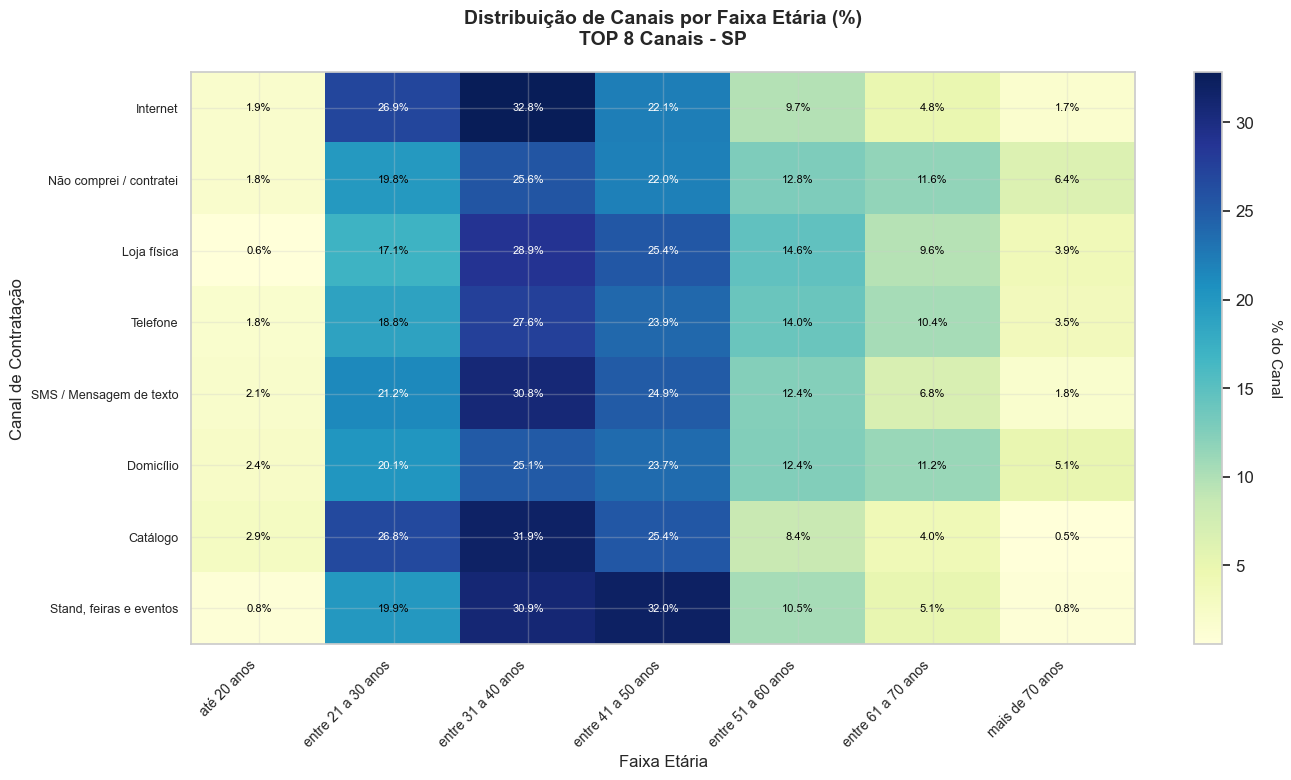

In [247]:
# Visualização: Heatmap Canal x Faixa Etária
fig, ax = plt.subplots(figsize=(14, 8))

im = ax.imshow(matriz_canal_faixa, cmap='YlGnBu', aspect='auto')

# Configurar eixos
ax.set_xticks(np.arange(len(ordem_faixas)))
ax.set_yticks(np.arange(len(top8_canais)))
ax.set_xticklabels(ordem_faixas, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(top8_canais, fontsize=9)

# Adicionar valores nas células
for i in range(len(top8_canais)):
    for j in range(len(ordem_faixas)):
        valor = matriz_canal_faixa[i, j]
        text = ax.text(j, i, f'{valor:.1f}%',
                      ha="center", va="center", 
                      color="white" if valor > 20 else "black",
                      fontsize=8)

ax.set_title('Distribuição de Canais por Faixa Etária (%)\nTOP 8 Canais - SP', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Faixa Etária', fontsize=12)
ax.set_ylabel('Canal de Contratação', fontsize=12)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('% do Canal', rotation=270, labelpad=20, fontsize=11)

plt.tight_layout()
plt.show()

In [249]:
# ANÁLISE: CANAL POR REGIÃO
print("=" * 80)
print("ANÁLISE: USO DE CANAIS POR REGIÃO")
print("=" * 80)

# Calcula distribuição por região para TOP 8 canais
canais_capital = []
canais_interior = []
canais_campinas = []

for canal in top8_canais:
    mask_canal = arr_canal_contratacao == canal
    
    # Capital
    qtd_capital = np.sum(mask_canal & eh_capital)
    total_canal = np.sum(mask_canal)
    pct_capital = (qtd_capital / total_canal * 100) if total_canal > 0 else 0
    canais_capital.append(pct_capital)
    
    # Interior
    qtd_interior = np.sum(mask_canal & eh_interior)
    pct_interior = (qtd_interior / total_canal * 100) if total_canal > 0 else 0
    canais_interior.append(pct_interior)
    
    # Campinas
    qtd_campinas = np.sum(mask_canal & eh_campinas)
    pct_campinas = (qtd_campinas / total_canal * 100) if total_canal > 0 else 0
    canais_campinas.append(pct_campinas)

canais_capital = np.array(canais_capital)
canais_interior = np.array(canais_interior)
canais_campinas = np.array(canais_campinas)

# Tabela comparativa
df_canais_regiao = pd.DataFrame({
    'Canal': top8_canais,
    '% Capital': canais_capital,
    '% Interior': canais_interior,
    '% Campinas': canais_campinas,
    'Diferença Cap-Int': canais_capital - canais_interior
}).set_index('Canal')

display(
    df_canais_regiao.style
    .format({
        '% Capital': '{:.1f}%',
        '% Interior': '{:.1f}%',
        '% Campinas': '{:.2f}%',
        'Diferença Cap-Int': '{:+.1f}pp'
    })
    .background_gradient(cmap='Greens', subset=['% Capital'])
    .background_gradient(cmap='Blues', subset=['% Interior'])
    .background_gradient(cmap='Oranges', subset=['% Campinas'])
    .background_gradient(cmap='RdYlGn', subset=['Diferença Cap-Int'], vmin=-10, vmax=10)
    .set_caption('Uso de Canais por Região - TOP 8')
)

# Identifica canais com maior diferença regional
idx_mais_capital_canal = np.argmax(canais_capital - canais_interior)
idx_mais_interior_canal = np.argmin(canais_capital - canais_interior)

print(f"\nDESTAQUES REGIONAIS:")
print("-" * 80)
print(f"\n  Canal MAIS usado na CAPITAL:")
print(f"    {top8_canais[idx_mais_capital_canal]}")
print(f"    Capital: {canais_capital[idx_mais_capital_canal]:.1f}% | Interior: {canais_interior[idx_mais_capital_canal]:.1f}%")

print(f"\n  Canal MAIS usado no INTERIOR:")
print(f"    {top8_canais[idx_mais_interior_canal]}")
print(f"    Capital: {canais_capital[idx_mais_interior_canal]:.1f}% | Interior: {canais_interior[idx_mais_interior_canal]:.1f}%")

ANÁLISE: USO DE CANAIS POR REGIÃO


,% Capital,% Interior,% Campinas,Diferença Cap-Int
Canal,,,,
Internet,31.3%,68.7%,2.85%,-37.4pp
Não comprei / contratei,30.8%,69.2%,2.59%,-38.4pp
Loja física,27.7%,72.3%,2.80%,-44.7pp
Telefone,31.3%,68.7%,2.53%,-37.4pp
SMS / Mensagem de texto,31.3%,68.7%,2.75%,-37.5pp
Domicílio,28.1%,71.9%,2.78%,-43.8pp
Catálogo,40.7%,59.3%,2.84%,-18.6pp
"Stand, feiras e eventos",30.1%,69.9%,3.49%,-39.8pp



DESTAQUES REGIONAIS:
--------------------------------------------------------------------------------

  Canal MAIS usado na CAPITAL:
    Catálogo
    Capital: 40.7% | Interior: 59.3%

  Canal MAIS usado no INTERIOR:
    Loja física
    Capital: 27.7% | Interior: 72.3%


GRÁFICO: CANAIS DE CONTRATAÇÃO


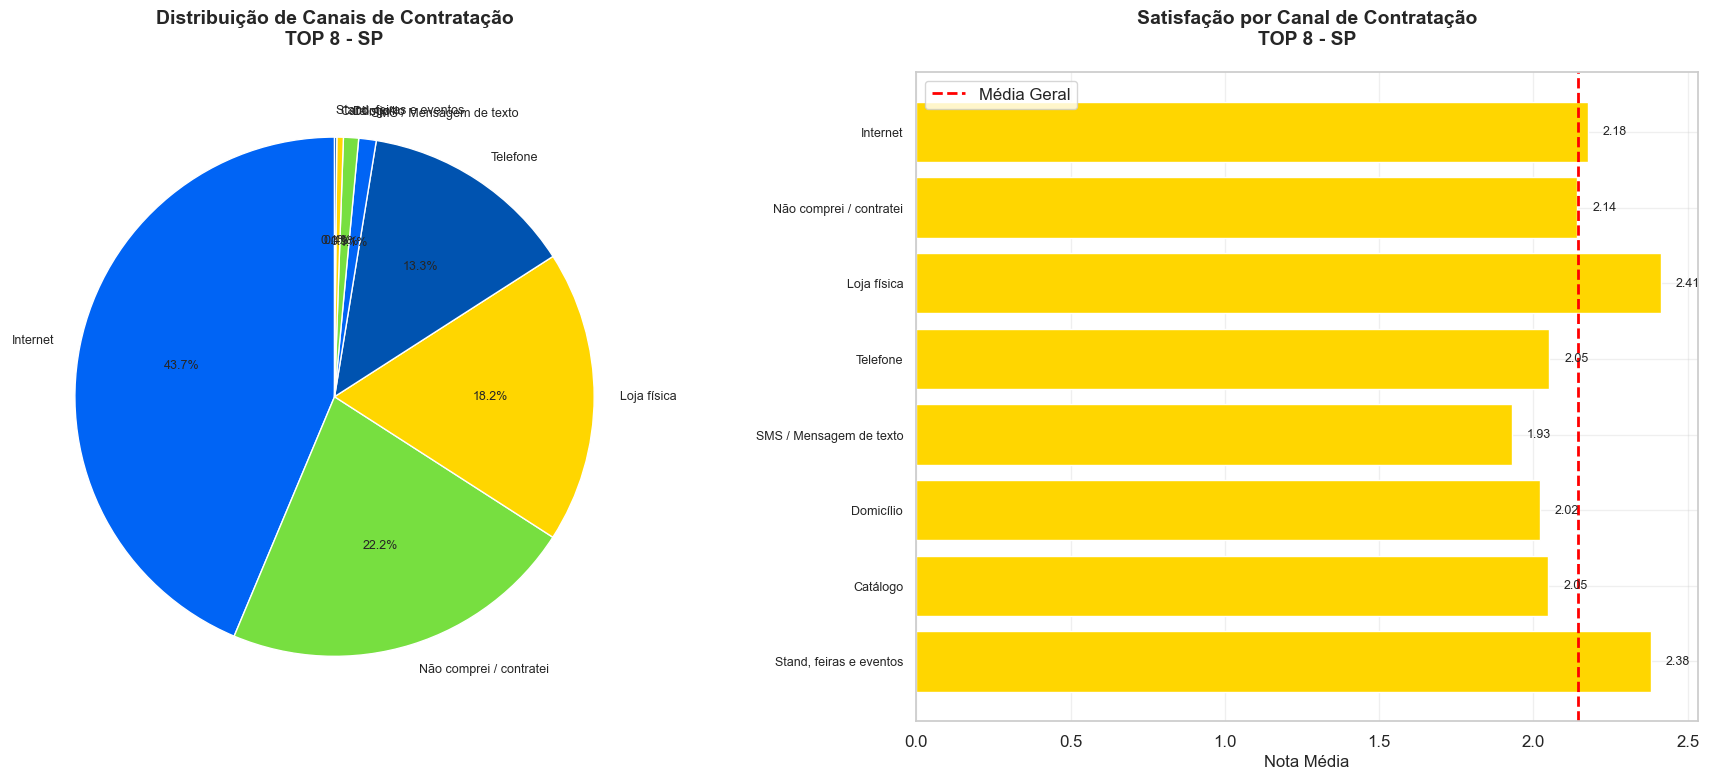

In [250]:
# VISUALIZAÇÃO: CANAIS DE CONTRATAÇÃO
print("=" * 80)
print("GRÁFICO: CANAIS DE CONTRATAÇÃO")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico 1: Pizza de distribuição
cores_pizza = [CORES_AGIBANK['azul_principal'], CORES_AGIBANK['verde'], 
               CORES_AGIBANK['amarelo'], CORES_AGIBANK['azul_medio']] * 3

ax1.pie(contagens_ordenadas[:8], labels=[c[:25] + '...' if len(c) > 25 else c for c in canais_ordenados[:8]], 
        autopct='%1.1f%%', colors=cores_pizza[:8], startangle=90,
        textprops={'fontsize': 9})
ax1.set_title('Distribuição de Canais de Contratação\nTOP 8 - SP', 
              fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Barras de performance (nota por canal)
cores_barras_canal = np.where(
    metricas_canais[:8, 0] < 2.5, CORES_AGIBANK['amarelo'],
    np.where(metricas_canais[:8, 0] < 3.5, CORES_AGIBANK['azul_medio'],
             CORES_AGIBANK['verde'])
)

y_pos = np.arange(len(top8_canais))
ax2.barh(y_pos, metricas_canais[:8, 0], color=cores_barras_canal, 
         edgecolor='white', linewidth=1)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([c[:30] + '...' if len(c) > 30 else c for c in top8_canais], fontsize=9)
ax2.invert_yaxis()
ax2.set_xlabel('Nota Média', fontsize=12)
ax2.set_title('Satisfação por Canal de Contratação\nTOP 8 - SP', 
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(x=metricas_canais[:8, 0].mean(), color='red', 
            linestyle='--', linewidth=2, label='Média Geral')
ax2.legend()

for i, valor in enumerate(metricas_canais[:8, 0]):
    ax2.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [267]:
# PERGUNTA 13: O CONSUMIDOR PAULISTA PROCURA A EMPRESA ANTES DE RECLAMAR?
# Análise do comportamento pré-reclamação

print("=" * 80)
print("PERGUNTA 13: PROCUROU A EMPRESA ANTES DE RECLAMAR?")
print("=" * 80)

print("\nOBJETIVO:")
print("-" * 80)
print("  • Identificar % que procura a empresa antes")
print("  • Impacto na satisfação e resolução")
print("  • Diferenças por perfil demográfico e região")
print("  • Diferenças por tipo de produto")

# Extrai array de procurou empresa
arr_procurou = df_sp_financeiro['procurou_empresa'].fillna('N').to_numpy()

# Mapeia S/N para Sim/Não para melhor visualização
mapa_procurou = {'S': 'Sim', 'N': 'Não'}
arr_procurou_texto = np.array([mapa_procurou.get(v, v) for v in arr_procurou])

# Conta distribuição
procurou_unicos, contagem_procurou = np.unique(arr_procurou_texto, return_counts=True)

# Ordena
idx_ord_procurou = np.argsort(contagem_procurou)[::-1]
procurou_ordenados = procurou_unicos[idx_ord_procurou]
contagens_ordenadas = contagem_procurou[idx_ord_procurou]
pct_procurou = (contagens_ordenadas / len(arr_procurou)) * 100

print(f"\nDISTRIBUIÇÃO:")
print(f"  Total de registros: {len(arr_procurou):,}")

for i, (opcao, qtd, pct) in enumerate(zip(procurou_ordenados, contagens_ordenadas, pct_procurou)):
    print(f"  {opcao}: {qtd:,} ({pct:.1f}%)")

PERGUNTA 13: PROCUROU A EMPRESA ANTES DE RECLAMAR?

OBJETIVO:
--------------------------------------------------------------------------------
  • Identificar % que procura a empresa antes
  • Impacto na satisfação e resolução
  • Diferenças por perfil demográfico e região
  • Diferenças por tipo de produto

DISTRIBUIÇÃO:
  Total de registros: 268,021
  Sim: 199,322 (74.4%)
  Não: 68,699 (25.6%)


In [269]:
# IMPACTO: PROCUROU EMPRESA X SATISFAÇÃO
print("\n" + "=" * 80)
print("IMPACTO: PROCURAR A EMPRESA ANTES X SATISFAÇÃO")
print("=" * 80)

# Calcula métricas por opção
metricas_procurou = np.zeros((len(procurou_ordenados), 3))

for i, opcao in enumerate(procurou_ordenados):
    mask_opcao = arr_procurou_texto == opcao
    
    # Nota média
    notas_opcao = df_sp_financeiro.loc[mask_opcao, 'nota_do_consumidor'].to_numpy()
    metricas_procurou[i, 0] = np.nanmean(notas_opcao)
    
    # Tempo médio
    tempo_opcao = df_sp_financeiro.loc[mask_opcao, 'tempo_resposta'].to_numpy()
    metricas_procurou[i, 1] = np.nanmean(tempo_opcao)
    
    # Taxa de resolução
    aval_opcao = df_sp_financeiro.loc[mask_opcao, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(aval_opcao == 'Resolvida')
    total_aval = np.sum(~pd.isna(aval_opcao))
    metricas_procurou[i, 2] = (resolvidas / total_aval * 100) if total_aval > 0 else 0

# Tabela de impacto
df_impacto_procurou = pd.DataFrame({
    'Procurou Empresa': procurou_ordenados,
    'Reclamações': contagens_ordenadas,
    '% do Total': pct_procurou,
    'Nota Média': metricas_procurou[:, 0],
    'Tempo (dias)': metricas_procurou[:, 1],
    'Taxa Resolução (%)': metricas_procurou[:, 2]
}).set_index('Procurou Empresa')

display(
    df_impacto_procurou.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('Impacto de Procurar a Empresa Antes - SP')
)

# Calcula diferença entre quem procurou e quem não procurou
if 'Sim' in procurou_ordenados and 'Não' in procurou_ordenados:
    idx_sim = np.where(procurou_ordenados == 'Sim')[0][0]
    idx_nao = np.where(procurou_ordenados == 'Não')[0][0]
    
    diferenca_nota = metricas_procurou[idx_sim, 0] - metricas_procurou[idx_nao, 0]
    diferenca_tempo = metricas_procurou[idx_sim, 1] - metricas_procurou[idx_nao, 1]
    diferenca_resolucao = metricas_procurou[idx_sim, 2] - metricas_procurou[idx_nao, 2]
    
    print(f"\nCOMPARAÇÃO: PROCUROU vs NÃO PROCUROU")
    print("-" * 80)
    print(f"  Nota: {'MELHOR' if diferenca_nota > 0 else 'PIOR'} em {abs(diferenca_nota):.2f} pontos")
    print(f"  Tempo: {'MAIS RÁPIDO' if diferenca_tempo < 0 else 'MAIS LENTO'} em {abs(diferenca_tempo):.1f} dias")
    print(f"  Resolução: {'MAIOR' if diferenca_resolucao > 0 else 'MENOR'} em {abs(diferenca_resolucao):.1f}pp")
    
    print(f"\nINSIGHT:")
    if diferenca_nota < 0:
        print(f"  Quem procura a empresa ANTES tem satisfação PIOR!")
        print(f"  Isso indica que o SAC/atendimento direto NÃO resolve o problema.")
    else:
        print(f"  Quem procura a empresa ANTES tem satisfação MELHOR!")
        print(f"  Isso indica que o SAC/atendimento direto FUNCIONA.")


IMPACTO: PROCURAR A EMPRESA ANTES X SATISFAÇÃO


,Reclamações,% do Total,Nota Média,Tempo (dias),Taxa Resolução (%)
Procurou Empresa,,,,,
Sim,"199,322",74.4%,2.13,6.6,8.5%
Não,"68,699",25.6%,2.42,5.8,7.7%



COMPARAÇÃO: PROCUROU vs NÃO PROCUROU
--------------------------------------------------------------------------------
  Nota: PIOR em 0.29 pontos
  Tempo: MAIS LENTO em 0.8 dias
  Resolução: MAIOR em 0.9pp

INSIGHT:
  Quem procura a empresa ANTES tem satisfação PIOR!
  Isso indica que o SAC/atendimento direto NÃO resolve o problema.


In [270]:
# ANÁLISE: PROCUROU EMPRESA X FAIXA ETÁRIA
print("\n" + "=" * 80)
print("ANÁLISE: QUEM PROCURA MAIS A EMPRESA ANTES?")
print("=" * 80)

# Calcula % que procurou por faixa etária
ordem_faixas = [
    'até 20 anos',
    'entre 21 a 30 anos',
    'entre 31 a 40 anos',
    'entre 41 a 50 anos',
    'entre 51 a 60 anos',
    'entre 61 a 70 anos',
    'mais de 70 anos'
]

pct_procurou_por_faixa = []

for faixa in ordem_faixas:
    mask_faixa = arr_faixa_etaria == faixa
    procurou_faixa = arr_procurou[mask_faixa]  # Usa arr_procurou original (S/N)
    
    total_faixa = len(procurou_faixa)
    procurou_sim = np.sum(procurou_faixa == 'S')  # Compara com 'S'
    pct_sim = (procurou_sim / total_faixa * 100) if total_faixa > 0 else 0
    pct_procurou_por_faixa.append(pct_sim)

pct_procurou_por_faixa = np.array(pct_procurou_por_faixa)

# Tabela
df_procurou_faixa = pd.DataFrame({
    'Faixa Etária': ordem_faixas,
    '% Procurou Empresa': pct_procurou_por_faixa
}).set_index('Faixa Etária')

display(
    df_procurou_faixa.style
    .format({
        '% Procurou Empresa': '{:.1f}%'
    })
    .background_gradient(cmap='Greens', subset=['% Procurou Empresa'])
    .set_caption('% que Procurou a Empresa Antes por Faixa Etária - SP')
)

# Identifica extremos
idx_mais_procura = np.argmax(pct_procurou_por_faixa)
idx_menos_procura = np.argmin(pct_procurou_por_faixa)

print(f"\nDESTAQUES:")
print("-" * 80)
print(f"  Faixa que MAIS procura: {ordem_faixas[idx_mais_procura]} ({pct_procurou_por_faixa[idx_mais_procura]:.1f}%)")
print(f"  Faixa que MENOS procura: {ordem_faixas[idx_menos_procura]} ({pct_procurou_por_faixa[idx_menos_procura]:.1f}%)")


ANÁLISE: QUEM PROCURA MAIS A EMPRESA ANTES?


,% Procurou Empresa
Faixa Etária,
até 20 anos,51.7%
entre 21 a 30 anos,66.1%
entre 31 a 40 anos,73.8%
entre 41 a 50 anos,78.2%
entre 51 a 60 anos,81.3%
entre 61 a 70 anos,80.7%
mais de 70 anos,79.3%



DESTAQUES:
--------------------------------------------------------------------------------
  Faixa que MAIS procura: entre 51 a 60 anos (81.3%)
  Faixa que MENOS procura: até 20 anos (51.7%)


In [271]:
# ANÁLISE: PROCUROU EMPRESA X GÊNERO
print("\n" + "=" * 80)
print("ANÁLISE: DIFERENÇA POR GÊNERO")
print("=" * 80)

# Calcula % que procurou por gênero
generos = ['F', 'M']
pct_procurou_por_genero = []

for genero in generos:
    mask_genero = arr_sexo == genero
    procurou_genero = arr_procurou[mask_genero]  # Usa arr_procurou original (S/N)
    
    total_genero = len(procurou_genero)
    procurou_sim = np.sum(procurou_genero == 'S')  # Compara com 'S'
    pct_sim = (procurou_sim / total_genero * 100) if total_genero > 0 else 0
    pct_procurou_por_genero.append(pct_sim)

pct_procurou_por_genero = np.array(pct_procurou_por_genero)

print(f"% QUE PROCUROU A EMPRESA ANTES:")
print(f"  Feminino: {pct_procurou_por_genero[0]:.1f}%")
print(f"  Masculino: {pct_procurou_por_genero[1]:.1f}%")
print(f"  Diferença: {abs(pct_procurou_por_genero[0] - pct_procurou_por_genero[1]):.1f}pp")

if pct_procurou_por_genero[0] > pct_procurou_por_genero[1]:
    print(f"\n  → Mulheres procuram MAIS a empresa antes de reclamar")
else:
    print(f"\n  → Homens procuram MAIS a empresa antes de reclamar")


ANÁLISE: DIFERENÇA POR GÊNERO
% QUE PROCUROU A EMPRESA ANTES:
  Feminino: 75.1%
  Masculino: 73.6%
  Diferença: 1.5pp

  → Mulheres procuram MAIS a empresa antes de reclamar


In [272]:
# ANÁLISE: PROCUROU EMPRESA X REGIÃO
print("\n" + "=" * 80)
print("ANÁLISE: CAPITAL VS INTERIOR")
print("=" * 80)

# Calcula % que procurou por região
regioes = ['Capital', 'Interior', 'Campinas']
masks_regioes = [eh_capital, eh_interior, eh_campinas]
pct_procurou_por_regiao = []

for regiao, mask_regiao in zip(regioes, masks_regioes):
    procurou_regiao = arr_procurou[mask_regiao]  # Usa arr_procurou original (S/N)
    
    total_regiao = len(procurou_regiao)
    procurou_sim = np.sum(procurou_regiao == 'S')  # Compara com 'S'
    pct_sim = (procurou_sim / total_regiao * 100) if total_regiao > 0 else 0
    pct_procurou_por_regiao.append(pct_sim)

pct_procurou_por_regiao = np.array(pct_procurou_por_regiao)

# Tabela
df_procurou_regiao = pd.DataFrame({
    'Região': regioes,
    '% Procurou Empresa': pct_procurou_por_regiao
}).set_index('Região')

display(
    df_procurou_regiao.style
    .format({
        '% Procurou Empresa': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['% Procurou Empresa'])
    .set_caption('% que Procurou a Empresa Antes por Região - SP')
)

print(f"\nCOMPARAÇÃO:")
print(f"  Capital: {pct_procurou_por_regiao[0]:.1f}%")
print(f"  Interior: {pct_procurou_por_regiao[1]:.1f}%")
print(f"  Campinas: {pct_procurou_por_regiao[2]:.1f}%")
print(f"  Diferença Cap-Int: {pct_procurou_por_regiao[0] - pct_procurou_por_regiao[1]:+.1f}pp")


ANÁLISE: CAPITAL VS INTERIOR


,% Procurou Empresa
Região,
Capital,75.1%
Interior,74.1%
Campinas,72.2%



COMPARAÇÃO:
  Capital: 75.1%
  Interior: 74.1%
  Campinas: 72.2%
  Diferença Cap-Int: +1.0pp


In [273]:
# ANÁLISE: PROCUROU EMPRESA X PRODUTO
print("\n" + "=" * 80)
print("ANÁLISE: POR TIPO DE PRODUTO")
print("=" * 80)

# Usa TOP 10 produtos
top10_produtos_procurou = top10_produtos if 'top10_produtos' in locals() else top_assuntos[:10]

pct_procurou_por_produto = []

for produto in top10_produtos_procurou:
    mask_produto = arr_assunto == produto
    procurou_produto = arr_procurou[mask_produto]  # Usa arr_procurou original (S/N)
    
    total_produto = len(procurou_produto)
    procurou_sim = np.sum(procurou_produto == 'S')  # Compara com 'S'
    pct_sim = (procurou_sim / total_produto * 100) if total_produto > 0 else 0
    pct_procurou_por_produto.append(pct_sim)

pct_procurou_por_produto = np.array(pct_procurou_por_produto)

# Ordena por % que procurou
idx_ord_procurou_produto = np.argsort(pct_procurou_por_produto)[::-1]

print(f"PRODUTOS ONDE MAIS SE PROCURA A EMPRESA ANTES:")
print("-" * 80)

for i, idx in enumerate(idx_ord_procurou_produto):
    produto = top10_produtos_procurou[idx]
    pct = pct_procurou_por_produto[idx]
    print(f"{i+1:2d}. [{pct:>5.1f}%] {produto}")

# Identifica extremos
idx_mais_procura_prod = idx_ord_procurou_produto[0]
idx_menos_procura_prod = idx_ord_procurou_produto[-1]

print(f"\nDESTAQUES:")
print("-" * 80)
print(f"  Produto onde MAIS se procura:")
print(f"    {top10_produtos_procurou[idx_mais_procura_prod]}")
print(f"    {pct_procurou_por_produto[idx_mais_procura_prod]:.1f}% procurou antes")

print(f"\n  Produto onde MENOS se procura:")
print(f"    {top10_produtos_procurou[idx_menos_procura_prod]}")
print(f"    {pct_procurou_por_produto[idx_menos_procura_prod]:.1f}% procurou antes")


ANÁLISE: POR TIPO DE PRODUTO
PRODUTOS ONDE MAIS SE PROCURA A EMPRESA ANTES:
--------------------------------------------------------------------------------
 1. [ 92.4%] Seguro de Vida
 2. [ 88.7%] Investimentos / Aplicações / Câmbio / Previdência Privada
 3. [ 88.2%] Seguro Prestamista
 4. [ 84.3%] Consórcios (exceto imóveis)
 5. [ 82.8%] Conta corrente / Salário / Poupança /Conta Aposentadoria
 6. [ 81.0%] Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)
 7. [ 75.6%] Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)
 8. [ 74.5%] Atendimento Bancário
 9. [ 72.0%] Cartão de Crédito / Cartão de Débito / Cartão de Loja
10. [ 71.1%] Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos)

DESTAQUES:
--------------------------------------------------------------------------------
  Produto onde MAIS se procura:
    Seguro de Vida
    92.4% procurou antes

  Produto onde MENOS se procura:
    Crédit

GRÁFICOS: PROCUROU A EMPRESA ANTES


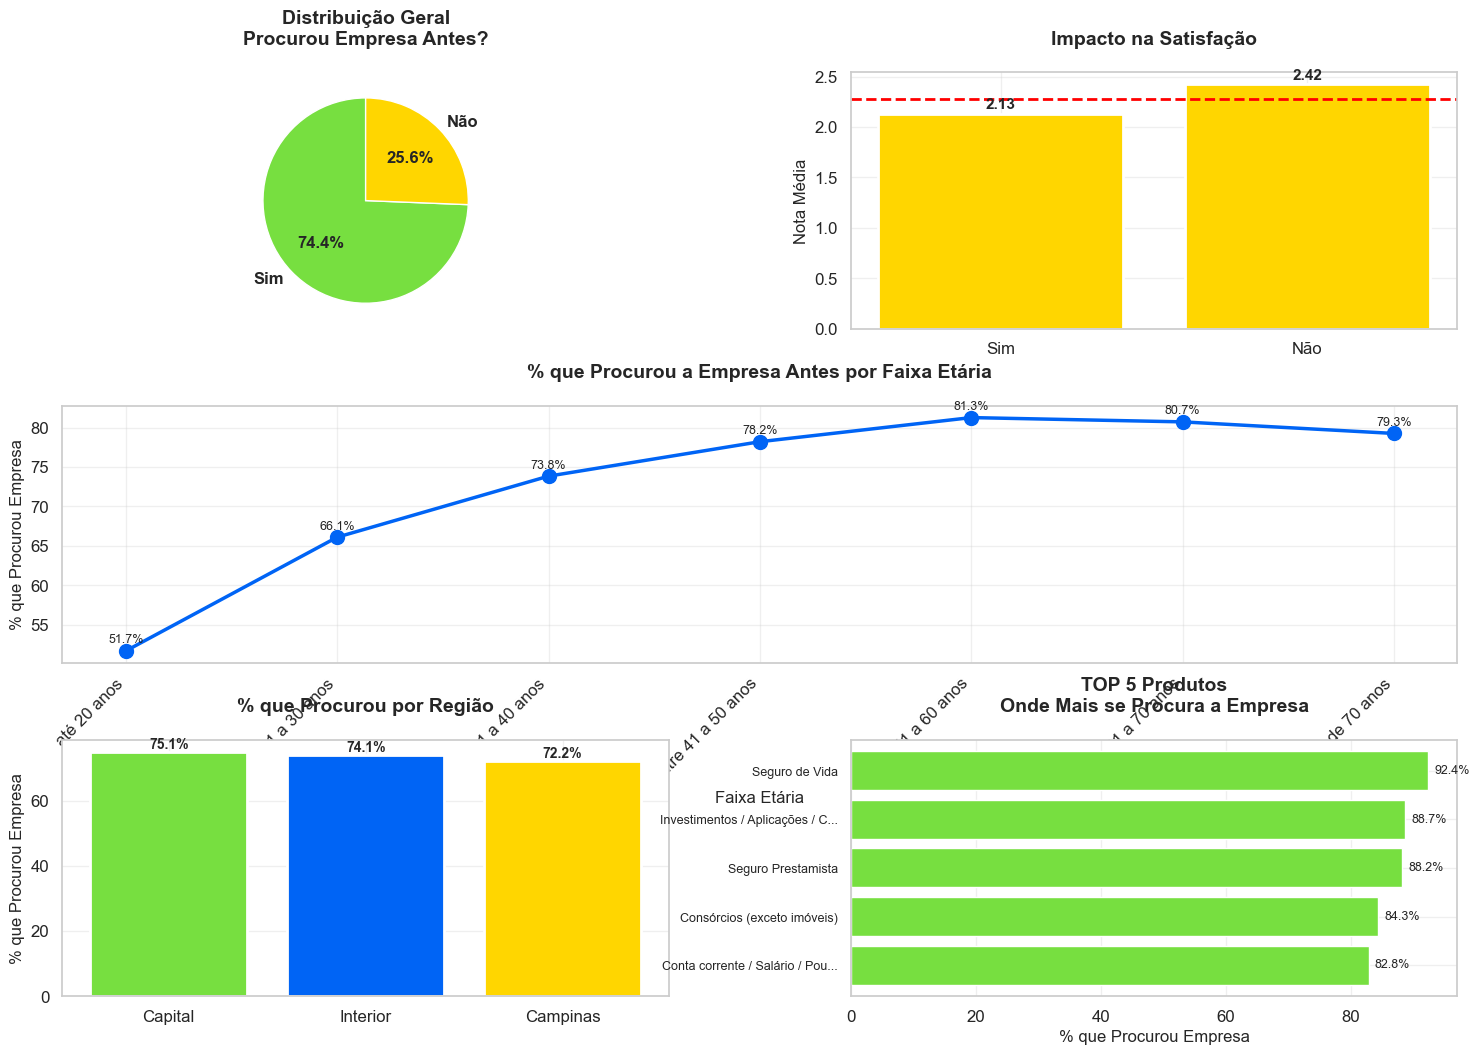

In [274]:
# VISUALIZAÇÕES: PROCUROU EMPRESA
print("=" * 80)
print("GRÁFICOS: PROCUROU A EMPRESA ANTES")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Gráfico 1: Pizza geral
ax1 = fig.add_subplot(gs[0, 0])
cores_pizza = [CORES_AGIBANK['verde'], CORES_AGIBANK['amarelo']]
ax1.pie(contagens_ordenadas, labels=procurou_ordenados, autopct='%1.1f%%',
        colors=cores_pizza[:len(procurou_ordenados)], startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Distribuição Geral\nProcurou Empresa Antes?', 
              fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Impacto na nota
ax2 = fig.add_subplot(gs[0, 1])
cores_barras_impacto = [CORES_AGIBANK['verde'] if nota >= 3 else CORES_AGIBANK['amarelo'] 
                        for nota in metricas_procurou[:, 0]]
ax2.bar(procurou_ordenados, metricas_procurou[:, 0], color=cores_barras_impacto,
        edgecolor='white', linewidth=2)
ax2.set_ylabel('Nota Média', fontsize=12)
ax2.set_title('Impacto na Satisfação', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=metricas_procurou[:, 0].mean(), color='red', linestyle='--', linewidth=2)

for i, valor in enumerate(metricas_procurou[:, 0]):
    ax2.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=11, fontweight='bold')

# Gráfico 3: Por faixa etária
ax3 = fig.add_subplot(gs[1, :])
ax3.plot(ordem_faixas, pct_procurou_por_faixa, marker='o', linewidth=2.5,
         markersize=10, color=CORES_AGIBANK['azul_principal'])
ax3.set_xlabel('Faixa Etária', fontsize=12)
ax3.set_ylabel('% que Procurou Empresa', fontsize=12)
ax3.set_title('% que Procurou a Empresa Antes por Faixa Etária', 
              fontsize=14, fontweight='bold', pad=20)
ax3.grid(True, alpha=0.3)
ax3.set_xticklabels(ordem_faixas, rotation=45, ha='right')

for i, valor in enumerate(pct_procurou_por_faixa):
    ax3.text(i, valor + 1, f'{valor:.1f}%', ha='center', fontsize=9)

# Gráfico 4: Por região
ax4 = fig.add_subplot(gs[2, 0])
cores_regiao = [CORES_AGIBANK['verde'], CORES_AGIBANK['azul_principal'], CORES_AGIBANK['amarelo']]
ax4.bar(regioes, pct_procurou_por_regiao, color=cores_regiao, edgecolor='white', linewidth=2)
ax4.set_ylabel('% que Procurou Empresa', fontsize=12)
ax4.set_title('% que Procurou por Região', fontsize=14, fontweight='bold', pad=20)
ax4.grid(True, alpha=0.3, axis='y')

for i, valor in enumerate(pct_procurou_por_regiao):
    ax4.text(i, valor + 1, f'{valor:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Gráfico 5: TOP 5 produtos
ax5 = fig.add_subplot(gs[2, 1])
top5_idx = idx_ord_procurou_produto[:5]
top5_produtos_viz = [top10_produtos_procurou[i][:30] + '...' if len(top10_produtos_procurou[i]) > 30 
                     else top10_produtos_procurou[i] for i in top5_idx]
top5_pct = pct_procurou_por_produto[top5_idx]

ax5.barh(range(5), top5_pct, color=CORES_AGIBANK['verde'], edgecolor='white', linewidth=1)
ax5.set_yticks(range(5))
ax5.set_yticklabels(top5_produtos_viz, fontsize=9)
ax5.invert_yaxis()
ax5.set_xlabel('% que Procurou Empresa', fontsize=12)
ax5.set_title('TOP 5 Produtos\nOnde Mais se Procura a Empresa', 
              fontsize=14, fontweight='bold', pad=20)
ax5.grid(True, alpha=0.3, axis='x')

for i, valor in enumerate(top5_pct):
    ax5.text(valor + 1, i, f'{valor:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [275]:
# PERGUNTA 14: SÃO PAULO É MAIS EFICIENTE QUE A MÉDIA NACIONAL?
# Análise de tempo de resposta e eficiência

print("=" * 80)
print("PERGUNTA 14: EFICIÊNCIA E TEMPO EM SÃO PAULO")
print("=" * 80)

print("\nOBJETIVO:")
print("-" * 80)
print("  • Analisar tempo médio de resposta em SP")
print("  • Taxa de resposta no prazo (≤10 dias)")
print("  • Correlação entre tempo e satisfação")
print("  • Diferenças por tipo de instituição e região")

# Extrai array de tempo
arr_tempo_analise = df_sp_financeiro['tempo_resposta'].to_numpy()

# Remove valores ausentes para estatísticas
arr_tempo_valido = arr_tempo_analise[~np.isnan(arr_tempo_analise)]

# Estatísticas descritivas
tempo_media = np.mean(arr_tempo_valido)
tempo_mediana = np.median(arr_tempo_valido)
tempo_desvio = np.std(arr_tempo_valido)
tempo_min = np.min(arr_tempo_valido)
tempo_max = np.max(arr_tempo_valido)
tempo_p25 = np.percentile(arr_tempo_valido, 25)
tempo_p75 = np.percentile(arr_tempo_valido, 75)

print(f"\nESTATÍSTICAS DE TEMPO DE RESPOSTA (SP):")
print("-" * 80)
print(f"  Média: {tempo_media:.1f} dias")
print(f"  Mediana: {tempo_mediana:.1f} dias")
print(f"  Desvio padrão: {tempo_desvio:.1f} dias")
print(f"  Mínimo: {tempo_min:.0f} dias")
print(f"  Máximo: {tempo_max:.0f} dias")
print(f"  1º Quartil (25%): {tempo_p25:.1f} dias")
print(f"  3º Quartil (75%): {tempo_p75:.1f} dias")

# Taxa de resposta no prazo
no_prazo_count = np.sum(arr_tempo_valido <= 10)
fora_prazo_count = np.sum(arr_tempo_valido > 10)
taxa_no_prazo = (no_prazo_count / len(arr_tempo_valido)) * 100
taxa_fora_prazo = (fora_prazo_count / len(arr_tempo_valido)) * 100

print(f"\nTAXA DE CUMPRIMENTO DE PRAZO:")
print("-" * 80)
print(f"  No prazo (≤10 dias): {no_prazo_count:,} ({taxa_no_prazo:.1f}%)")
print(f"  Fora do prazo (>10 dias): {fora_prazo_count:,} ({taxa_fora_prazo:.1f}%)")

PERGUNTA 14: EFICIÊNCIA E TEMPO EM SÃO PAULO

OBJETIVO:
--------------------------------------------------------------------------------
  • Analisar tempo médio de resposta em SP
  • Taxa de resposta no prazo (≤10 dias)
  • Correlação entre tempo e satisfação
  • Diferenças por tipo de instituição e região

ESTATÍSTICAS DE TEMPO DE RESPOSTA (SP):
--------------------------------------------------------------------------------
  Média: 6.4 dias
  Mediana: 7.0 dias
  Desvio padrão: 3.2 dias
  Mínimo: 0 dias
  Máximo: 29 dias
  1º Quartil (25%): 4.0 dias
  3º Quartil (75%): 9.0 dias

TAXA DE CUMPRIMENTO DE PRAZO:
--------------------------------------------------------------------------------
  No prazo (≤10 dias): 232,815 (98.0%)
  Fora do prazo (>10 dias): 4,809 (2.0%)


In [277]:
# DISTRIBUIÇÃO DE TEMPO POR FAIXAS
print("\n" + "=" * 80)
print("DISTRIBUIÇÃO POR FAIXAS DE TEMPO")
print("=" * 80)

# Define faixas de tempo
faixas_tempo = ['0-1 dia', '1-3 dias', '3-7 dias', '7-10 dias', '>10 dias']

# Conta distribuição
qtd_0_1 = np.sum((arr_tempo_valido >= 0) & (arr_tempo_valido <= 1))
qtd_1_3 = np.sum((arr_tempo_valido > 1) & (arr_tempo_valido <= 3))
qtd_3_7 = np.sum((arr_tempo_valido > 3) & (arr_tempo_valido <= 7))
qtd_7_10 = np.sum((arr_tempo_valido > 7) & (arr_tempo_valido <= 10))
qtd_10_mais = np.sum(arr_tempo_valido > 10)

contagens_faixas = np.array([qtd_0_1, qtd_1_3, qtd_3_7, qtd_7_10, qtd_10_mais])
pct_faixas = (contagens_faixas / len(arr_tempo_valido)) * 100
pct_acumulado_tempo = np.cumsum(pct_faixas)

# Tabela
df_distribuicao_tempo = pd.DataFrame({
    'Faixa de Tempo': faixas_tempo,
    'Reclamações': contagens_faixas,
    '% do Total': pct_faixas,
    '% Acumulado': pct_acumulado_tempo
}).set_index('Faixa de Tempo')

display(
    df_distribuicao_tempo.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%',
        '% Acumulado': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Greens', subset=['% do Total'])
    .background_gradient(cmap='Oranges', subset=['% Acumulado'])
    .set_caption('Distribuição de Tempo de Resposta - SP')
)

print(f"\nINSIGHT:")
print(f"  {pct_acumulado_tempo[3]:.1f}% das reclamações são respondidas em até 10 dias")
print(f"  {pct_acumulado_tempo[2]:.1f}% são respondidas em até 7 dias")


DISTRIBUIÇÃO POR FAIXAS DE TEMPO


,Reclamações,% do Total,% Acumulado
Faixa de Tempo,,,
0-1 dia,"24,093",10.1%,10.1%
1-3 dias,"33,633",14.2%,24.3%
3-7 dias,"72,828",30.6%,54.9%
7-10 dias,"102,261",43.0%,98.0%
>10 dias,"4,809",2.0%,100.0%



INSIGHT:
  98.0% das reclamações são respondidas em até 10 dias
  54.9% são respondidas em até 7 dias


In [279]:
# CORRELAÇÃO: TEMPO X SATISFAÇÃO
print("\n" + "=" * 80)
print("CORRELAÇÃO: TEMPO DE RESPOSTA X SATISFAÇÃO")
print("=" * 80)

# Remove registros sem nota ou sem tempo
mask_completo = ~np.isnan(arr_tempo_analise) & ~np.isnan(arr_nota)
tempo_completo = arr_tempo_analise[mask_completo]
nota_completo = arr_nota[mask_completo]

# Calcula correlação de Pearson
correlacao = np.corrcoef(tempo_completo, nota_completo)[0, 1]

print(f"\nCOEFICIENTE DE CORRELAÇÃO DE PEARSON:")
print(f"  r = {correlacao:.4f}")

if correlacao < -0.3:
    print(f"  → Correlação NEGATIVA MODERADA/FORTE")
    print(f"  → Quanto MAIOR o tempo, MENOR a satisfação")
elif correlacao < -0.1:
    print(f"  → Correlação NEGATIVA FRACA")
    print(f"  → Tempo tem algum impacto negativo na satisfação")
else:
    print(f"  → Correlação MUITO FRACA ou inexistente")

# Calcula nota média por faixa de tempo
notas_por_faixa = []

mask_0_1 = (tempo_completo >= 0) & (tempo_completo <= 1)
mask_1_3 = (tempo_completo > 1) & (tempo_completo <= 3)
mask_3_7 = (tempo_completo > 3) & (tempo_completo <= 7)
mask_7_10 = (tempo_completo > 7) & (tempo_completo <= 10)
mask_10_mais = tempo_completo > 10

notas_por_faixa = np.array([
    np.mean(nota_completo[mask_0_1]),
    np.mean(nota_completo[mask_1_3]),
    np.mean(nota_completo[mask_3_7]),
    np.mean(nota_completo[mask_7_10]),
    np.mean(nota_completo[mask_10_mais])
])

# Tabela de impacto
df_tempo_nota = pd.DataFrame({
    'Faixa de Tempo': faixas_tempo,
    'Nota Média': notas_por_faixa,
    'Diferença vs 0-1 dia': notas_por_faixa - notas_por_faixa[0]
}).set_index('Faixa de Tempo')

display(
    df_tempo_nota.style
    .format({
        'Nota Média': '{:.2f}',
        'Diferença vs 0-1 dia': '{:+.2f}'
    })
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='RdYlGn', subset=['Diferença vs 0-1 dia'], vmin=-1, vmax=0)
    .set_caption('Impacto do Tempo na Satisfação - SP')
)

# Calcula impacto por dia adicional
diferenca_total = notas_por_faixa[0] - notas_por_faixa[-1]
dias_diferenca = 10  # diferença aproximada entre primeira e última faixa

impacto_por_dia = diferenca_total / dias_diferenca

print(f"\nIMPACTO ESTIMADO:")
print(f"  Cada dia adicional reduz a nota em aproximadamente {abs(impacto_por_dia):.3f} pontos")
print(f"  Responder em >10 dias vs 0-1 dia: diferença de {diferenca_total:.2f} pontos na nota")


CORRELAÇÃO: TEMPO DE RESPOSTA X SATISFAÇÃO

COEFICIENTE DE CORRELAÇÃO DE PEARSON:
  r = 0.0176
  → Correlação MUITO FRACA ou inexistente


,Nota Média,Diferença vs 0-1 dia
Faixa de Tempo,,
0-1 dia,1.97,+0.00
1-3 dias,2.16,+0.19
3-7 dias,2.32,+0.35
7-10 dias,2.19,+0.23
>10 dias,2.09,+0.12



IMPACTO ESTIMADO:
  Cada dia adicional reduz a nota em aproximadamente 0.012 pontos
  Responder em >10 dias vs 0-1 dia: diferença de -0.12 pontos na nota


In [280]:
# ANÁLISE: TEMPO POR TIPO DE INSTITUIÇÃO
print("\n" + "=" * 80)
print("ANÁLISE: EFICIÊNCIA POR TIPO DE INSTITUIÇÃO")
print("=" * 80)

# Usa TOP 10 instituições
top10_instituicoes_tempo = instituicoes_ordenadas[:10] if 'instituicoes_ordenadas' in locals() else []

if len(top10_instituicoes_tempo) > 0:
    metricas_tempo_inst = np.zeros((len(top10_instituicoes_tempo), 4))
    
    for i, instituicao in enumerate(top10_instituicoes_tempo):
        mask_inst = arr_instituicao == instituicao
        
        # Tempo médio
        tempo_inst = df_sp_financeiro.loc[mask_inst, 'tempo_resposta'].to_numpy()
        metricas_tempo_inst[i, 0] = np.nanmean(tempo_inst)
        
        # Tempo mediano
        metricas_tempo_inst[i, 1] = np.nanmedian(tempo_inst)
        
        # Taxa no prazo
        tempo_inst_valido = tempo_inst[~np.isnan(tempo_inst)]
        taxa_prazo = (np.sum(tempo_inst_valido <= 10) / len(tempo_inst_valido) * 100) if len(tempo_inst_valido) > 0 else 0
        metricas_tempo_inst[i, 2] = taxa_prazo
        
        # Nota média
        nota_inst = df_sp_financeiro.loc[mask_inst, 'nota_do_consumidor'].to_numpy()
        metricas_tempo_inst[i, 3] = np.nanmean(nota_inst)
    
    # Tabela
    df_tempo_instituicoes = pd.DataFrame({
        'Instituição': top10_instituicoes_tempo,
        'Tempo Médio (dias)': metricas_tempo_inst[:, 0],
        'Tempo Mediano (dias)': metricas_tempo_inst[:, 1],
        '% No Prazo': metricas_tempo_inst[:, 2],
        'Nota Média': metricas_tempo_inst[:, 3]
    }).set_index('Instituição')
    
    display(
        df_tempo_instituicoes.style
        .format({
            'Tempo Médio (dias)': '{:.1f}',
            'Tempo Mediano (dias)': '{:.1f}',
            '% No Prazo': '{:.1f}%',
            'Nota Média': '{:.2f}'
        })
        .background_gradient(cmap='YlOrRd_r', subset=['Tempo Médio (dias)'])
        .background_gradient(cmap='YlOrRd_r', subset=['Tempo Mediano (dias)'])
        .background_gradient(cmap='Greens', subset=['% No Prazo'])
        .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
        .set_caption('Eficiência por Instituição - TOP 10 SP')
    )
    
    # Identifica extremos
    idx_mais_rapido_inst = np.argmin(metricas_tempo_inst[:, 0])
    idx_mais_lento_inst = np.argmax(metricas_tempo_inst[:, 0])
    idx_melhor_prazo = np.argmax(metricas_tempo_inst[:, 2])
    idx_pior_prazo = np.argmin(metricas_tempo_inst[:, 2])
    
    print(f"\nDESTAQUES:")
    print("-" * 80)
    print(f"\n  ⚡ INSTITUIÇÃO MAIS RÁPIDA:")
    print(f"    {top10_instituicoes_tempo[idx_mais_rapido_inst]}")
    print(f"    Tempo médio: {metricas_tempo_inst[idx_mais_rapido_inst, 0]:.1f} dias")
    
    print(f"\n  🐌 INSTITUIÇÃO MAIS LENTA:")
    print(f"    {top10_instituicoes_tempo[idx_mais_lento_inst]}")
    print(f"    Tempo médio: {metricas_tempo_inst[idx_mais_lento_inst, 0]:.1f} dias")
    
    print(f"\n  ✅ MELHOR CUMPRIMENTO DE PRAZO:")
    print(f"    {top10_instituicoes_tempo[idx_melhor_prazo]}")
    print(f"    {metricas_tempo_inst[idx_melhor_prazo, 2]:.1f}% no prazo")
    
    print(f"\n  ❌ PIOR CUMPRIMENTO DE PRAZO:")
    print(f"    {top10_instituicoes_tempo[idx_pior_prazo]}")
    print(f"    {metricas_tempo_inst[idx_pior_prazo, 2]:.1f}% no prazo")


ANÁLISE: EFICIÊNCIA POR TIPO DE INSTITUIÇÃO


,Tempo Médio (dias),Tempo Mediano (dias),% No Prazo,Nota Média
Instituição,,,,
Nubank,3.4,3.0,100.0%,1.80
Banco Santander,5.7,6.0,99.3%,2.07
Banco Bradesco,8.8,9.0,95.4%,2.02
Banco do Brasil,4.6,5.0,99.2%,2.47
Banco Itaú Unibanco,6.7,8.0,96.4%,2.08
Caixa Econômica Federal,6.7,7.0,97.9%,2.65
Cartões Itaú,8.3,9.0,94.9%,2.28
Mercado Pago,8.0,8.0,96.8%,2.62
Banco Pan,5.9,6.0,99.0%,1.99



DESTAQUES:
--------------------------------------------------------------------------------

  ⚡ INSTITUIÇÃO MAIS RÁPIDA:
    Nubank
    Tempo médio: 3.4 dias

  🐌 INSTITUIÇÃO MAIS LENTA:
    Banco Bradesco
    Tempo médio: 8.8 dias

  ✅ MELHOR CUMPRIMENTO DE PRAZO:
    Nubank
    100.0% no prazo

  ❌ PIOR CUMPRIMENTO DE PRAZO:
    Cartões Itaú
    94.9% no prazo


In [281]:
# ANÁLISE: TEMPO POR TIPO DE PRODUTO
print("\n" + "=" * 80)
print("ANÁLISE: TEMPO POR TIPO DE PRODUTO")
print("=" * 80)

# Usa TOP 10 produtos
top10_produtos_tempo = top_assuntos[:10] if 'top_assuntos' in locals() else []

if len(top10_produtos_tempo) > 0:
    metricas_tempo_prod = np.zeros((len(top10_produtos_tempo), 3))
    
    for i, produto in enumerate(top10_produtos_tempo):
        mask_prod = arr_assunto == produto
        
        # Tempo médio
        tempo_prod = df_sp_financeiro.loc[mask_prod, 'tempo_resposta'].to_numpy()
        metricas_tempo_prod[i, 0] = np.nanmean(tempo_prod)
        
        # Taxa no prazo
        tempo_prod_valido = tempo_prod[~np.isnan(tempo_prod)]
        taxa_prazo_prod = (np.sum(tempo_prod_valido <= 10) / len(tempo_prod_valido) * 100) if len(tempo_prod_valido) > 0 else 0
        metricas_tempo_prod[i, 1] = taxa_prazo_prod
        
        # Nota média
        nota_prod = df_sp_financeiro.loc[mask_prod, 'nota_do_consumidor'].to_numpy()
        metricas_tempo_prod[i, 2] = np.nanmean(nota_prod)
    
    # Ordena por tempo (do mais rápido ao mais lento)
    idx_ord_tempo_prod = np.argsort(metricas_tempo_prod[:, 0])
    
    print(f"PRODUTOS ORDENADOS POR TEMPO DE RESPOSTA:")
    print("-" * 80)
    
    for i, idx in enumerate(idx_ord_tempo_prod):
        produto = top10_produtos_tempo[idx]
        tempo = metricas_tempo_prod[idx, 0]
        prazo = metricas_tempo_prod[idx, 1]
        nota = metricas_tempo_prod[idx, 2]
        print(f"{i+1:2d}. [{tempo:>5.1f} dias | {prazo:>5.1f}% prazo | nota {nota:.2f}] {produto[:50]}")


ANÁLISE: TEMPO POR TIPO DE PRODUTO
PRODUTOS ORDENADOS POR TEMPO DE RESPOSTA:
--------------------------------------------------------------------------------
 1. [  6.2 dias |  97.8% prazo | nota 2.20] Cartão de Crédito / Cartão de Débito / Cartão de L
 2. [  6.2 dias |  97.8% prazo | nota 2.19] Crédito Pessoal e Demais Empréstimos (exceto finan
 3. [  6.5 dias |  99.4% prazo | nota 2.18] Seguro de Vida
 4. [  6.5 dias |  98.6% prazo | nota 2.30] Atendimento Bancário
 5. [  6.7 dias |  98.6% prazo | nota 2.34] Consórcios (exceto imóveis)
 6. [  6.8 dias |  98.0% prazo | nota 2.06] Crédito Consignado (para servidores públicos ou tr
 7. [  6.8 dias |  99.6% prazo | nota 2.57] Seguro Prestamista
 8. [  6.9 dias |  98.7% prazo | nota 2.24] Investimentos / Aplicações / Câmbio / Previdência 
 9. [  6.9 dias |  98.3% prazo | nota 2.00] Crédito Consignado / Cartão de Crédito Consignado 
10. [  7.0 dias |  97.8% prazo | nota 2.26] Conta corrente / Salário / Poupança /Conta Aposent


In [282]:
# ANÁLISE: CAPITAL VS INTERIOR - EFICIÊNCIA
print("\n" + "=" * 80)
print("ANÁLISE: EFICIÊNCIA POR REGIÃO")
print("=" * 80)

# Calcula métricas por região
regioes_tempo = ['Capital', 'Interior', 'Campinas']
masks_regioes_tempo = [eh_capital, eh_interior, eh_campinas]

metricas_regioes_tempo = np.zeros((3, 4))

for i, (regiao, mask_regiao) in enumerate(zip(regioes_tempo, masks_regioes_tempo)):
    # Tempo médio
    tempo_regiao = arr_tempo_analise[mask_regiao]
    tempo_regiao_valido = tempo_regiao[~np.isnan(tempo_regiao)]
    metricas_regioes_tempo[i, 0] = np.mean(tempo_regiao_valido)
    
    # Tempo mediano
    metricas_regioes_tempo[i, 1] = np.median(tempo_regiao_valido)
    
    # Taxa no prazo
    taxa_prazo_regiao = (np.sum(tempo_regiao_valido <= 10) / len(tempo_regiao_valido) * 100) if len(tempo_regiao_valido) > 0 else 0
    metricas_regioes_tempo[i, 2] = taxa_prazo_regiao
    
    # Nota média
    nota_regiao = arr_nota[mask_regiao]
    metricas_regioes_tempo[i, 3] = np.nanmean(nota_regiao)

# Tabela
df_tempo_regioes = pd.DataFrame({
    'Região': regioes_tempo,
    'Tempo Médio (dias)': metricas_regioes_tempo[:, 0],
    'Tempo Mediano (dias)': metricas_regioes_tempo[:, 1],
    '% No Prazo': metricas_regioes_tempo[:, 2],
    'Nota Média': metricas_regioes_tempo[:, 3]
}).set_index('Região')

display(
    df_tempo_regioes.style
    .format({
        'Tempo Médio (dias)': '{:.1f}',
        'Tempo Mediano (dias)': '{:.1f}',
        '% No Prazo': '{:.1f}%',
        'Nota Média': '{:.2f}'
    })
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo Médio (dias)'])
    .background_gradient(cmap='Greens', subset=['% No Prazo'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .set_caption('Eficiência por Região - SP')
)

print(f"\nCOMPARAÇÃO CAPITAL VS INTERIOR:")
print("-" * 80)
dif_tempo = metricas_regioes_tempo[0, 0] - metricas_regioes_tempo[1, 0]
dif_prazo = metricas_regioes_tempo[0, 2] - metricas_regioes_tempo[1, 2]

print(f"  Tempo: Capital {'mais rápida' if dif_tempo < 0 else 'mais lenta'} em {abs(dif_tempo):.1f} dias")
print(f"  Prazo: Capital {'melhor' if dif_prazo > 0 else 'pior'} em {abs(dif_prazo):.1f}pp")


ANÁLISE: EFICIÊNCIA POR REGIÃO


,Tempo Médio (dias),Tempo Mediano (dias),% No Prazo,Nota Média
Região,,,,
Capital,6.5,7.0,97.9%,2.16
Interior,6.3,7.0,98.0%,2.21
Campinas,6.3,7.0,97.7%,2.19



COMPARAÇÃO CAPITAL VS INTERIOR:
--------------------------------------------------------------------------------
  Tempo: Capital mais lenta em 0.1 dias
  Prazo: Capital pior em 0.1pp


GRÁFICOS: EFICIÊNCIA E TEMPO


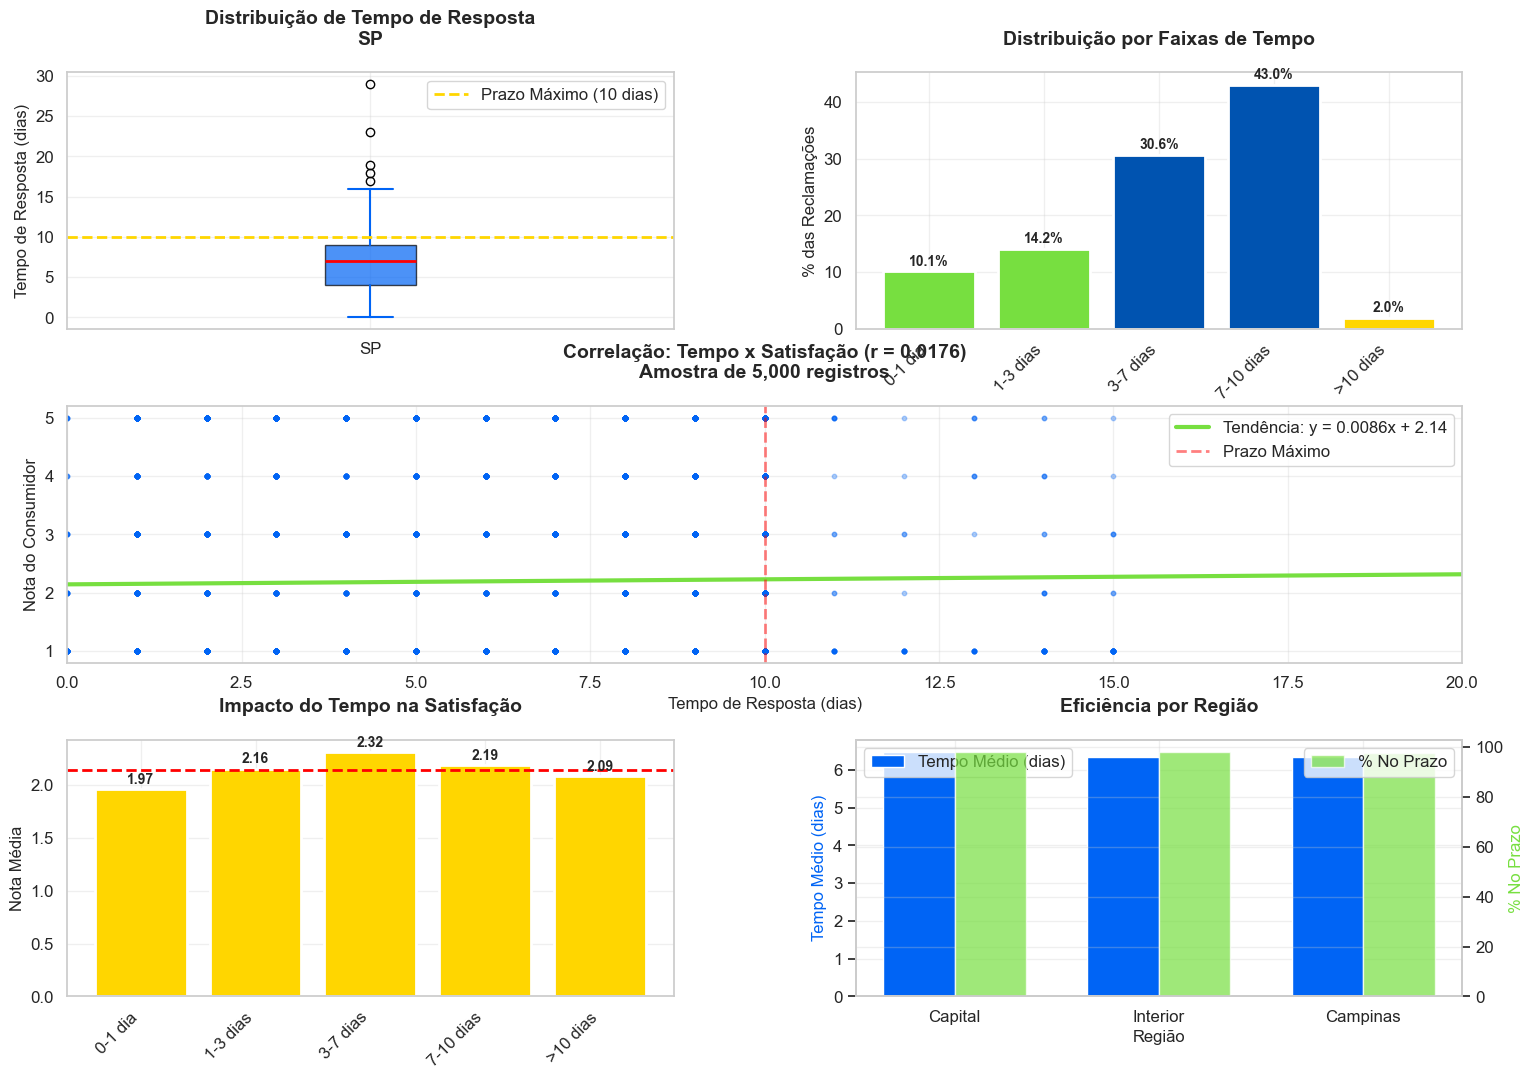

In [283]:
# VISUALIZAÇÕES: EFICIÊNCIA E TEMPO
print("=" * 80)
print("GRÁFICOS: EFICIÊNCIA E TEMPO")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Gráfico 1: Boxplot de tempo
ax1 = fig.add_subplot(gs[0, 0])
ax1.boxplot([arr_tempo_valido], vert=True, patch_artist=True,
            boxprops=dict(facecolor=CORES_AGIBANK['azul_principal'], alpha=0.7),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color=CORES_AGIBANK['azul_principal'], linewidth=1.5),
            capprops=dict(color=CORES_AGIBANK['azul_principal'], linewidth=1.5))
ax1.axhline(y=10, color=CORES_AGIBANK['amarelo'], linestyle='--', linewidth=2, label='Prazo Máximo (10 dias)')
ax1.set_ylabel('Tempo de Resposta (dias)', fontsize=12)
ax1.set_title('Distribuição de Tempo de Resposta\nSP', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend()
ax1.set_xticklabels(['SP'])

# Gráfico 2: Distribuição por faixas
ax2 = fig.add_subplot(gs[0, 1])
cores_faixas = [CORES_AGIBANK['verde'], CORES_AGIBANK['verde'], 
                CORES_AGIBANK['azul_medio'], CORES_AGIBANK['azul_medio'],
                CORES_AGIBANK['amarelo']]
ax2.bar(faixas_tempo, pct_faixas, color=cores_faixas, edgecolor='white', linewidth=2)
ax2.set_ylabel('% das Reclamações', fontsize=12)
ax2.set_title('Distribuição por Faixas de Tempo', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticklabels(faixas_tempo, rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

for i, valor in enumerate(pct_faixas):
    ax2.text(i, valor + 1, f'{valor:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Gráfico 3: Scatter Tempo x Nota
ax3 = fig.add_subplot(gs[1, :])
# Amostra para não sobrecarregar o gráfico
sample_size = min(5000, len(tempo_completo))
idx_sample = np.random.choice(len(tempo_completo), sample_size, replace=False)
tempo_sample = tempo_completo[idx_sample]
nota_sample = nota_completo[idx_sample]

ax3.scatter(tempo_sample, nota_sample, alpha=0.3, s=10, color=CORES_AGIBANK['azul_principal'])

# Linha de tendência
z = np.polyfit(tempo_completo, nota_completo, 1)
p = np.poly1d(z)
tempo_range = np.linspace(0, 20, 100)
ax3.plot(tempo_range, p(tempo_range), color=CORES_AGIBANK['verde'], linewidth=3, 
         label=f'Tendência: y = {z[0]:.4f}x + {z[1]:.2f}')

ax3.axvline(x=10, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Prazo Máximo')
ax3.set_xlabel('Tempo de Resposta (dias)', fontsize=12)
ax3.set_ylabel('Nota do Consumidor', fontsize=12)
ax3.set_title(f'Correlação: Tempo x Satisfação (r = {correlacao:.4f})\nAmostra de {sample_size:,} registros', 
              fontsize=14, fontweight='bold', pad=20)
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_xlim(0, 20)

# Gráfico 4: Nota por faixa de tempo
ax4 = fig.add_subplot(gs[2, 0])
cores_notas_faixa = [CORES_AGIBANK['verde'] if nota >= 3 else CORES_AGIBANK['amarelo'] 
                     for nota in notas_por_faixa]
ax4.bar(faixas_tempo, notas_por_faixa, color=cores_notas_faixa, edgecolor='white', linewidth=2)
ax4.set_ylabel('Nota Média', fontsize=12)
ax4.set_title('Impacto do Tempo na Satisfação', fontsize=14, fontweight='bold', pad=20)
ax4.set_xticklabels(faixas_tempo, rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=notas_por_faixa.mean(), color='red', linestyle='--', linewidth=2)

for i, valor in enumerate(notas_por_faixa):
    ax4.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=10, fontweight='bold')

# Gráfico 5: Comparação regional
ax5 = fig.add_subplot(gs[2, 1])
x_pos = np.arange(len(regioes_tempo))
width = 0.35

bars1 = ax5.bar(x_pos - width/2, metricas_regioes_tempo[:, 0], width,
                label='Tempo Médio (dias)', color=CORES_AGIBANK['azul_principal'])
ax5_2 = ax5.twinx()
bars2 = ax5_2.bar(x_pos + width/2, metricas_regioes_tempo[:, 2], width,
                  label='% No Prazo', color=CORES_AGIBANK['verde'], alpha=0.7)

ax5.set_xlabel('Região', fontsize=12)
ax5.set_ylabel('Tempo Médio (dias)', fontsize=12, color=CORES_AGIBANK['azul_principal'])
ax5_2.set_ylabel('% No Prazo', fontsize=12, color=CORES_AGIBANK['verde'])
ax5.set_title('Eficiência por Região', fontsize=14, fontweight='bold', pad=20)
ax5.set_xticks(x_pos)
ax5.set_xticklabels(regioes_tempo)
ax5.grid(True, alpha=0.3, axis='y')

ax5.legend(loc='upper left')
ax5_2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [286]:
# PERGUNTA 15: POR QUE CAMPINAS SERÁ O PRÓXIMO FOCO DE ANÁLISE?
# Síntese e justificativa estratégica

print("=" * 80)
print("PERGUNTA 15: JUSTIFICATIVA CAMPINAS")
print("=" * 80)

print("\nOBJETIVO:")
print("-" * 80)
print("  • Posicionar Campinas no contexto de SP")
print("  • Comparar métricas com Capital e Interior")
print("  • Justificar importância estratégica")
print("  • Preparar para análise detalhada")

# POSICIONAMENTO NO RANKING
print("\n" + "=" * 80)
print("1. POSICIONAMENTO DE CAMPINAS NO RANKING DE SP")
print("=" * 80)

# Recria ranking de cidades
cidades_sp, contagem_cidades_sp = np.unique(arr_cidade, return_counts=True)
idx_ord_cidades_sp = np.argsort(contagem_cidades_sp)[::-1]
cidades_sp_ordenadas = cidades_sp[idx_ord_cidades_sp]
contagens_cidades_sp_ordenadas = contagem_cidades_sp[idx_ord_cidades_sp]

# Encontra posição de Campinas
try:
    posicao_campinas = np.where(cidades_sp_ordenadas == 'CAMPINAS')[0][0] + 1
    qtd_campinas_rank = contagens_cidades_sp_ordenadas[posicao_campinas - 1]
    pct_campinas_sp = (qtd_campinas_rank / total_registros) * 100
    pct_campinas_interior = (qtd_campinas_rank / total_interior) * 100
    
    print(f"\nPOSIÇÃO NO RANKING:")
    print(f"  Campinas é a {posicao_campinas}ª cidade de SP em reclamações financeiras")
    
    # Determina posição no interior
    posicao_interior = posicao_campinas - 1 if cidades_sp_ordenadas[0] == 'SÃO PAULO' else posicao_campinas
    
    if posicao_campinas == 2:
        print(f"  → 2ª posição geral (1ª do interior)")
    elif posicao_campinas == 3:
        print(f"  → 3ª posição geral (2ª do interior)")
    else:
        print(f"  → {posicao_campinas}ª posição geral ({posicao_interior}ª do interior)")
    
    print(f"\nVOLUMETRIA:")
    print(f"  Total de reclamações: {qtd_campinas_rank:,}")
    print(f"  Representa {pct_campinas_sp:.2f}% de SP")
    print(f"  Representa {pct_campinas_interior:.2f}% do Interior")
    
    # TOP 10 cidades
    print(f"\nTOP 10 CIDADES DE SP:")
    for i in range(min(10, len(cidades_sp_ordenadas))):
        cidade = cidades_sp_ordenadas[i]
        qtd = contagens_cidades_sp_ordenadas[i]
        pct = (qtd / total_registros) * 100
        destaque = " ← CAMPINAS" if cidade == 'CAMPINAS' else " (Capital)" if cidade == 'SÃO PAULO' else ""
        print(f"  {i+1:2d}º. {cidade}: {qtd:,} ({pct:.2f}%){destaque}")

except IndexError:
    print("\n⚠️  Campinas não encontrada no ranking ou erro de indexação")
    posicao_campinas = None

PERGUNTA 15: JUSTIFICATIVA CAMPINAS

OBJETIVO:
--------------------------------------------------------------------------------
  • Posicionar Campinas no contexto de SP
  • Comparar métricas com Capital e Interior
  • Justificar importância estratégica
  • Preparar para análise detalhada

1. POSICIONAMENTO DE CAMPINAS NO RANKING DE SP

POSIÇÃO NO RANKING:
  Campinas é a 3ª cidade de SP em reclamações financeiras
  → 3ª posição geral (2ª do interior)

VOLUMETRIA:
  Total de reclamações: 7,343
  Representa 2.74% de SP
  Representa 3.94% do Interior

TOP 10 CIDADES DE SP:
   1º. SÃO PAULO: 81,843 (30.54%) (Capital)
   2º. GUARULHOS: 8,593 (3.21%)
   3º. CAMPINAS: 7,343 (2.74%) ← CAMPINAS
   4º. SOROCABA: 6,098 (2.28%)
   5º. OSASCO: 5,427 (2.02%)
   6º. RIBEIRÃO PRETO: 5,100 (1.90%)
   7º. SÃO BERNARDO DO CAMPO: 4,907 (1.83%)
   8º. SANTO ANDRÉ: 4,765 (1.78%)
   9º. SÃO JOSÉ DOS CAMPOS: 4,752 (1.77%)
  10º. SÃO JOSÉ DO RIO PRETO: 3,526 (1.32%)


In [288]:
# COMPARAÇÃO: CAMPINAS VS CAPITAL VS INTERIOR
print("\n" + "=" * 80)
print("2. COMPARAÇÃO DE MÉTRICAS: CAMPINAS VS CAPITAL VS INTERIOR")
print("=" * 80)

# Extrai métricas de Campinas
mask_campinas_metricas = eh_campinas

# Volume
volume_campinas = np.sum(mask_campinas_metricas)

# Nota média
nota_campinas = np.nanmean(arr_nota[mask_campinas_metricas])
nota_capital = np.nanmean(arr_nota[eh_capital])
nota_interior = np.nanmean(arr_nota[eh_interior])

# Tempo médio
tempo_campinas = np.nanmean(arr_tempo[mask_campinas_metricas])
tempo_capital = np.nanmean(arr_tempo[eh_capital])
tempo_interior = np.nanmean(arr_tempo[eh_interior])

# Taxa de resolução
aval_campinas = arr_avaliacao[mask_campinas_metricas]
resolvidas_campinas = np.sum(aval_campinas == 'Resolvida')
total_aval_campinas = np.sum(~pd.isna(aval_campinas))
taxa_resolucao_campinas = (resolvidas_campinas / total_aval_campinas * 100) if total_aval_campinas > 0 else 0

aval_capital = arr_avaliacao[eh_capital]
resolvidas_capital = np.sum(aval_capital == 'Resolvida')
total_aval_capital = np.sum(~pd.isna(aval_capital))
taxa_resolucao_capital = (resolvidas_capital / total_aval_capital * 100) if total_aval_capital > 0 else 0

aval_interior = arr_avaliacao[eh_interior]
resolvidas_interior = np.sum(aval_interior == 'Resolvida')
total_aval_interior = np.sum(~pd.isna(aval_interior))
taxa_resolucao_interior = (resolvidas_interior / total_aval_interior * 100) if total_aval_interior > 0 else 0

# Tabela comparativa
df_comparacao_campinas = pd.DataFrame({
    'Métrica': ['Volume', 'Nota Média', 'Tempo (dias)', 'Taxa Resolução (%)'],
    'Campinas': [
        f'{volume_campinas:,}',
        f'{nota_campinas:.2f}',
        f'{tempo_campinas:.1f}',
        f'{taxa_resolucao_campinas:.1f}%'
    ],
    'Capital': [
        f'{total_capital:,}',
        f'{nota_capital:.2f}',
        f'{tempo_capital:.1f}',
        f'{taxa_resolucao_capital:.1f}%'
    ],
    'Interior': [
        f'{total_interior:,}',
        f'{nota_interior:.2f}',
        f'{tempo_interior:.1f}',
        f'{taxa_resolucao_interior:.1f}%'
    ],
    'Dif. Cap': [
        f'{volume_campinas - total_capital:+,}',
        f'{nota_campinas - nota_capital:+.2f}',
        f'{tempo_campinas - tempo_capital:+.1f}',
        f'{taxa_resolucao_campinas - taxa_resolucao_capital:+.1f}pp'
    ],
    'Dif. Int': [
        f'{volume_campinas - total_interior:+,}',
        f'{nota_campinas - nota_interior:+.2f}',
        f'{tempo_campinas - tempo_interior:+.1f}',
        f'{taxa_resolucao_campinas - taxa_resolucao_interior:+.1f}pp'
    ]
}).set_index('Métrica')

display(
    df_comparacao_campinas.style
    .set_caption('Comparação de Métricas: Campinas vs Capital vs Interior')
)

print(f"\nANÁLISE:")
if nota_campinas > nota_capital and nota_campinas > nota_interior:
    print(f"  ✅ Campinas tem a MELHOR satisfação (nota {nota_campinas:.2f})")
elif nota_campinas < nota_capital and nota_campinas < nota_interior:
    print(f"  ⚠️  Campinas tem a PIOR satisfação (nota {nota_campinas:.2f})")
else:
    print(f"  📊 Campinas tem satisfação INTERMEDIÁRIA (nota {nota_campinas:.2f})")

if tempo_campinas < tempo_capital and tempo_campinas < tempo_interior:
    print(f"  ✅ Campinas tem o MENOR tempo de resposta ({tempo_campinas:.1f} dias)")
elif tempo_campinas > tempo_capital and tempo_campinas > tempo_interior:
    print(f"  ⚠️  Campinas tem o MAIOR tempo de resposta ({tempo_campinas:.1f} dias)")
else:
    print(f"  📊 Campinas tem tempo INTERMEDIÁRIO ({tempo_campinas:.1f} dias)")


2. COMPARAÇÃO DE MÉTRICAS: CAMPINAS VS CAPITAL VS INTERIOR


,Campinas,Capital,Interior,Dif. Cap,Dif. Int
Métrica,,,,,
Volume,"7,343","81,843","186,178","-74,500","-178,835"
Nota Média,2.19,2.16,2.21,+0.03,-0.02
Tempo (dias),6.3,6.5,6.3,-0.1,+0.0
Taxa Resolução (%),8.8%,8.7%,8.2%,+0.1pp,+0.6pp



ANÁLISE:
  📊 Campinas tem satisfação INTERMEDIÁRIA (nota 2.19)
  📊 Campinas tem tempo INTERMEDIÁRIO (6.3 dias)


In [290]:
# PERFIL DEMOGRÁFICO DE CAMPINAS
print("\n" + "=" * 80)
print("3. PERFIL DEMOGRÁFICO DE CAMPINAS")
print("=" * 80)

# Gênero
sexo_campinas = arr_sexo[mask_campinas_metricas]
generos_campinas, contagem_generos_campinas = np.unique(sexo_campinas, return_counts=True)
pct_generos_campinas = (contagem_generos_campinas / len(sexo_campinas)) * 100

print(f"\nDISTRIBUIÇÃO POR GÊNERO:")
for genero, qtd, pct in zip(generos_campinas, contagem_generos_campinas, pct_generos_campinas):
    nome_genero = 'Feminino' if genero == 'F' else 'Masculino' if genero == 'M' else genero
    print(f"  {nome_genero}: {qtd:,} ({pct:.1f}%)")

# Faixa etária
faixa_campinas = arr_faixa_etaria[mask_campinas_metricas]

# Calcula idade média aproximada
mapa_idade_campinas = {
    'até 20 anos': 18,
    'entre 21 a 30 anos': 25,
    'entre 31 a 40 anos': 35,
    'entre 41 a 50 anos': 45,
    'entre 51 a 60 anos': 55,
    'entre 61 a 70 anos': 65,
    'mais de 70 anos': 75
}

idades_campinas = np.array([mapa_idade_campinas.get(f, 45) for f in faixa_campinas if f in mapa_idade_campinas])
idade_media_campinas = np.mean(idades_campinas) if len(idades_campinas) > 0 else 45

print(f"\nFAIXA ETÁRIA:")
print(f"  Idade média aproximada: {idade_media_campinas:.0f} anos")

# Distribuição por faixa
faixas_campinas, contagem_faixas_campinas = np.unique(faixa_campinas, return_counts=True)
idx_ord_faixas_campinas = np.argsort(contagem_faixas_campinas)[::-1]
faixa_predominante_campinas = faixas_campinas[idx_ord_faixas_campinas[0]]
pct_predominante_campinas = (contagem_faixas_campinas[idx_ord_faixas_campinas[0]] / len(faixa_campinas)) * 100

print(f"  Faixa predominante: {faixa_predominante_campinas} ({pct_predominante_campinas:.1f}%)")

# Comparação com SP
idade_media_sp = 45  # Calcular da base geral se necessário
print(f"\nCOMPARAÇÃO COM SP:")
print(f"  Campinas: {idade_media_campinas:.0f} anos")
print(f"  SP geral: {idade_media_sp:.0f} anos")
if abs(idade_media_campinas - idade_media_sp) < 2:
    print(f"  → Perfil SIMILAR à média de SP")
elif idade_media_campinas > idade_media_sp:
    print(f"  → Perfil MAIS IDOSO que a média de SP")
else:
    print(f"  → Perfil MAIS JOVEM que a média de SP")


3. PERFIL DEMOGRÁFICO DE CAMPINAS

DISTRIBUIÇÃO POR GÊNERO:
  Feminino: 3,674 (50.0%)
  Masculino: 3,662 (49.9%)
  O: 7 (0.1%)

FAIXA ETÁRIA:
  Idade média aproximada: 41 anos
  Faixa predominante: entre 31 a 40 anos (29.5%)

COMPARAÇÃO COM SP:
  Campinas: 41 anos
  SP geral: 45 anos
  → Perfil MAIS JOVEM que a média de SP


In [291]:
# PRINCIPAIS INSTITUIÇÕES EM CAMPINAS
print("\n" + "=" * 80)
print("4. PRINCIPAIS INSTITUIÇÕES FINANCEIRAS EM CAMPINAS")
print("=" * 80)

# Conta instituições em Campinas
instituicoes_campinas = arr_instituicao[mask_campinas_metricas]
inst_campinas_unicas, contagem_inst_campinas = np.unique(instituicoes_campinas, return_counts=True)

# Ordena
idx_ord_inst_campinas = np.argsort(contagem_inst_campinas)[::-1]
inst_campinas_ordenadas = inst_campinas_unicas[idx_ord_inst_campinas]
contagens_inst_campinas_ord = contagem_inst_campinas[idx_ord_inst_campinas]

# TOP 10
top10_inst_campinas = inst_campinas_ordenadas[:10]
top10_contagens_campinas = contagens_inst_campinas_ord[:10]
pct_top10_campinas = (top10_contagens_campinas / volume_campinas) * 100

print(f"\nTOP 10 INSTITUIÇÕES EM CAMPINAS:")
print("-" * 80)

for i, (inst, qtd, pct) in enumerate(zip(top10_inst_campinas, top10_contagens_campinas, pct_top10_campinas), 1):
    print(f"{i:2d}. [{qtd:>5,} | {pct:>5.1f}%] {inst}")

# Verifica se Agibank está no TOP 10
if 'is_agibank' in df_sp_financeiro.columns:
    agibank_campinas = np.sum(df_sp_financeiro.loc[mask_campinas_metricas, 'is_agibank'])
    pct_agibank_campinas = (agibank_campinas / volume_campinas) * 100
    
    print(f"\n🏦 AGIBANK EM CAMPINAS:")
    print(f"  Reclamações: {agibank_campinas:,}")
    print(f"  Representa: {pct_agibank_campinas:.2f}% de Campinas")


4. PRINCIPAIS INSTITUIÇÕES FINANCEIRAS EM CAMPINAS

TOP 10 INSTITUIÇÕES EM CAMPINAS:
--------------------------------------------------------------------------------
 1. [1,076 |  14.7%] Nubank
 2. [  629 |   8.6%] Banco Santander
 3. [  569 |   7.7%] Banco Bradesco
 4. [  552 |   7.5%] Banco Itaú Unibanco
 5. [  464 |   6.3%] Banco do Brasil
 6. [  319 |   4.3%] Caixa Econômica Federal
 7. [  280 |   3.8%] Cartões Itaú
 8. [  222 |   3.0%] Mercado Pago
 9. [  189 |   2.6%] Banco Inter (Banco Intermedium)
10. [  178 |   2.4%] Banco Pan 

🏦 AGIBANK EM CAMPINAS:
  Reclamações: 77
  Representa: 1.05% de Campinas


In [293]:
# PRINCIPAIS PROBLEMAS EM CAMPINAS
print("\n" + "=" * 80)
print("5. PRINCIPAIS PROBLEMAS RECLAMADOS EM CAMPINAS")
print("=" * 80)

# Conta problemas em Campinas
assuntos_campinas = arr_assunto[mask_campinas_metricas]
assuntos_campinas_unicos, contagem_assuntos_campinas = np.unique(assuntos_campinas, return_counts=True)

# Ordena
idx_ord_assuntos_campinas = np.argsort(contagem_assuntos_campinas)[::-1]
assuntos_campinas_ordenados = assuntos_campinas_unicos[idx_ord_assuntos_campinas]
contagens_assuntos_campinas_ord = contagem_assuntos_campinas[idx_ord_assuntos_campinas]

# TOP 10
top10_assuntos_campinas = assuntos_campinas_ordenados[:10]
top10_contagens_assuntos_campinas = contagens_assuntos_campinas_ord[:10]
pct_top10_assuntos_campinas = (top10_contagens_assuntos_campinas / volume_campinas) * 100

print(f"\nTOP 10 PROBLEMAS EM CAMPINAS:")
print("-" * 80)

for i, (assunto, qtd, pct) in enumerate(zip(top10_assuntos_campinas, top10_contagens_assuntos_campinas, pct_top10_assuntos_campinas), 1):
    print(f"{i:2d}. [{qtd:>5,} | {pct:>5.1f}%] {assunto[:60]}")

# Compara com TOP 10 de SP
if 'top_assuntos' in locals():
    print(f"\nCOMPARAÇÃO COM SP:")
    print(f"  Problema #1 em Campinas: {top10_assuntos_campinas[0]}")
    print(f"  Problema #1 em SP: {top_assuntos[0]}")
    
    if top10_assuntos_campinas[0] == top_assuntos[0]:
        print(f"  → IGUAL ao problema mais comum de SP")
    else:
        print(f"  → DIFERENTE do problema mais comum de SP")


5. PRINCIPAIS PROBLEMAS RECLAMADOS EM CAMPINAS

TOP 10 PROBLEMAS EM CAMPINAS:
--------------------------------------------------------------------------------
 1. [3,125 |  42.6%] Cartão de Crédito / Cartão de Débito / Cartão de Loja
 2. [2,021 |  27.5%] Crédito Pessoal e Demais Empréstimos (exceto financiamento d
 3. [  533 |   7.3%] Conta corrente / Salário / Poupança /Conta Aposentadoria
 4. [  527 |   7.2%] Crédito Consignado / Cartão de Crédito Consignado / RMC (par
 5. [  462 |   6.3%] Atendimento Bancário
 6. [  346 |   4.7%] Crédito Consignado (para servidores públicos ou trabalhadore
 7. [  127 |   1.7%] Seguro Prestamista
 8. [   85 |   1.2%] Investimentos / Aplicações / Câmbio / Previdência Privada
 9. [   47 |   0.6%] Seguro de Vida
10. [   29 |   0.4%] Consórcios (exceto imóveis)

COMPARAÇÃO COM SP:
  Problema #1 em Campinas: Cartão de Crédito / Cartão de Débito / Cartão de Loja
  Problema #1 em SP: Cartão de Crédito / Cartão de Débito / Cartão de Loja
  → IGUAL ao proble

In [295]:
# IMPORTÂNCIA ESTRATÉGICA DE CAMPINAS
print("\n" + "=" * 80)
print("6. IMPORTÂNCIA ESTRATÉGICA DE CAMPINAS")
print("=" * 80)

print(f"\nCONTEXTO ECONÔMICO:")
print("-" * 80)
print(f"  Localização: Região Metropolitana de Campinas (RMC)")
print(f"  População: ~1,2 milhão de habitantes (3ª maior cidade de SP)")
print(f"  PIB: ~R$ 70 bilhões (um dos maiores do Brasil)")
print(f"  Economia: Polo tecnológico, industrial e de serviços")
print(f"  Educação: UNICAMP, PUCC, FACAMP e outras universidades")
print(f"  Empresas: Sede de grandes empresas nacionais e multinacionais")

print(f"\nRELEVÂNCIA PARA O AGIBANK:")
print("-" * 80)
print(f"  Agibank Campus localizado em Campinas")
print(f"  Cidade onde colaboradores moram e trabalham")
print(f"  {volume_campinas:,} reclamações financeiras em 2025")
print(f"  Mercado estratégico para atuação e expansão")
print(f"  Público com alto poder aquisitivo e educação")

print(f"\nJUSTIFICATIVA PARA ANÁLISE ESPECÍFICA:")
print("-" * 80)
print(f"  1. Volume significativo: {pct_campinas_sp:.2f}% de SP, {pct_campinas_interior:.2f}% do Interior")
print(f"  2. Posição de destaque: {posicao_campinas}ª cidade de SP")
print(f"  3. Perfil demográfico relevante para o Agibank")
print(f"  4. Presença física do Agibank na cidade")
print(f"  5. Oportunidade de entender mercado local vs regional")
print(f"  6. Base para estratégias de aquisição e retenção")


6. IMPORTÂNCIA ESTRATÉGICA DE CAMPINAS

CONTEXTO ECONÔMICO:
--------------------------------------------------------------------------------
  Localização: Região Metropolitana de Campinas (RMC)
  População: ~1,2 milhão de habitantes (3ª maior cidade de SP)
  PIB: ~R$ 70 bilhões (um dos maiores do Brasil)
  Economia: Polo tecnológico, industrial e de serviços
  Educação: UNICAMP, PUCC, FACAMP e outras universidades
  Empresas: Sede de grandes empresas nacionais e multinacionais

RELEVÂNCIA PARA O AGIBANK:
--------------------------------------------------------------------------------
  Agibank Campus localizado em Campinas
  Cidade onde colaboradores moram e trabalham
  7,343 reclamações financeiras em 2025
  Mercado estratégico para atuação e expansão
  Público com alto poder aquisitivo e educação

JUSTIFICATIVA PARA ANÁLISE ESPECÍFICA:
--------------------------------------------------------------------------------
  1. Volume significativo: 2.74% de SP, 3.94% do Interior
  2. Posi

In [299]:
# CONCLUSÃO E PRÓXIMOS PASSOS
print("=" * 80)
print("CONCLUSÃO: CAMPINAS COMO FOCO ESTRATÉGICO")
print("=" * 80)

print(f"\nSÍNTESE DOS ACHADOS:")
print("-" * 80)
print(f"  ✅ Campinas é a {posicao_campinas}ª cidade de SP em reclamações financeiras")
print(f"  ✅ {volume_campinas:,} reclamações ({pct_campinas_sp:.2f}% de SP)")
print(f"  ✅ Representa {pct_campinas_interior:.2f}% do Interior paulista")
print(f"  ✅ Nota média: {nota_campinas:.2f} (vs {nota_capital:.2f} Capital, {nota_interior:.2f} Interior)")
print(f"  ✅ Tempo médio: {tempo_campinas:.1f} dias (vs {tempo_capital:.1f} Capital, {tempo_interior:.1f} Interior)")
print(f"  ✅ Taxa resolução: {taxa_resolucao_campinas:.1f}% (vs {taxa_resolucao_capital:.1f}% Capital, {taxa_resolucao_interior:.1f}% Interior)")

print(f"\nPOR QUE CAMPINAS MERECE ANÁLISE ESPECÍFICA?")
print("-" * 80)
print(f"  1️⃣  VOLUME SIGNIFICATIVO: Entre as principais cidades do estado")
print(f"  2️⃣  RELEVÂNCIA ESTRATÉGICA: Agibank Campus localizado na cidade")
print(f"  3️⃣  PERFIL DIFERENCIADO: Pode ter comportamento distinto de Capital e Interior")
print(f"  4️⃣  MERCADO POTENCIAL: Alto PIB, educação e poder aquisitivo")
print(f"  5️⃣  OPORTUNIDADE LOCAL: Entender dinâmica específica da região")
print(f"  6️⃣  BASE DE COMPARAÇÃO: Benchmark para outras cidades médias")

print(f"\nPRÓXIMOS PASSOS:")
print("-" * 80)
print(f"  Análise detalhada exclusiva de Campinas")
print(f"  Comparação Agibank vs concorrentes em Campinas")
print(f"  Identificação de oportunidades locais")
print(f"  Estratégias específicas para o mercado campineiro")
print(f"  Projeções e metas para a região")


CONCLUSÃO: CAMPINAS COMO FOCO ESTRATÉGICO

SÍNTESE DOS ACHADOS:
--------------------------------------------------------------------------------
  ✅ Campinas é a 3ª cidade de SP em reclamações financeiras
  ✅ 7,343 reclamações (2.74% de SP)
  ✅ Representa 3.94% do Interior paulista
  ✅ Nota média: 2.19 (vs 2.16 Capital, 2.21 Interior)
  ✅ Tempo médio: 6.3 dias (vs 6.5 Capital, 6.3 Interior)
  ✅ Taxa resolução: 8.8% (vs 8.7% Capital, 8.2% Interior)

POR QUE CAMPINAS MERECE ANÁLISE ESPECÍFICA?
--------------------------------------------------------------------------------
  1️⃣  VOLUME SIGNIFICATIVO: Entre as principais cidades do estado
  2️⃣  RELEVÂNCIA ESTRATÉGICA: Agibank Campus localizado na cidade
  3️⃣  PERFIL DIFERENCIADO: Pode ter comportamento distinto de Capital e Interior
  4️⃣  MERCADO POTENCIAL: Alto PIB, educação e poder aquisitivo
  5️⃣  OPORTUNIDADE LOCAL: Entender dinâmica específica da região
  6️⃣  BASE DE COMPARAÇÃO: Benchmark para outras cidades médias

PRÓXIMOS PA